### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\RAJDEEP\\Upgrad_Main_Module_Classes\\Linear_Regression_Assignment'

In [3]:
data = pd.read_csv("day.csv")

In [4]:
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

As we can say that this instant column is of no work. It just gives the t=unique row number which we can get by default from this dataset itself when being loaded in pandas

In [5]:
data_1 = data.drop('instant', axis=1)

In [6]:
data_1.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        1           1           2   
1  02-01-2018       1   0     1        0        2           1           2   
2  03-01-2018       1   0     1        0        3           1           1   
3  04-01-2018       1   0     1        0        4           1           1   
4  05-01-2018       1   0     1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [8]:
data_1.shape

(730, 15)

We can see from the primary information that:
   - There is no null value in this whole dataset
   - dtedata is daily dates starting from 1st Jan, 2018 till 31st Dec, 2019
   - the datatype of dtedata is object/categorical which shouldn't be ideal case. So we have to change its datatype.
   - This problem can be used for time series forecasting, but as of now we can remove that column because, we can see that there are corresponding year , month columns present which we can use for our business problem.
   - The dteday column can be used for exploratory data analysis for checking if there is any pattern present in the cnt

### Exploratory Data Analysis and necessary data transformation

### Univariate Analysis

- <span style="color:darkred; font-weight:bold">Column 'dteday'</span>

In [9]:
data_1['dteday']=data_1['dteday'].astype('datetime64')

- <span style="color:darkred; font-weight:bold">Column 'season'</span>

In [10]:
data_1['season'].unique()

array([1, 2, 3, 4], dtype=int64)

-- observation: season is a numerical variable here which ideally shouldn't be the case. It should be categorial. According to the data dictionary provided,
    the mapping of season should be like this: 
    
<span style="color:darkblue; font-weight:bold;"> season : season (1:spring, 2:summer, 3:fall, 4:winter)</span>


In [11]:
def season(x):
    if x==1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x== 3:
        return 'fall'
    else:
        return 'winter'

In [12]:
data_1['Season'] = data_1['season'].apply(season)

In [13]:
data_1.loc[data_1['season'] == 2][['Season','season']]

Season  season
79   summer       2
80   summer       2
81   summer       2
82   summer       2
83   summer       2
..      ...     ...
531  summer       2
532  summer       2
533  summer       2
534  summer       2
535  summer       2

[184 rows x 2 columns]

In [14]:
data_1.drop('season', axis=1, inplace=True)  #### Keeping derived Season column and removing existing season column

In [15]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   yr          730 non-null    int64         
 2   mnth        730 non-null    int64         
 3   holiday     730 non-null    int64         
 4   weekday     730 non-null    int64         
 5   workingday  730 non-null    int64         
 6   weathersit  730 non-null    int64         
 7   temp        730 non-null    float64       
 8   atemp       730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
 13  cnt         730 non-null    int64         
 14  Season      730 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 85.7+ 

In [16]:
data_1['Season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: Season, dtype: int64

- <span style="color:darkred; font-weight:bold">Column 'yr'</span>

In [17]:
data_1['yr'].unique()

array([0, 1], dtype=int64)

-- observation: season is a numerical variable here which ideally shouldn't be the case. It should be categorial. According to the data dictionary provided,
    the mapping of season should be like this: 
    
<span style="color:darkblue; font-weight:bold;"> yr : year (0: 2018, 1:2019)</span>

In [18]:
data_1['year'] = data_1['yr'].apply(lambda x : 2019 if x==1 else 2018)

In [19]:
data_1.drop('yr', axis=1, inplace=True)

In [20]:
data_1.head()

dteday  mnth  holiday  weekday  workingday  weathersit       temp  \
0 2018-01-01     1        0        1           1           2  14.110847   
1 2018-02-01     1        0        2           1           2  14.902598   
2 2018-03-01     1        0        3           1           1   8.050924   
3 2018-04-01     1        0        4           1           1   8.200000   
4 2018-05-01     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  Season  year  
0  18.18125  80.5833  10.749882     331         654   985  spring  2018  
1  17.68695  69.6087  16.652113     131         670   801  spring  2018  
2   9.47025  43.7273  16.636703     120        1229  1349  spring  2018  
3  10.60610  59.0435  10.739832     108        1454  1562  spring  2018  
4  11.46350  43.6957  12.522300      82        1518  1600  spring  2018

In [21]:
data_1.year.value_counts()

2018    365
2019    365
Name: year, dtype: int64

In [22]:
data_1['year']=data_1['year'].astype('str')

In [23]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   mnth        730 non-null    int64         
 2   holiday     730 non-null    int64         
 3   weekday     730 non-null    int64         
 4   workingday  730 non-null    int64         
 5   weathersit  730 non-null    int64         
 6   temp        730 non-null    float64       
 7   atemp       730 non-null    float64       
 8   hum         730 non-null    float64       
 9   windspeed   730 non-null    float64       
 10  casual      730 non-null    int64         
 11  registered  730 non-null    int64         
 12  cnt         730 non-null    int64         
 13  Season      730 non-null    object        
 14  year        730 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(8), object(2)
memory usage: 85.7+ 

- <span style="color:darkred; font-weight:bold">Column 'mnth'</span>

In [24]:
data_1['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

<span style="color:darkblue; font-weight:bold;"> month : month (1:January, 2:February, 3:March, 4:April,
    5:May, 6:June, 7:July, 8:August, 9:September, 10:October, 11:November, 12:December)</span>

'mnth' column is also showing its type as numerical which ideally shouldn't be, So redefining the column in order to make it categorical

In [25]:
def month(x):
    mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    return x.map(mapping)

In [26]:
data_1[['month']] = data_1[['mnth']].apply(month)

In [27]:
data_1

dteday  mnth  holiday  weekday  workingday  weathersit       temp  \
0   2018-01-01     1        0        1           1           2  14.110847   
1   2018-02-01     1        0        2           1           2  14.902598   
2   2018-03-01     1        0        3           1           1   8.050924   
3   2018-04-01     1        0        4           1           1   8.200000   
4   2018-05-01     1        0        5           1           1   9.305237   
..         ...   ...      ...      ...         ...         ...        ...   
725 2019-12-27    12        0        5           1           2  10.420847   
726 2019-12-28    12        0        6           0           2  10.386653   
727 2019-12-29    12        0        0           0           2  10.386653   
728 2019-12-30    12        0        1           1           1  10.489153   
729 2019-12-31    12        0        2           1           2   8.849153   

        atemp      hum  windspeed  casual  registered   cnt  Season  year  \
0    18.18125  80.5833  10.749882     331         654   985  spring  2018   
1    17.68695  69.6087  16.652113     131         670   801  spring  2018   
2     9.47025  43.7273  16.636703     120        1229  1349  spring  2018   
3    10.60610  59.0435  10.739832     108        1454  1562  spring  2018   
4    11.46350  43.6957  12.522300      82        1518  1600  spring  2018   
..        ...      ...        ...     ...         ...   ...     ...   ...   
725  11.33210  65.2917  23.458911     247        1867  2114  spring  2019   
726  12.75230  59.0000  10.416557     644        2451  3095  spring  2019   
727  12.12000  75.2917   8.333661     159        1182  1341  spring  2019   
728  11.58500  48.3333  23.500518     364        1432  1796  spring  2019   
729  11.17435  57.7500  10.374682     439        2290  2729  spring  2019   

    month  
0     Jan  
1     Jan  
2     Jan  
3     Jan  
4     Jan  
..    ...  
725   Dec  
726   Dec  
727   Dec  
728   Dec  
729   Dec  

[730 rows x 16 columns]

In [28]:
data_1.drop('mnth', axis=1, inplace=True)

In [29]:
data_1.head()

dteday  holiday  weekday  workingday  weathersit       temp     atemp  \
0 2018-01-01        0        1           1           2  14.110847  18.18125   
1 2018-02-01        0        2           1           2  14.902598  17.68695   
2 2018-03-01        0        3           1           1   8.050924   9.47025   
3 2018-04-01        0        4           1           1   8.200000  10.60610   
4 2018-05-01        0        5           1           1   9.305237  11.46350   

       hum  windspeed  casual  registered   cnt  Season  year month  
0  80.5833  10.749882     331         654   985  spring  2018   Jan  
1  69.6087  16.652113     131         670   801  spring  2018   Jan  
2  43.7273  16.636703     120        1229  1349  spring  2018   Jan  
3  59.0435  10.739832     108        1454  1562  spring  2018   Jan  
4  43.6957  12.522300      82        1518  1600  spring  2018   Jan

- <span style="color:darkred; font-weight:bold">Column 'weekday'</span>

In [30]:
data_1['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [31]:
def weekday(x):
    mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}
    return x.map(mapping)

In [32]:
data_1[['weekday']] = data_1[['weekday']].apply(weekday)

In [33]:
data_1.head()

dteday  holiday    weekday  workingday  weathersit       temp     atemp  \
0 2018-01-01        0     Monday           1           2  14.110847  18.18125   
1 2018-02-01        0    Tuesday           1           2  14.902598  17.68695   
2 2018-03-01        0  Wednesday           1           1   8.050924   9.47025   
3 2018-04-01        0   Thursday           1           1   8.200000  10.60610   
4 2018-05-01        0     Friday           1           1   9.305237  11.46350   

       hum  windspeed  casual  registered   cnt  Season  year month  
0  80.5833  10.749882     331         654   985  spring  2018   Jan  
1  69.6087  16.652113     131         670   801  spring  2018   Jan  
2  43.7273  16.636703     120        1229  1349  spring  2018   Jan  
3  59.0435  10.739832     108        1454  1562  spring  2018   Jan  
4  43.6957  12.522300      82        1518  1600  spring  2018   Jan

- <span style="color:darkred; font-weight:bold">Column 'holiday'</span>

- Observation: holiday column is also given as numerical. But it should be categorical in nature.

    <span style="color:darkblue; font-weight:bold;"> holiday : holiday (0: No, 1:Yes)</span>

In [34]:
data_1['holiday'].unique()

array([0, 1], dtype=int64)

In [35]:
data_1['holiday'] = data_1['holiday'].astype('object')

In [36]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   holiday     730 non-null    object        
 2   weekday     730 non-null    object        
 3   workingday  730 non-null    int64         
 4   weathersit  730 non-null    int64         
 5   temp        730 non-null    float64       
 6   atemp       730 non-null    float64       
 7   hum         730 non-null    float64       
 8   windspeed   730 non-null    float64       
 9   casual      730 non-null    int64         
 10  registered  730 non-null    int64         
 11  cnt         730 non-null    int64         
 12  Season      730 non-null    object        
 13  year        730 non-null    object        
 14  month       730 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 85.7+ 

- <span style="color:darkred; font-weight:bold">Column 'workingday'</span>

- Observation: workingday column is also given as numerical. But it should be categorical in nature.

    <span style="color:darkblue; font-weight:bold;"> workingday : workingday (0: No, 1:Yes)</span>

In [37]:
data_1['workingday'].unique()

array([1, 0], dtype=int64)

In [38]:
data_1['workingday'] = data_1['workingday'].astype('object')

- <span style="color:darkred; font-weight:bold">Column 'weathersit'</span>

In [39]:
data_1['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- Observation: This attribute is also numerical in nature. But it should be categorical in nature.
    Below should be its significance.
    weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [40]:
data_1['weathersit'] = data_1['weathersit'].astype('object')

In [41]:
data_1.head()

dteday holiday    weekday workingday weathersit       temp     atemp  \
0 2018-01-01       0     Monday          1          2  14.110847  18.18125   
1 2018-02-01       0    Tuesday          1          2  14.902598  17.68695   
2 2018-03-01       0  Wednesday          1          1   8.050924   9.47025   
3 2018-04-01       0   Thursday          1          1   8.200000  10.60610   
4 2018-05-01       0     Friday          1          1   9.305237  11.46350   

       hum  windspeed  casual  registered   cnt  Season  year month  
0  80.5833  10.749882     331         654   985  spring  2018   Jan  
1  69.6087  16.652113     131         670   801  spring  2018   Jan  
2  43.7273  16.636703     120        1229  1349  spring  2018   Jan  
3  59.0435  10.739832     108        1454  1562  spring  2018   Jan  
4  43.6957  12.522300      82        1518  1600  spring  2018   Jan

In [42]:
data_1.corr()

temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000

In [43]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   holiday     730 non-null    object        
 2   weekday     730 non-null    object        
 3   workingday  730 non-null    object        
 4   weathersit  730 non-null    object        
 5   temp        730 non-null    float64       
 6   atemp       730 non-null    float64       
 7   hum         730 non-null    float64       
 8   windspeed   730 non-null    float64       
 9   casual      730 non-null    int64         
 10  registered  730 non-null    int64         
 11  cnt         730 non-null    int64         
 12  Season      730 non-null    object        
 13  year        730 non-null    object        
 14  month       730 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.7+ 

<Figure size 720x720 with 0 Axes>

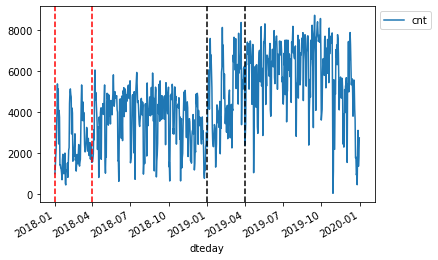

In [44]:
plt.figure(figsize=(10,10))
data_1.plot.line(x='dteday', y='cnt')
plt.axvline('2018-01-01', color='red',linestyle='--')
plt.axvline('2018-04-01', color='red',linestyle='--')
plt.axvline('2019-01-01', color='black',linestyle='--')
plt.axvline('2019-04-01', color='black',linestyle='--')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

- Observation- :
   - We can see some sort of increasing trend and also some seasonal behavior in the months. This can be more illustrates further    in other plots
   - As we have months and other day related columns so as of now removing 'dteday' column

In [45]:
#### Dropping the dteday column

data_2 = data_1.drop('dteday', axis=1)

In [46]:
data_2.shape

(730, 14)

<AxesSubplot:>

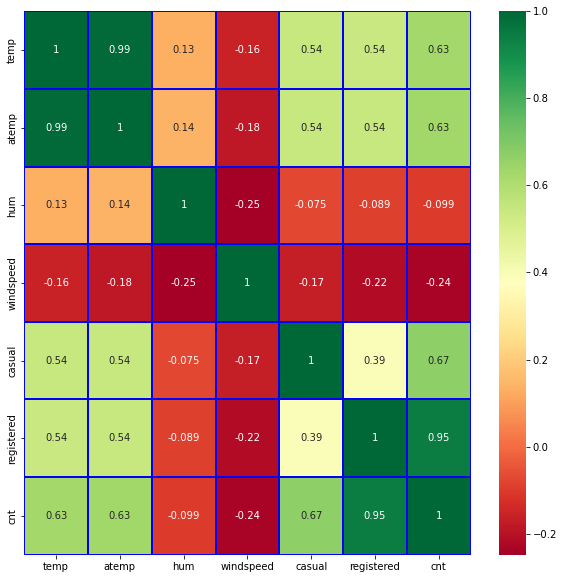

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(data_2.corr(),  annot=True,linecolor='blue',linewidth=1.5,cmap='RdYlGn')

### Bicariate and Multivariate Analysis

### Taking out year 2018 for year specific analysis separately

In [48]:
data_2018 = data_2.loc[( data_1['year'] == '2018' )]
data_2019 = data_2.loc[( data_1['year'] == '2019' )]

In [49]:
data_2018

holiday    weekday workingday weathersit       temp     atemp      hum  \
0         0     Monday          1          2  14.110847  18.18125  80.5833   
1         0    Tuesday          1          2  14.902598  17.68695  69.6087   
2         0  Wednesday          1          1   8.050924   9.47025  43.7273   
3         0   Thursday          1          1   8.200000  10.60610  59.0435   
4         0     Friday          1          1   9.305237  11.46350  43.6957   
..      ...        ...        ...        ...        ...       ...      ...   
360       0   Thursday          1          2  13.325000  16.38165  76.2500   
361       0     Friday          1          1  12.264330  13.99870  50.3913   
362       0   Saturday          0          1  10.181653  13.19460  57.4167   
363       0     Sunday          0          1  12.778347  15.94060  63.6667   
364       0     Monday          1          1  16.810000  20.70605  61.5833   

     windspeed  casual  registered   cnt  Season  year month  
0    10.749882     331         654   985  spring  2018   Jan  
1    16.652113     131         670   801  spring  2018   Jan  
2    16.636703     120        1229  1349  spring  2018   Jan  
3    10.739832     108        1454  1562  spring  2018   Jan  
4    12.522300      82        1518  1600  spring  2018   Jan  
..         ...     ...         ...   ...     ...   ...   ...  
360  12.626150     103        1059  1162  spring  2018   Dec  
361  19.695387     255        2047  2302  spring  2018   Dec  
362   8.000604     254        2169  2423  spring  2018   Dec  
363   9.000579     491        2508  2999  spring  2018   Dec  
364  14.750318     665        1820  2485  spring  2018   Dec  

[365 rows x 14 columns]

In [50]:
data_2019

holiday    weekday workingday weathersit       temp     atemp      hum  \
365       0    Tuesday          1          1  15.170000  18.78105  69.2500   
366       1  Wednesday          0          1  11.194763  12.61520  38.1304   
367       0   Thursday          1          1   6.150000   6.31375  44.1250   
368       0     Friday          1          2   4.407500   5.96685  41.4583   
369       0   Saturday          0          1  10.899153  13.92060  52.4167   
..      ...        ...        ...        ...        ...       ...      ...   
725       0     Friday          1          2  10.420847  11.33210  65.2917   
726       0   Saturday          0          2  10.386653  12.75230  59.0000   
727       0     Sunday          0          2  10.386653  12.12000  75.2917   
728       0     Monday          1          1  10.489153  11.58500  48.3333   
729       0    Tuesday          1          2   8.849153  11.17435  57.7500   

     windspeed  casual  registered   cnt  Season  year month  
365  12.875189     686        1608  2294  spring  2019   Jan  
366  22.087555     244        1707  1951  spring  2019   Jan  
367  24.499957      89        2147  2236  spring  2019   Jan  
368  12.374900      95        2273  2368  spring  2019   Jan  
369   8.709129     140        3132  3272  spring  2019   Jan  
..         ...     ...         ...   ...     ...   ...   ...  
725  23.458911     247        1867  2114  spring  2019   Dec  
726  10.416557     644        2451  3095  spring  2019   Dec  
727   8.333661     159        1182  1341  spring  2019   Dec  
728  23.500518     364        1432  1796  spring  2019   Dec  
729  10.374682     439        2290  2729  spring  2019   Dec  

[365 rows x 14 columns]

In [51]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
data_2['month'] = pd.Categorical(data_2['month'], categories=month_order, ordered=True)
data_2018['month'] = pd.Categorical(data_2018['month'], categories=month_order, ordered=True)
data_2019['month'] = pd.Categorical(data_2019['month'], categories=month_order, ordered=True)

In [52]:
group_data_count = pd.pivot_table(data=data_2,index='month',columns='year',values='cnt', 
                                  aggfunc='sum')

In [53]:
group_data_count

year     2018    2019
month                
Jan     38189   96744
Feb     48215  101303
Mar     64045  164875
Apr     94870  174224
May    135821  195865
Jun    143512  202830
Jul    141341  203607
Aug    136691  214503
Sept   127418  218573
Oct    123511  198841
Nov    102167  152664
Dec     87323  123713

In [70]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
# year_2018_month_wise_bike_cnt = data_2018.groupby(by=['month'])['cnt'].sum()
# year_2019_month_wise_bike_cnt = data_2019.groupby(by=['month'])['cnt'].sum()

# data_2018.groupby(by=['month'])['cnt'].sum().plot(kind='bar',ax=axes[0,0])
# axes[0,0].set_xlabel('Month wise count of bikes in 2018')

# data_2019.groupby(by=['month'])['cnt'].sum().plot(kind='bar', ax=axes[0,1])
# axes[0,1].set_xlabel('Month wise count of bikes in 2019')

# sns.distplot(data_2018['cnt'], kde=True, bins=20, ax=axes[1,0])
# axes[1,0].set_xlabel('Distribution of count in 2018')

# sns.distplot(data_2019['cnt'], kde=True, bins=20, ax=axes[1,1])
# axes[1,1].set_xlabel('Distribution of count in 2019')
# # plt.tight_layout()    # calculates and adjusts the size of subplots, margins, and other parameters to provide a more balanced and aesthetically pleasing arrangement.
# plt.show()

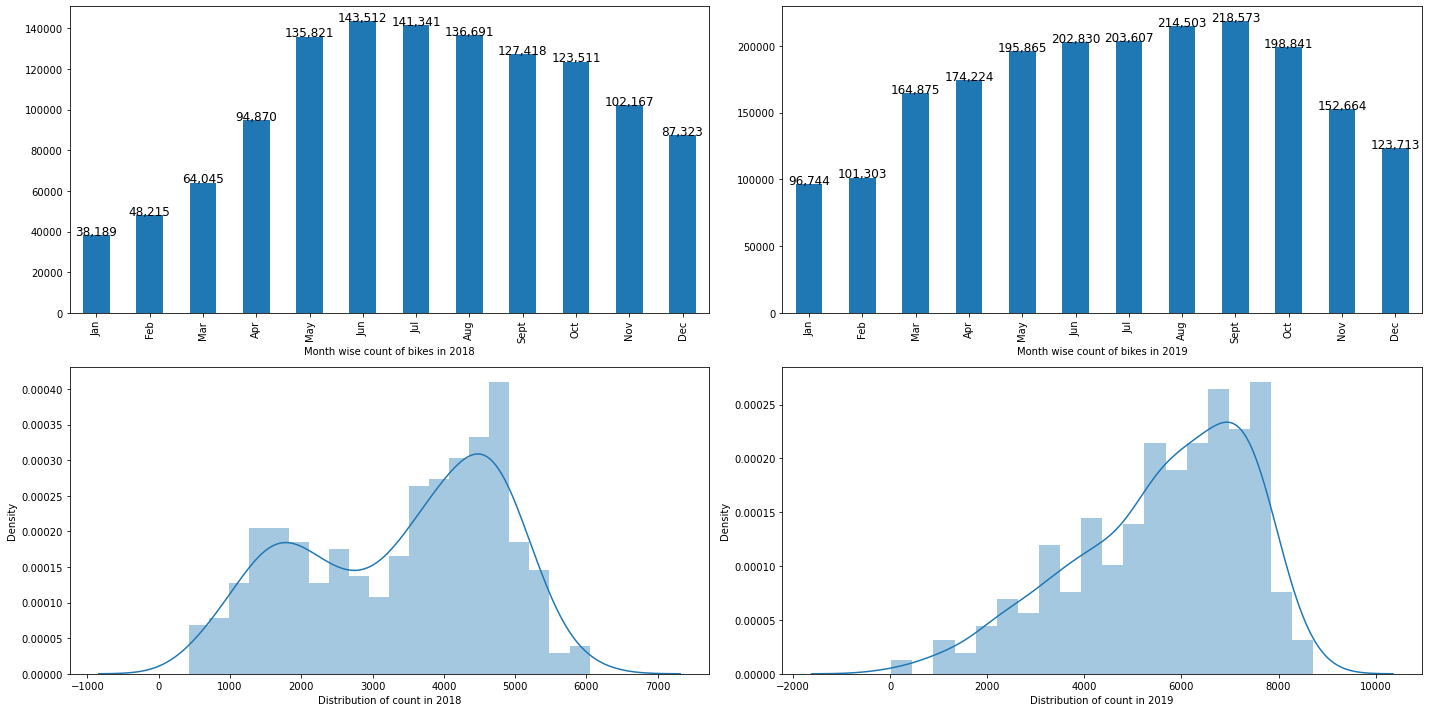

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
year_2018_month_wise_bike_cnt = data_2018.groupby(by=['month'])['cnt'].sum()
year_2019_month_wise_bike_cnt = data_2019.groupby(by=['month'])['cnt'].sum()

data_2018.groupby(by=['month'])['cnt'].sum().plot(kind='bar', ax=axes[0, 0])
for i, val in enumerate(year_2018_month_wise_bike_cnt):
    axes[0, 0].text(i, val, f'{val:,.0f}', ha='center', fontsize=12, color='k')
axes[0, 0].set_xlabel('Month wise count of bikes in 2018')

data_2019.groupby(by=['month'])['cnt'].sum().plot(kind='bar', ax=axes[0, 1])
for i, val in enumerate(year_2019_month_wise_bike_cnt):
    axes[0, 1].text(i, val, f'{val:,.0f}', ha='center', fontsize=12, color='k')
axes[0, 1].set_xlabel('Month wise count of bikes in 2019')

sns.distplot(data_2018['cnt'], kde=True, bins=20, ax=axes[1, 0])
axes[1, 0].set_xlabel('Distribution of count in 2018')

sns.distplot(data_2019['cnt'], kde=True, bins=20, ax=axes[1, 1])
axes[1, 1].set_xlabel('Distribution of count in 2019')

plt.tight_layout()
plt.show()

- In 2019, the count of bikes in every month has been increased which shows that there is an increase in bike demand.
- In both the years, lowest bike demand is observed in January
- In 2018, highest demand is observed in June and in 2019, it's in September.
- There is no skewness found in distribution of the count
- For 2019 , the distribution is very closed to be normal distribution

In [55]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_2['weekday'] = pd.Categorical(data_2['weekday'], categories=weekday_order, ordered=True)
data_2018['weekday'] = pd.Categorical(data_2018['weekday'], categories=weekday_order, ordered=True)
data_2019['weekday'] = pd.Categorical(data_2019['weekday'], categories=weekday_order, ordered=True)

In [56]:
pd.pivot_table(data=data_2,index='weekday',columns='year',values='cnt', 
                                  aggfunc='sum')

year         2018    2019
weekday                  
Monday     179743  267538
Tuesday    177074  271748
Wednesday  180221  282055
Thursday   180338  307585
Friday     169169  308963
Saturday   174552  306624
Sunday     182006  303229

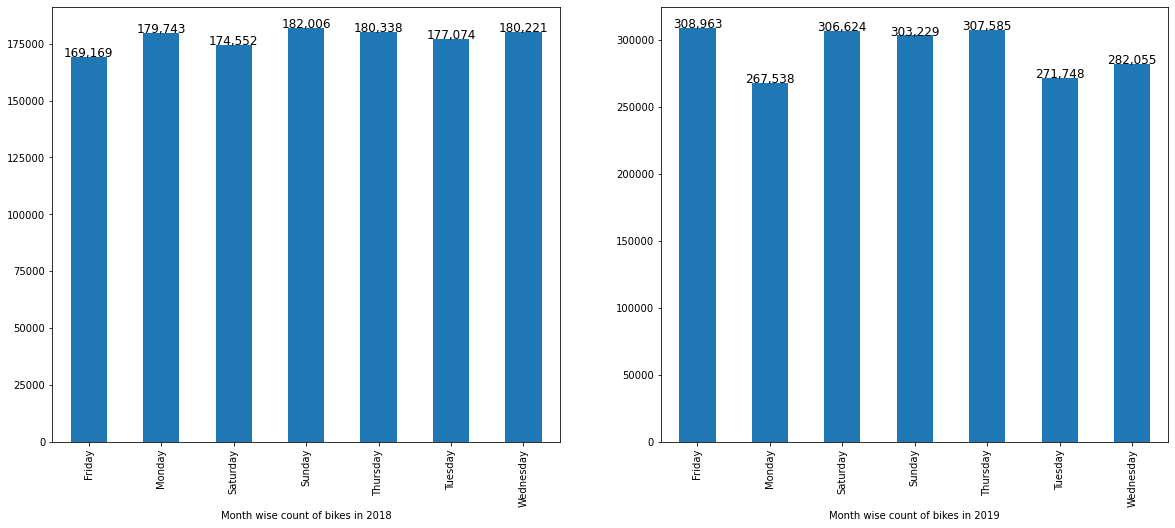

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

weekday_2018_bike_cnt = data_2018.groupby(by=['weekday'])['cnt'].sum()
weekday_2019_bike_cnt = data_2019.groupby(by=['weekday'])['cnt'].sum()

weekday_2018_bike_cnt.plot(kind='bar',ax=axes[0])
for i, val in enumerate(weekday_2018_bike_cnt):
    axes[0].text(i, val, f'{val:,.0f}', ha='center', fontsize=12, color='k')
axes[0].set_xlabel('Month wise count of bikes in 2018')

weekday_2019_bike_cnt.plot(kind='bar', ax=axes[1])
for i, val in enumerate(weekday_2019_bike_cnt):
    axes[1].text(i, val, f'{val:,.0f}', ha='center', fontsize=12, color='k')
axes[1].set_xlabel('Month wise count of bikes in 2019')

plt.show()

In [75]:
weekday_2018_bike_cnt

weekday
Friday       169169
Monday       179743
Saturday     174552
Sunday       182006
Thursday     180338
Tuesday      177074
Wednesday    180221
Name: cnt, dtype: int64

In [76]:
weekday_2019_bike_cnt

weekday
Friday       308963
Monday       267538
Saturday     306624
Sunday       303229
Thursday     307585
Tuesday      271748
Wednesday    282055
Name: cnt, dtype: int64

- The weekday wise bike count is almost uniform in 2018 but in 2019, we can see a higher count in last 4 days of week than first three days.
- In 2018 the demand is higher in the first 4 days of any week , followed by some drop on Friday and then an increase on weekends.
- But overall, in 2019, the demand or count of bikes is higher than 2018.

In [78]:
pd.pivot_table(data=data_2,index='holiday',columns='year',values='cnt', 
                                  aggfunc='sum')   ### Assumption-: 1-> Holiday, 0-> Non-Holiday

year        2018     2019
holiday                  
0        1213081  1999329
1          30022    48413

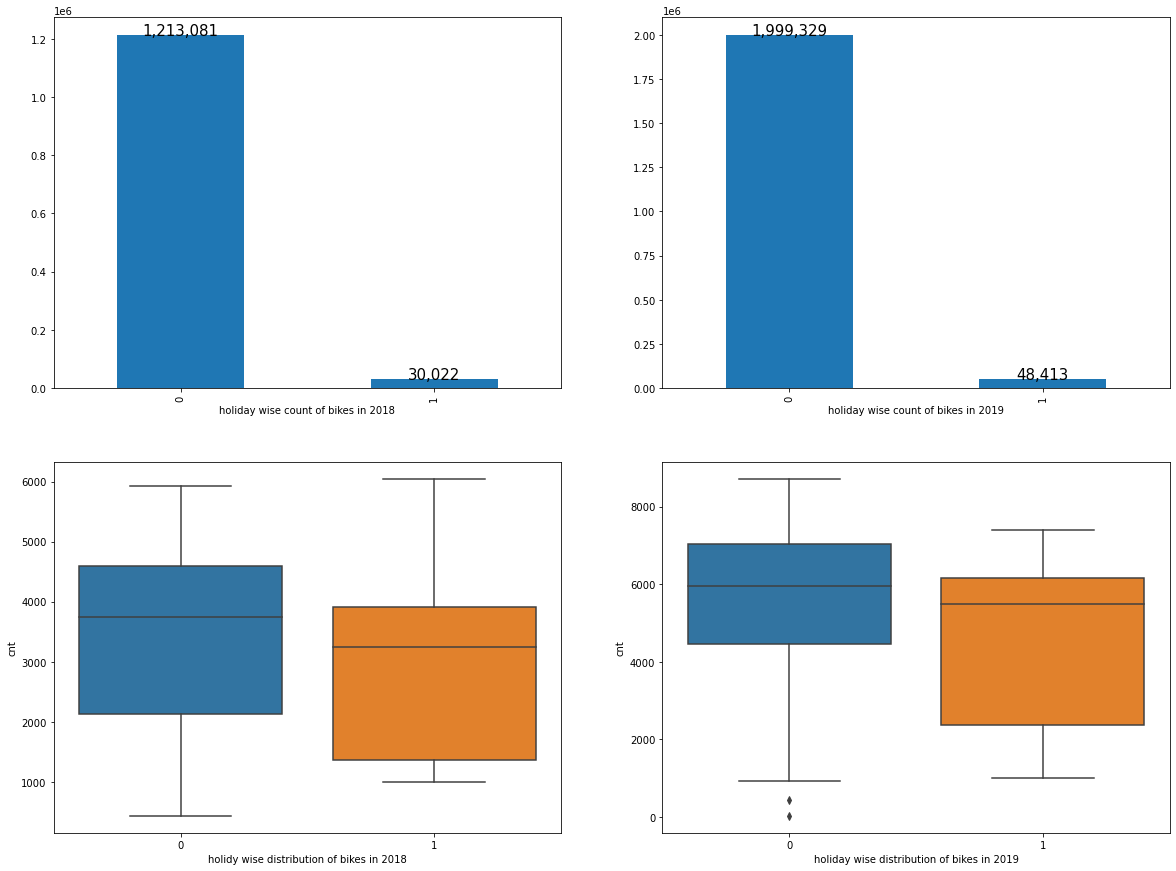

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

year_2018_holiday_bike_cnt = data_2018.groupby(by=['holiday'])['cnt'].sum()
year_2019_holiday_bike_cnt = data_2019.groupby(by=['holiday'])['cnt'].sum()

year_2018_holiday_bike_cnt.plot(kind='bar',ax=axes[0,0])
for i, val in enumerate(year_2018_holiday_bike_cnt):
    axes[0, 0].text(i, val, f'{val:,.0f}', ha='center', fontsize=15, color='k')
axes[0,0].set_xlabel('holiday wise count of bikes in 2018')

year_2019_holiday_bike_cnt.plot(kind='bar',ax=axes[0,1])
for i, val in enumerate(year_2019_holiday_bike_cnt):
    axes[0, 1].text(i, val, f'{val:,.0f}', ha='center', fontsize=15, color='k')
axes[0,1].set_xlabel('holiday wise count of bikes in 2019')

sns.boxplot(x='holiday', y='cnt', data=data_2018, ax=axes[1,0])
axes[1,0].set_xlabel('holidy wise distribution of bikes in 2018')

sns.boxplot(x='holiday', y='cnt', data=data_2019, ax=axes[1,1])
axes[1,1].set_xlabel('holiday wise distribution of bikes in 2019')
plt.show()

- In both the years, the bike count on non-holiday is quite higher than holidays.

In [60]:
pd.pivot_table(data=data_2,index='workingday',columns='year',values='cnt', 
                                  aggfunc='sum')   ### Assumption-: if day is neither weekend nor holiday is 1, otherwise is 0

year          2018     2019
workingday                 
0           378591   658266
1           864512  1389476

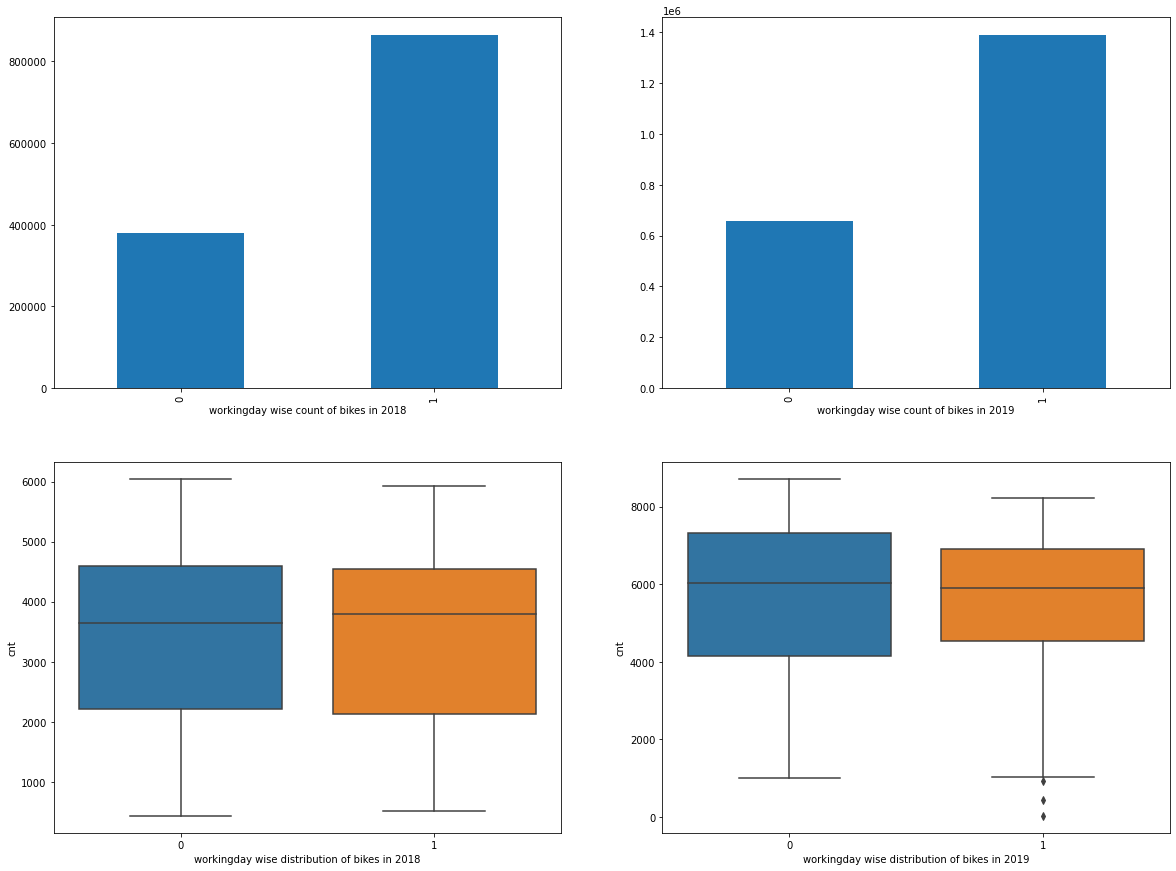

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
data_2018.groupby(by=['workingday'])['cnt'].sum().plot(kind='bar',ax=axes[0,0])
axes[0,0].set_xlabel('workingday wise count of bikes in 2018')

data_2019.groupby(by=['workingday'])['cnt'].sum().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_xlabel('workingday wise count of bikes in 2019')

sns.boxplot(x='workingday', y='cnt', data=data_2018, ax=axes[1,0])
axes[1,0].set_xlabel('workingday wise distribution of bikes in 2018')

sns.boxplot(x='workingday', y='cnt', data=data_2019, ax=axes[1,1])
axes[1,1].set_xlabel('workingday wise distribution of bikes in 2019')
plt.show()

- There are very few outliers existing for 2019. we can either go with this or we can impute this

In [62]:
data_2['Season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [63]:
pd.pivot_table(data=data_2,index='Season',columns='year',values='cnt', 
                                  aggfunc='sum')

year      2018    2019
Season                
fall    419650  641479
spring  150000  319514
summer  347316  571273
winter  326137  515476

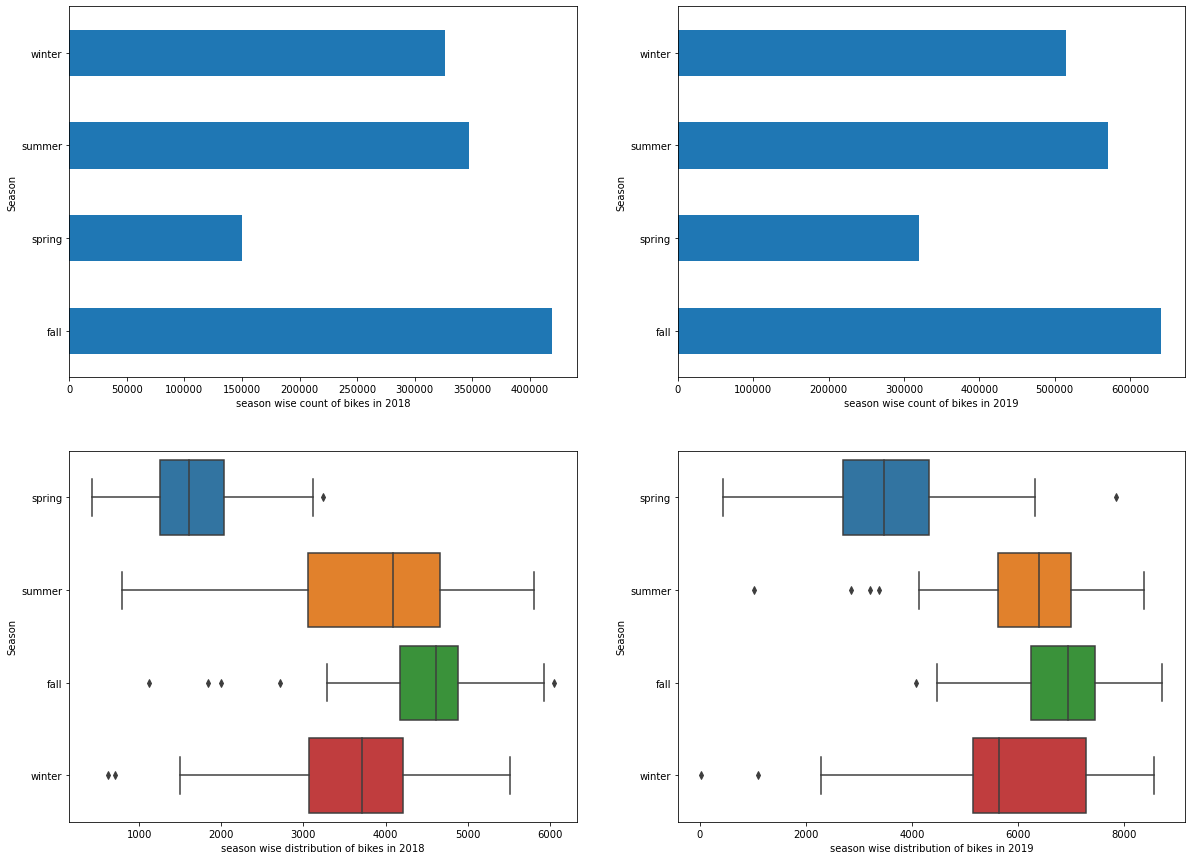

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
data_2018.groupby(by=['Season'])['cnt'].sum().plot(kind='barh',ax=axes[0,0])
axes[0,0].set_xlabel('season wise count of bikes in 2018')

data_2019.groupby(by=['Season'])['cnt'].sum().plot(kind='barh', ax=axes[0,1])
axes[0,1].set_xlabel('season wise count of bikes in 2019')

sns.boxplot(y='Season', x='cnt', data=data_2018, ax=axes[1,0])
axes[1,0].set_xlabel('season wise distribution of bikes in 2018')

sns.boxplot(y='Season', x='cnt', data=data_2019, ax=axes[1,1])
axes[1,1].set_xlabel('season wise distribution of bikes in 2019')
plt.show()

- Observation:
    - In both te years , in fall season the bike demand is high and in Spring it's lowest.
    - Like all other variables here also we can see that in 2019, the bike demands is pretty much higher than that of 2018.
    - There are some presence of outliers.

In [65]:
data_2['weathersit'].unique()

array([2, 1, 3], dtype=object)

- Weather situation 1, 2 and 3 significances are below:
      1: Clear, Few clouds, Partly cloudy, Partly cloudy
      2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

- These situation 1, 2, 3 are not any order these are just the identifications of these particular situations. So for transformation part we can do one hot encoding only

In [66]:
pd.pivot_table(data=data_2,index='weathersit',columns='year',values='cnt', 
                                  aggfunc='sum')

year          2018     2019
weathersit                 
1           835067  1422885
2           382924   612100
3            25112    12757

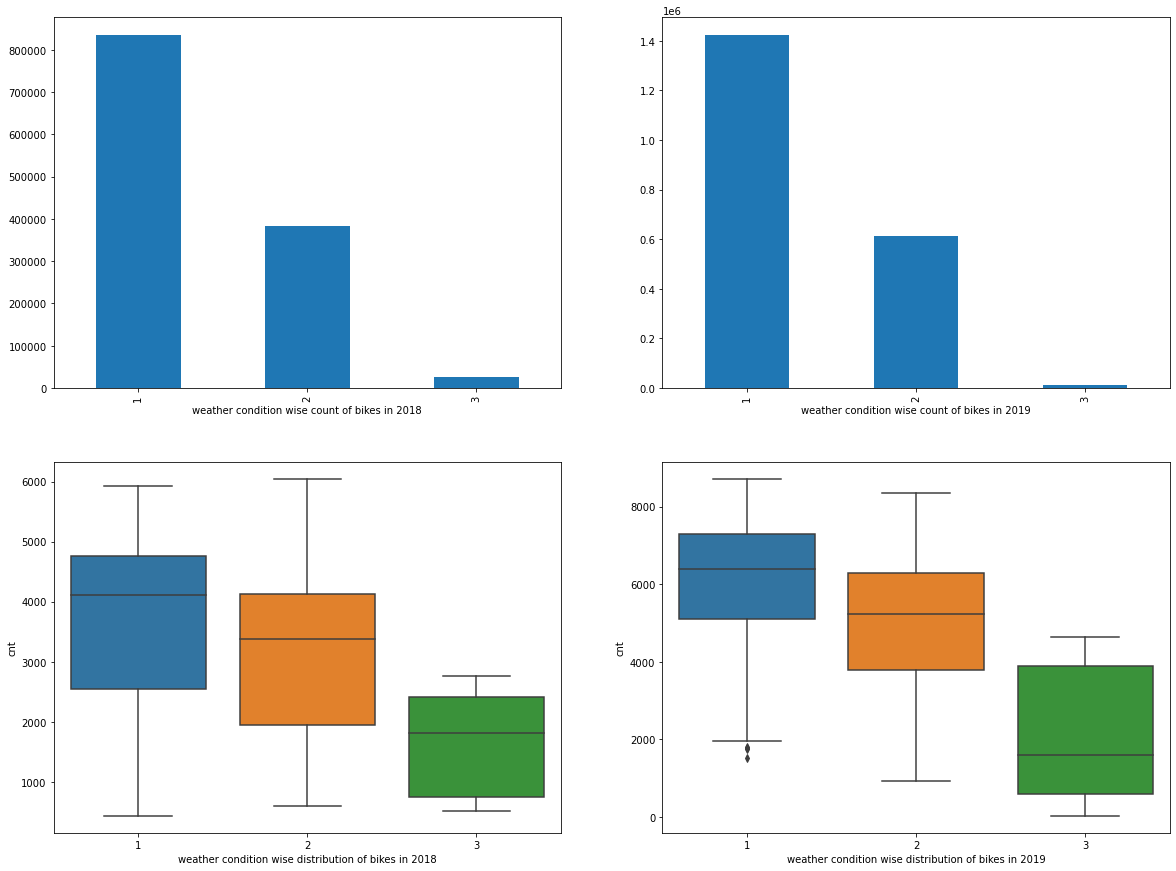

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
data_2018.groupby(by=['weathersit'])['cnt'].sum().plot(kind='bar',ax=axes[0,0])
axes[0,0].set_xlabel('weather condition wise count of bikes in 2018')

data_2019.groupby(by=['weathersit'])['cnt'].sum().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_xlabel('weather condition wise count of bikes in 2019')

sns.boxplot(x='weathersit', y='cnt', data=data_2018, ax=axes[1,0])
axes[1,0].set_xlabel('weather condition wise distribution of bikes in 2018')

sns.boxplot(x='weathersit', y='cnt', data=data_2019, ax=axes[1,1])
axes[1,1].set_xlabel('weather condition wise distribution of bikes in 2019')
plt.show()

- Observation:
    - In 2018, weather condition 3 was more demandful for bikes in comparison with the same weater condition for 2019.
    - Other than that in weather season 1 and 2 of 2019, bike demand was more than 2018.
    - In 2019, there is small existance of outliers

#### Numerical columns' Analysis

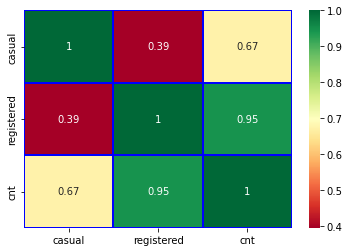

In [68]:
sns.heatmap(data_2[['casual', 'registered', 'cnt']].corr(), annot=True,linecolor='blue',linewidth=1.5,cmap='RdYlGn')
plt.show()

- Observation:
    - From this correlation matrix we can see that , registered and casual both are inter-related which shows the presence of multi-collinearity.
    - Also , from the inspection of the dataset we can see that registerd + casual = cnt
    - To prove the multicollinearity we can do VIF test also.

In [69]:
data_2[['casual', 'registered', 'cnt']].shape

(730, 3)

In [70]:
data_2[['casual', 'registered', 'cnt']].values

array([[ 331,  654,  985],
       [ 131,  670,  801],
       [ 120, 1229, 1349],
       ...,
       [ 159, 1182, 1341],
       [ 364, 1432, 1796],
       [ 439, 2290, 2729]], dtype=int64)

In [71]:
df_temp = data_2[['casual', 'registered', 'cnt']]

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif = pd.DataFrame()
vif['Features'] = df_temp.columns
vif['VIF'] = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0      casual  inf
1  registered  inf
2         cnt  inf

We can drop the variable "registered" and "casual"

In [74]:
data_2 = data_2.drop(['casual','registered'], axis=1)

In [75]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   holiday     730 non-null    object  
 1   weekday     730 non-null    category
 2   workingday  730 non-null    object  
 3   weathersit  730 non-null    object  
 4   temp        730 non-null    float64 
 5   atemp       730 non-null    float64 
 6   hum         730 non-null    float64 
 7   windspeed   730 non-null    float64 
 8   cnt         730 non-null    int64   
 9   Season      730 non-null    object  
 10  year        730 non-null    object  
 11  month       730 non-null    category
dtypes: category(2), float64(4), int64(1), object(5)
memory usage: 59.3+ KB


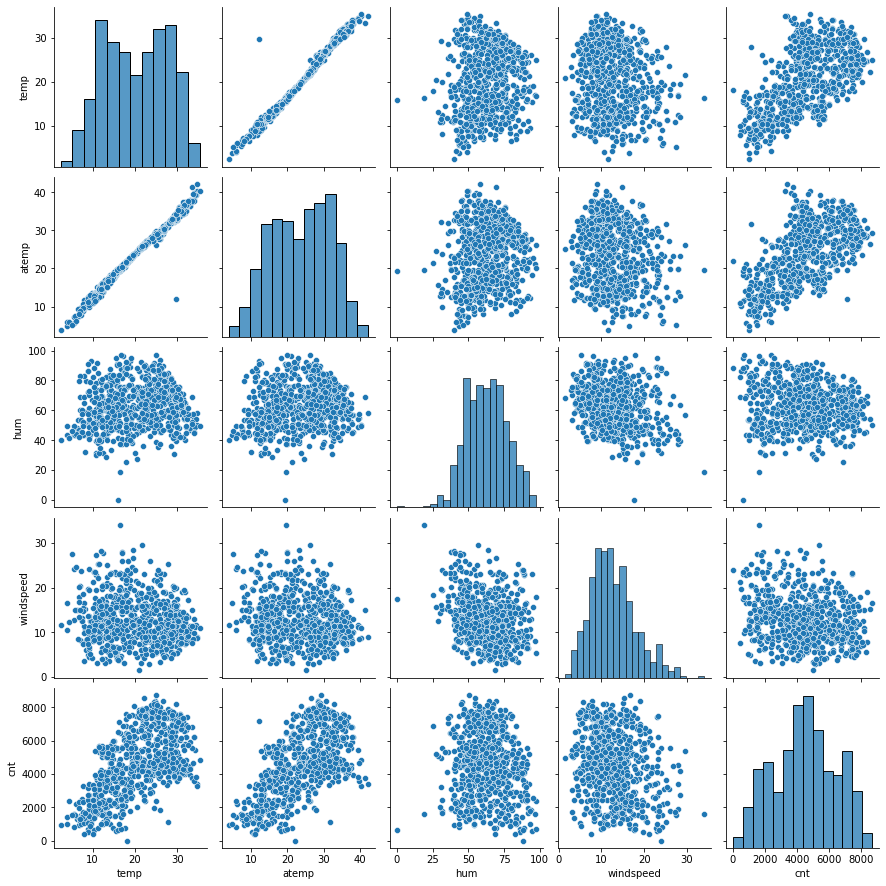

In [76]:
sns.pairplot(data_2[['temp','atemp','hum','windspeed','cnt']])

In [77]:
data_2[['temp','atemp','hum','windspeed','cnt']].corr()

temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000

In [78]:
data_2[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].sort_values(ascending=False)

cnt          1.000000
atemp        0.630685
temp         0.627044
hum         -0.098543
windspeed   -0.235132
Name: cnt, dtype: float64

- Observation :
    - temp and atemp are highly correlated with count of bikes
    - it can be clearly seen that temp and atemp are also ighly correlated whic can surely lead towards multicollinarity.
    - After building the model any one of these two can be dropped off based on their significance and VIF value.
    - temp denotes actual temparature and atemp denotes temparature ow it feels.
    - Though there are some sort of positive correlation found between humidity and temparature as well as negative correlation beetwwen windspeed and temparature, we can't decide anything as of now about their significance. As correlation doesn't tell about causation. Only we can say there are some association found among the independent variables also.
    - Humidity and windspeed have negative correlation with count.
    - There is no such linear relationship between other predictor variables except temp and atemp.
    - Humidity and windspeed are normally distributed , but windspeed has little right skewness and humidity is a bit left skewed
    - The target variable 'cnt' also in a non-linear relationship with 'hum' and 'windspeed' .

#### Target Variable: cnt

Text(0.5, 0, 'Count Distribution')

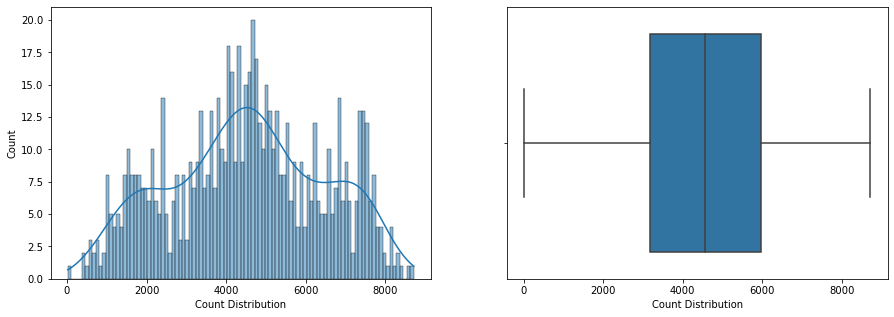

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(x='cnt', data=data_2, kde=True, bins=100, ax=axes[0])
axes[0].set_xlabel('Count Distribution')

sns.boxplot(x='cnt', data=data_2, ax=axes[1])
axes[1].set_xlabel('Count Distribution')

- Observation:
    - Count is normally distributed and no outlier is there 

 <span style="color:darkred; font-weight:bold"> temp, atemp and count relation</span>

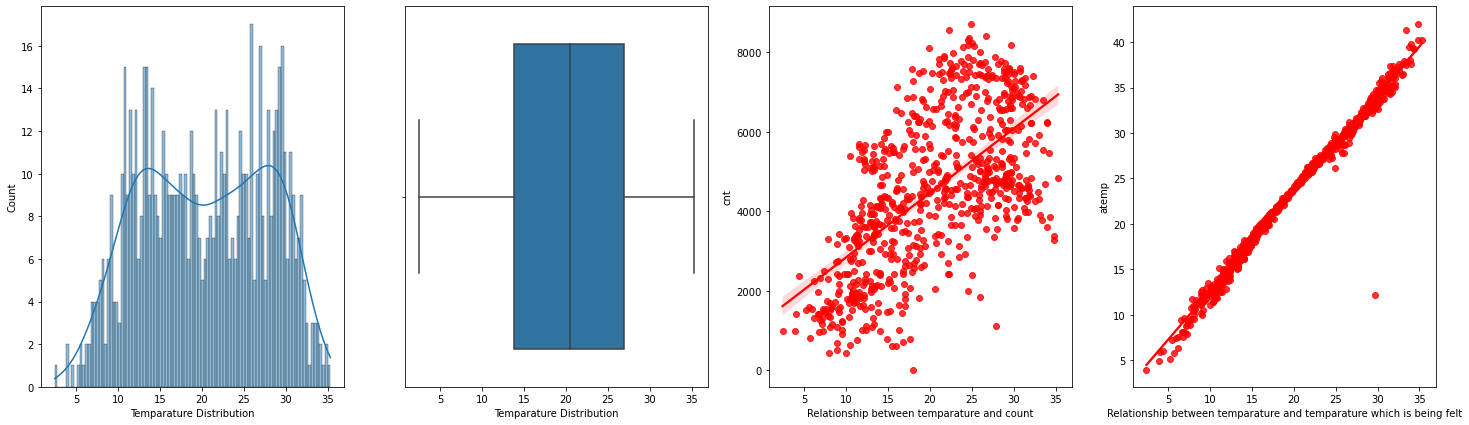

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,7))
sns.histplot(x='temp', data=data_2, kde=True, bins=100, ax=axes[0])
axes[0].set_xlabel('Temparature Distribution')

sns.boxplot(x='temp', data=data_2, ax=axes[1])
axes[1].set_xlabel('Temparature Distribution')

sns.regplot(x='temp', y='cnt', color= 'red', data=data_2, ax=axes[2])
axes[2].set_xlabel('Relationship between temparature and count')

sns.regplot(x='temp', y='atemp', color= 'red', data=data_2, ax=axes[3])
axes[3].set_xlabel('Relationship between temparature and temparature which is being felt')


plt.show()


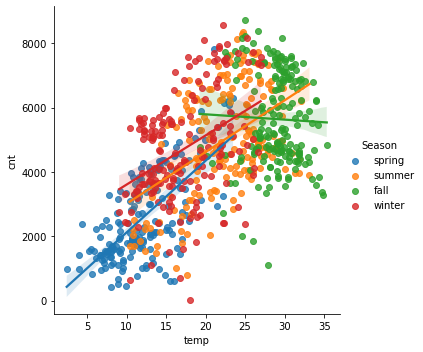

In [81]:
sns.lmplot(x='temp', y='cnt', hue='Season',data=data_2)
plt.show()

- Observation:
    - There is no outlier for this attribute.
    - Temparature is having a good linear relationship with Count specifically for Spring, Summer and Winter. Not for Fall season
    - Temparature is multicollinear with atemp.
    

In [82]:
# data_2.loc[(data_2['month']=='Dec')]

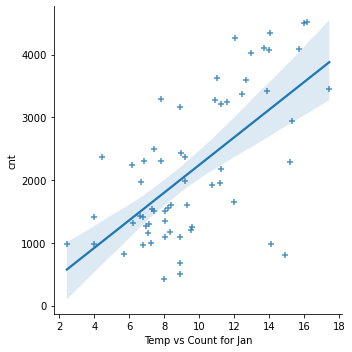

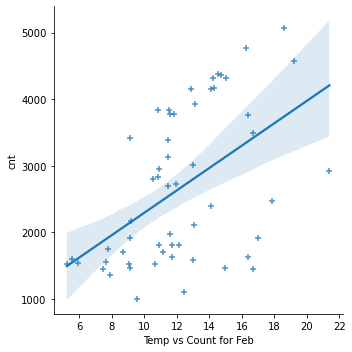

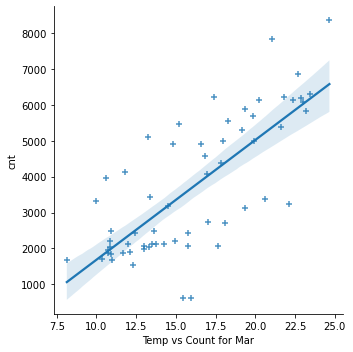

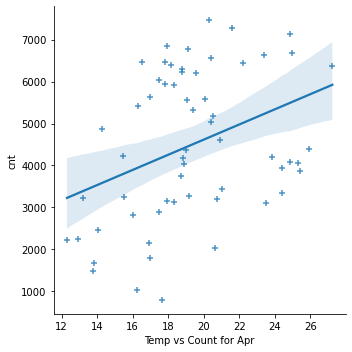

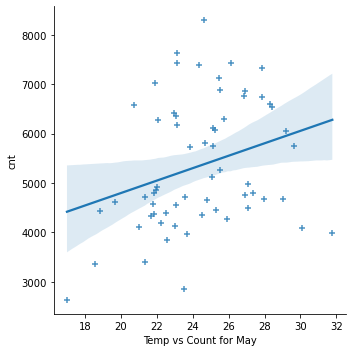

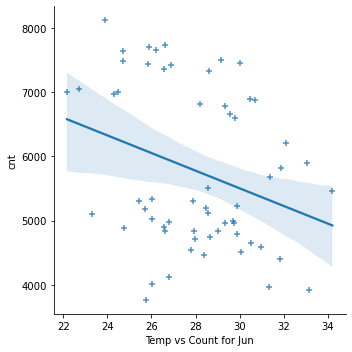

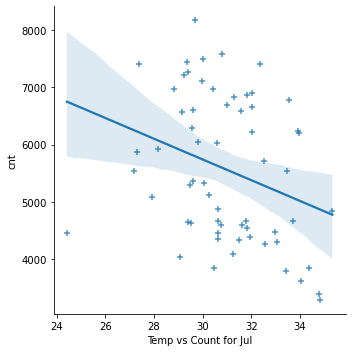

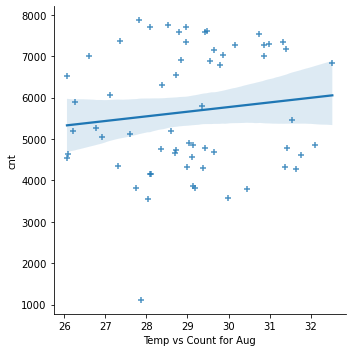

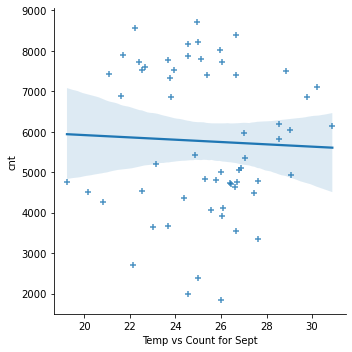

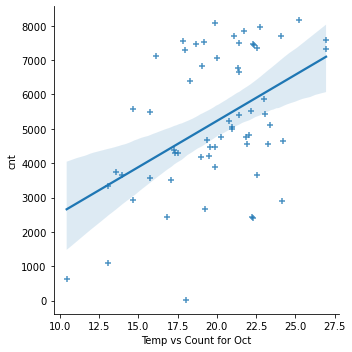

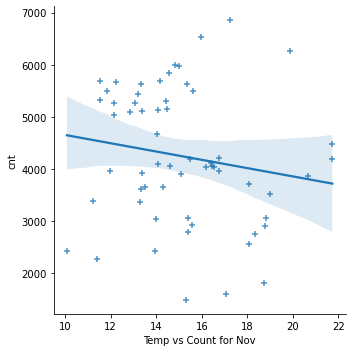

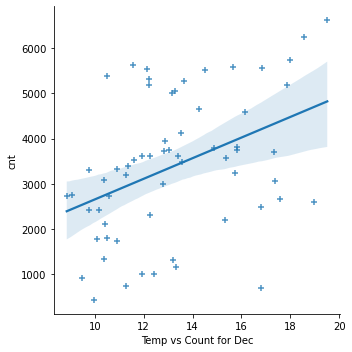

In [83]:
for i in data_2['month'].unique():
    sns.lmplot(x='temp',y='cnt', markers='+',palette= 'copper',data=data_2.loc[(data_2['month']==i)])
    plt.xlabel(f'Temp vs Count for {i}')

- Observation:
    - For Jan to May we can see that there is a linear relationship between temp and vount of bikes especially for March.
    - For April and May also there is a positive linear relationship but it's not as strong as January to March.
    - For June and July the linear relationship is negative.
    - For August and September the relationship is not much linear.
    - For Oct and December again it's showing positive linear relationship but for November it's showing negative Linear relationship.

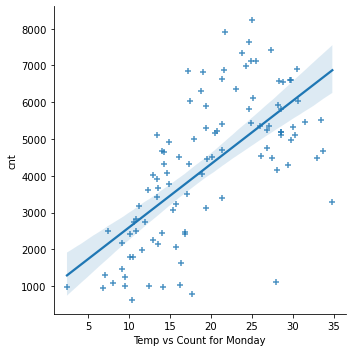

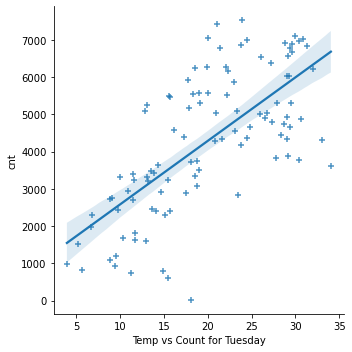

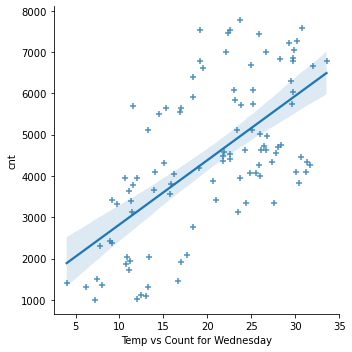

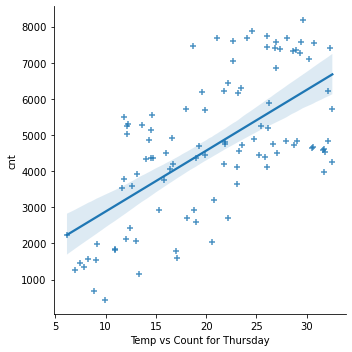

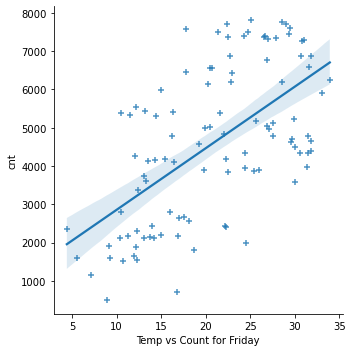

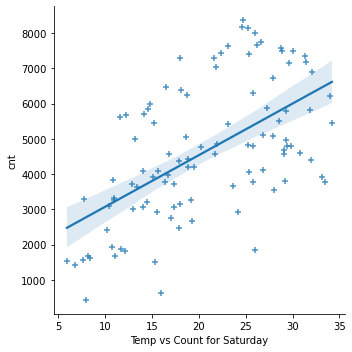

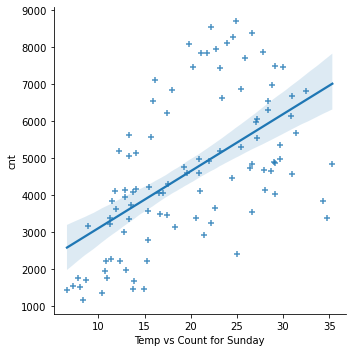

In [84]:
for i in data_2['weekday'].unique():
    sns.lmplot(x='temp',y='cnt', markers='+',palette= 'copper',data=data_2.loc[(data_2['weekday']==i)])
    plt.xlabel(f'Temp vs Count for {i}')

- Observation:
    - For all the weekdays there can be found a highly strong linear relationship between Temparature and count

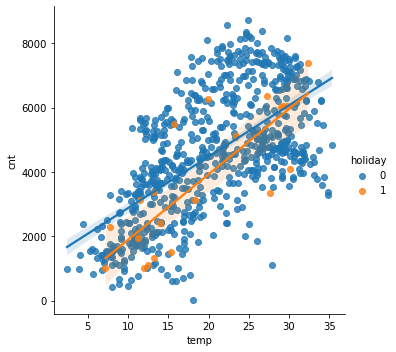

In [85]:
sns.lmplot(x='temp', y='cnt', hue='holiday', data=data_2)
plt.show()

- Observation:
    - For both holiday and non-holiday the relationship between temparature and count is significantly linear

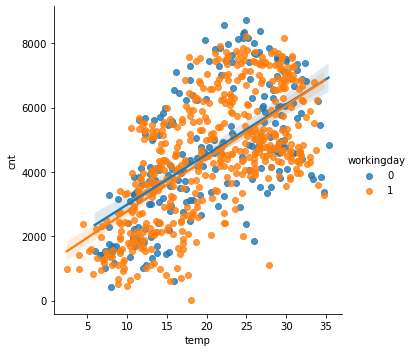

In [86]:
sns.lmplot(x='temp', y='cnt', hue='workingday', data=data_2)
plt.show()

- Observation:
    - For both working-day and non-working day the relationship between temparature and count is significantly linear

 -<span style="color:darkred; font-weight:bold"> hum, windspeed and count relation</span>

Text(0.5, 0, 'Relationship between Windspeed and count')

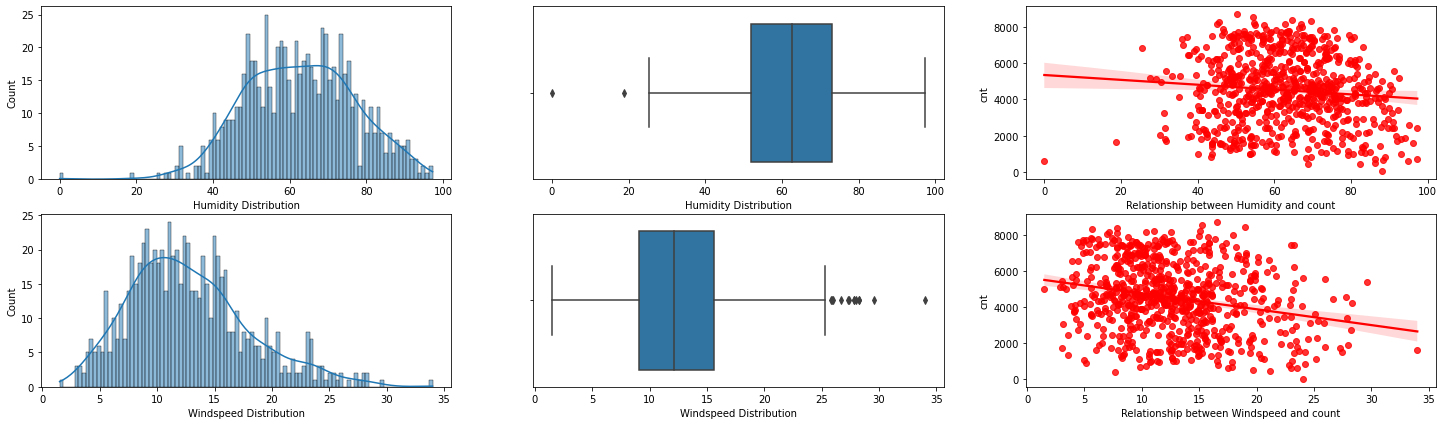

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,7))
sns.histplot(x='hum', data=data_2, kde=True, bins=100, ax=axes[0,0])
axes[0,0].set_xlabel('Humidity Distribution')

sns.boxplot(x='hum', data=data_2, ax=axes[0,1])
axes[0,1].set_xlabel('Humidity Distribution')

sns.regplot(x='hum', y='cnt', color= 'red', data=data_2, ax=axes[0,2])
axes[0,2].set_xlabel('Relationship between Humidity and count')

sns.histplot(x='windspeed', data=data_2, kde=True, bins=100, ax=axes[1,0])
axes[1,0].set_xlabel('Windspeed Distribution')

sns.boxplot(x='windspeed', data=data_2, ax=axes[1,1])
axes[1,1].set_xlabel('Windspeed Distribution')

sns.regplot(x='windspeed', y='cnt', color= 'red', data=data_2, ax=axes[1,2])
axes[1,2].set_xlabel('Relationship between Windspeed and count')

#### Outlier Detection

In [88]:
outliers = []
upper_lim = 0
lower_lim = 0
def outlier_detection(df,x):
    global outliers
    x_dict = dict(df[x].describe())
    print(x_dict)
    Q1 = x_dict['25%']
    print("Q1 :", Q1)
    Q3 = x_dict['75%']
    print("Q3 :", Q3)
    IQR = Q3 - Q1
    print("Inter quartile range is ", IQR)
    global lower_lim
    global upper_lim
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("The lower limit is ", round(lower_lim))
    print("The upper limit is ", round(upper_lim))

    for i in df[x]:
        if ((i > upper_lim) | (i < lower_lim)):
            outliers.append(i)
#    print("The outliers of ", x ,"is :", outliers)

#### Taking a copy of the main dataframe in order to keep the original one intact

In [89]:
data_3 = data_2.copy()

In [90]:
data_3.head()

holiday    weekday workingday weathersit       temp     atemp      hum  \
0       0     Monday          1          2  14.110847  18.18125  80.5833   
1       0    Tuesday          1          2  14.902598  17.68695  69.6087   
2       0  Wednesday          1          1   8.050924   9.47025  43.7273   
3       0   Thursday          1          1   8.200000  10.60610  59.0435   
4       0     Friday          1          1   9.305237  11.46350  43.6957   

   windspeed   cnt  Season  year month  
0  10.749882   985  spring  2018   Jan  
1  16.652113   801  spring  2018   Jan  
2  16.636703  1349  spring  2018   Jan  
3  10.739832  1562  spring  2018   Jan  
4  12.522300  1600  spring  2018   Jan

In [91]:
outlier_detection(data_3, 'windspeed')

{'count': 730.0, 'mean': 12.763619654657532, 'std': 5.195840704080461, 'min': 1.5002439, '25%': 9.04165, '50%': 12.125325, '75%': 15.62558925, 'max': 34.000021}
Q1 : 9.04165
Q3 : 15.62558925
Inter quartile range is  6.58393925
The lower limit is  -1
The upper limit is  26


In [92]:
len(outliers)

13

In [93]:
outliers

[27.999836,
 34.000021,
 25.833257,
 26.000489,
 28.292425,
 27.833743,
 27.417204,
 28.250014,
 29.584721,
 27.7916,
 25.917007,
 26.666536,
 27.292182]

In [94]:
data_3.loc[(data_3['windspeed'] >= upper_lim) & (data_3['windspeed'] <= max(data_3['windspeed']))]

holiday    weekday workingday weathersit       temp     atemp      hum  \
44        0  Wednesday          1          1  17.015000  19.91750  37.5833   
49        0     Monday          1          1  16.365847  19.57020  18.7917   
93        0  Wednesday          1          1  23.506653  27.14645  42.6250   
94        0   Thursday          1          2  16.980847  19.91750  64.2083   
292       0   Saturday          0          1  19.509153  23.32625  63.6250   
382       0     Friday          1          1  12.436653  13.76270  44.3333   
407       0    Tuesday          1          1   5.227500   5.08290  46.4583   
420       0     Monday          1          1  11.924153  12.78375  39.5833   
431       0     Friday          1          1  21.627500  26.23020  56.7500   
432       0   Saturday          0          2  16.844153  19.85415  40.7083   
449       0    Tuesday          1          1  18.279153  21.93750  47.7917   
665       0     Monday          1          2  19.577500  23.38855  69.4583   
720       0     Sunday          0          1  10.899153  11.80565  44.1250   

     windspeed   cnt  Season  year month  
44   27.999836  1913  spring  2018   Feb  
49   34.000021  1635  spring  2018   Feb  
93   25.833257  3115  summer  2018   Apr  
94   26.000489  1795  summer  2018   Apr  
292  28.292425  4195  winter  2018   Oct  
382  27.833743  3376  spring  2019   Jan  
407  27.417204  1529  spring  2019   Feb  
420  28.250014  2732  spring  2019   Feb  
431  29.584721  5382  spring  2019   Mar  
432  27.791600  4569  spring  2019   Mar  
449  25.917007  5558  summer  2019   Mar  
665  26.666536  4459  winter  2019   Oct  
720  27.292182  1749  spring  2019   Dec

In [95]:
data_3.loc[(   (data_3['windspeed']>= upper_lim) & 
            (data_3['windspeed']<=max(data_3['windspeed']))   ), 'windspeed' ]= round(upper_lim)

Text(0.5, 0, 'Windspeed Distribution for checking outliers')

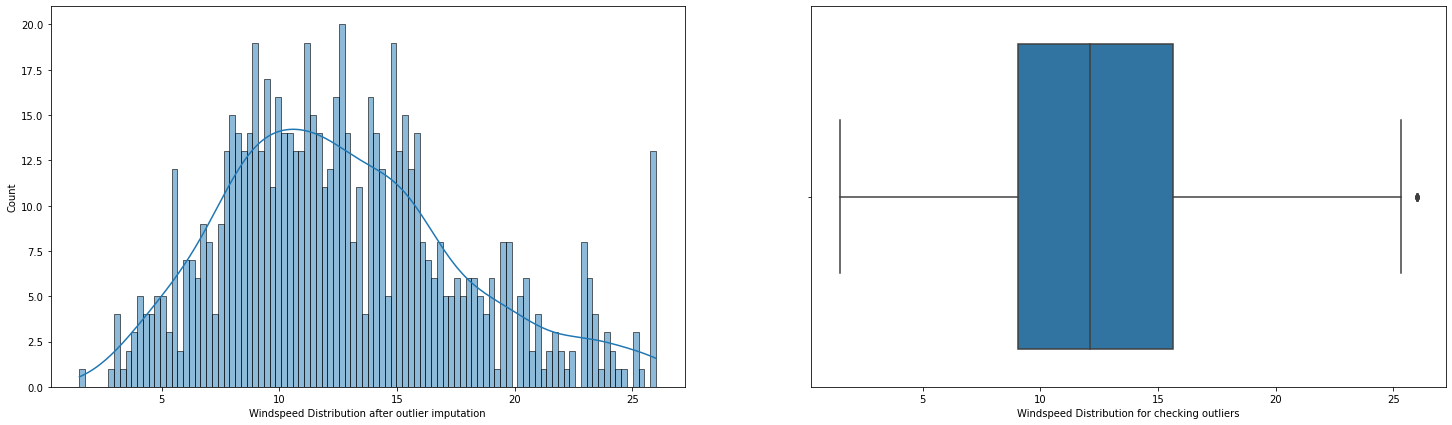

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))

sns.histplot(x='windspeed', data=data_3, kde=True, bins=100, ax=axes[0])
axes[0].set_xlabel('Windspeed Distribution after outlier imputation')

sns.boxplot(x='windspeed', data=data_3, ax=axes[1])
axes[1].set_xlabel('Windspeed Distribution for checking outliers')

Though imputing the value can destroy the purity of the dataset, but still here we are doing the outlier imputation

In [97]:
outliers.clear()

In [98]:
outlier_detection(data_3, 'hum')

{'count': 730.0, 'mean': 62.76517493150685, 'std': 14.237589043405638, 'min': 0.0, '25%': 52.0, '50%': 62.625, '75%': 72.989575, 'max': 97.25}
Q1 : 52.0
Q3 : 72.989575
Inter quartile range is  20.989575000000002
The lower limit is  21
The upper limit is  104


In [99]:
len(outliers)

2

In [100]:
data_3.loc[(data_3['hum'] >= upper_lim) & (data_3['hum'] <= max(data_3['hum']))]

Empty DataFrame
Columns: [holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, cnt, Season, year, month]
Index: []

In [101]:
data_3.loc[(data_3['hum'] <= lower_lim) & (data_3['hum'] >= min(data_3['hum']))]

holiday   weekday workingday weathersit       temp    atemp      hum  \
49       0    Monday          1          1  16.365847  19.5702  18.7917   
68       0  Saturday          0          3  15.952731  19.2834   0.0000   

    windspeed   cnt  Season  year month  
49  26.000000  1635  spring  2018   Feb  
68  17.545759   623  spring  2018   Mar

In [102]:
data_3.drop(data_3[data_3['hum'] == 18.7917].index, axis=0, inplace=True)
data_3.drop(data_3[data_3['hum'] == 0.0000].index, axis = 0, inplace=True)

In [103]:
data_3.shape

(728, 12)

### Inference from the Exploratory Data Analysis:
- If the temparature increases in January, February, March, April, May, October, December then there is a possibility of increase in bike demand.
- Despite of being holiday or working day , in all weekdays , as the temparature increases the bike demand possibility increases.
- Windspeed and humidity are negatively related with the bike demand.

In [104]:
data_3.head()

holiday    weekday workingday weathersit       temp     atemp      hum  \
0       0     Monday          1          2  14.110847  18.18125  80.5833   
1       0    Tuesday          1          2  14.902598  17.68695  69.6087   
2       0  Wednesday          1          1   8.050924   9.47025  43.7273   
3       0   Thursday          1          1   8.200000  10.60610  59.0435   
4       0     Friday          1          1   9.305237  11.46350  43.6957   

   windspeed   cnt  Season  year month  
0  10.749882   985  spring  2018   Jan  
1  16.652113   801  spring  2018   Jan  
2  16.636703  1349  spring  2018   Jan  
3  10.739832  1562  spring  2018   Jan  
4  12.522300  1600  spring  2018   Jan

In [105]:
data_3['year'].dtypes

dtype('O')

#### Changing the year column as it was earlier otherwise the model will be year specific

In [106]:
data_3['year'] = data_3['year'].apply(lambda x : 1 if x=='2019' else 0)

# data_1['year'] = data_1['yr'].apply(lambda x : 2019 if x==1 else 2018)

In [107]:
data_3.year.unique()

array([0, 1], dtype=int64)

In [108]:
data_3['year'].head(3)

0    0
1    0
2    0
Name: year, dtype: int64

In [109]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   holiday     728 non-null    object  
 1   weekday     728 non-null    category
 2   workingday  728 non-null    object  
 3   weathersit  728 non-null    object  
 4   temp        728 non-null    float64 
 5   atemp       728 non-null    float64 
 6   hum         728 non-null    float64 
 7   windspeed   728 non-null    float64 
 8   cnt         728 non-null    int64   
 9   Season      728 non-null    object  
 10  year        728 non-null    int64   
 11  month       728 non-null    category
dtypes: category(2), float64(4), int64(2), object(4)
memory usage: 64.7+ KB


### Splitting into train and test

In [110]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(data_3, train_size = 0.7, test_size = 0.3, random_state = 100)

In [111]:
df_train

holiday    weekday workingday weathersit       temp     atemp      hum  \
728       0     Monday          1          1  10.489153  11.58500  48.3333   
481       0   Saturday          0          1  18.757500  22.63185  40.0833   
113       0    Tuesday          1          2  23.848347  27.58815  81.0833   
629       0     Sunday          0          1  26.650000  30.52440  64.6667   
535       0   Thursday          1          1  32.082500  36.04875  59.2083   
..      ...        ...        ...        ...        ...       ...      ...   
580       0     Sunday          0          1  32.526653  37.56335  61.3333   
54        0   Saturday          0          2  12.121732  14.45955  69.7391   
352       0  Wednesday          1          1  11.343347  14.04665  63.7500   
81        0     Friday          1          2  14.225237  16.89695  83.9565   
522       0     Friday          1          1  24.702500  28.47210  56.7083   

     windspeed   cnt  Season  year month  
728  23.500518  1796  spring     1   Dec  
481  23.291411  6233  summer     1   Apr  
113  12.875725  4191  summer     0   Apr  
629  19.000061  8395    fall     1  Sept  
535   7.625404  6211  summer     1   Jun  
..         ...   ...     ...   ...   ...  
580  17.249686  6824    fall     1   Aug  
54   16.783232  1807  spring     0   Feb  
352  11.584032  3403  winter     0   Dec  
81   15.695487  2121  summer     0   Mar  
522  10.542450  7494  summer     1   Jun  

[509 rows x 12 columns]

In [112]:
df_test

holiday    weekday workingday weathersit       temp     atemp      hum  \
241       0   Thursday          1          1  26.205847  29.73520  54.8333   
496       0     Sunday          0          1  23.130847  27.24085  48.0417   
449       0    Tuesday          1          1  18.279153  21.93750  47.7917   
594       0     Sunday          0          1  27.811653  30.90355  60.3333   
151       0     Friday          1          2  31.330847  36.04835  67.7083   
..      ...        ...        ...        ...        ...       ...      ...   
418       0   Saturday          0          1  18.620847  22.22230  55.4583   
74        0     Friday          1          2  14.973897  18.34650  77.6522   
583       0  Wednesday          1          2  30.169153  34.88105  70.3750   
570       0   Thursday          1          1  29.690847  32.70270  45.0000   
425       0   Saturday          0          2  14.486653  17.99210  65.7083   

     windspeed   cnt  Season  year month  
241   8.375536  5204    fall     0   Aug  
496   8.249911  7429  summer     1   May  
449  26.000000  5558  summer     1   Mar  
594  11.917089  7865    fall     1   Aug  
151  13.875164  3974  summer     0   Jun  
..         ...   ...     ...   ...   ...  
418  12.791171  5062  spring     1   Feb  
74   13.608839  2192  spring     0   Mar  
583   7.832836  7273    fall     1   Aug  
570  11.041600  8173    fall     1   Jul  
425   9.708568  3194  spring     1   Mar  

[219 rows x 12 columns]

### X_train, y_train, X_test, y_test

In [113]:
X_train = df_train.drop('cnt', axis=1)

In [114]:
y_train = df_train['cnt']

In [115]:
X_test = df_test.drop('cnt', axis=1)

In [116]:
y_test = df_test['cnt']

### Numerical Data and Categorical Data Preprocessing

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 728 to 522
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   holiday     509 non-null    object  
 1   weekday     509 non-null    category
 2   workingday  509 non-null    object  
 3   weathersit  509 non-null    object  
 4   temp        509 non-null    float64 
 5   atemp       509 non-null    float64 
 6   hum         509 non-null    float64 
 7   windspeed   509 non-null    float64 
 8   Season      509 non-null    object  
 9   year        509 non-null    int64   
 10  month       509 non-null    category
dtypes: category(2), float64(4), int64(1), object(4)
memory usage: 41.5+ KB


In [118]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 509 entries, 728 to 522
Series name: cnt
Non-Null Count  Dtype
--------------  -----
509 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


In [119]:
# X_train_num = X_train.select_dtypes(include=['int64','float64'])

X_train_num = X_train[['temp','atemp','hum','windspeed','year']]

In [120]:
X_train_num

temp     atemp      hum  windspeed  year
728  10.489153  11.58500  48.3333  23.500518     1
481  18.757500  22.63185  40.0833  23.291411     1
113  23.848347  27.58815  81.0833  12.875725     0
629  26.650000  30.52440  64.6667  19.000061     1
535  32.082500  36.04875  59.2083   7.625404     1
..         ...       ...      ...        ...   ...
580  32.526653  37.56335  61.3333  17.249686     1
54   12.121732  14.45955  69.7391  16.783232     0
352  11.343347  14.04665  63.7500  11.584032     0
81   14.225237  16.89695  83.9565  15.695487     0
522  24.702500  28.47210  56.7083  10.542450     1

[509 rows x 5 columns]

In [121]:
X_train_cat = X_train.select_dtypes(include=['object','category'])

In [122]:
X_train_cat

holiday    weekday workingday weathersit  Season month
728       0     Monday          1          1  spring   Dec
481       0   Saturday          0          1  summer   Apr
113       0    Tuesday          1          2  summer   Apr
629       0     Sunday          0          1    fall  Sept
535       0   Thursday          1          1  summer   Jun
..      ...        ...        ...        ...     ...   ...
580       0     Sunday          0          1    fall   Aug
54        0   Saturday          0          2  spring   Feb
352       0  Wednesday          1          1  winter   Dec
81        0     Friday          1          2  summer   Mar
522       0     Friday          1          1  summer   Jun

[509 rows x 6 columns]

In [123]:
X_train_already_dummy_encoded = X_train[['year']]

#### Numerical Feature Preprocessing on Train set: Scaling

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
scaler = MinMaxScaler()   # Will bring all the values between 0 and 1 , distribution won't be affected

In [126]:
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [127]:
X_train_num_scaled

array([[0.2451011 , 0.20424209, 0.31902474, 0.89210381, 1.        ],
       [0.49638808, 0.49988853, 0.2041755 , 0.8830772 , 1.        ],
       [0.65110625, 0.63253381, 0.77494143, 0.4334589 , 0.        ],
       ...,
       [0.27106128, 0.27012314, 0.53364248, 0.37769985, 0.        ],
       [0.35864607, 0.34640561, 0.81493959, 0.55518075, 0.        ],
       [0.6770652 , 0.65619093, 0.43561412, 0.33273744, 1.        ]])

In [128]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns)

In [129]:
X_train_num_scaled_df.head()

temp     atemp       hum  windspeed  year
0  0.245101  0.204242  0.319025   0.892104   1.0
1  0.496388  0.499889  0.204176   0.883077   1.0
2  0.651106  0.632534  0.774941   0.433459   0.0
3  0.736253  0.711117  0.546404   0.697831   1.0
4  0.901354  0.858965  0.470417   0.206816   1.0

In [130]:
X_train_num_scaled_df.describe()

temp       atemp         hum   windspeed        year
count  509.000000  509.000000  509.000000  509.000000  509.000000
mean     0.537164    0.521667    0.529901    0.432105    0.506876
std      0.226375    0.215665    0.199051    0.223405    0.500445
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.336479    0.328412    0.383410    0.266193    0.000000
50%      0.533770    0.530326    0.527262    0.408285    1.000000
75%      0.736253    0.703523    0.669954    0.562920    1.000000
max      1.000000    1.000000    1.000000    1.000000    1.000000

#### Categorical Feature Preprocessing: Dummy Encoding

In [131]:
X_train_cat.columns

Index(['holiday', 'weekday', 'workingday', 'weathersit', 'Season', 'month'], dtype='object')

In [132]:
#X_train_year = X_train_cat['year']   # Year column already has 1 and 0. No need to do one hot encoding

In [133]:
# Excluding the year column taking the rest columns

# exclude_column = 'year'
# X_train_cat_dummy = X_train_cat.loc[:, X_train_cat.columns.difference([exclude_column])]

In [134]:
X_train_cat_dummy = pd.get_dummies(X_train_cat, drop_first = True)

In [135]:
X_train_cat_dummy

holiday_1  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
728          0                0                  0                 0   
481          0                0                  0                 0   
113          0                1                  0                 0   
629          0                0                  0                 0   
535          0                0                  0                 1   
..         ...              ...                ...               ...   
580          0                0                  0                 0   
54           0                0                  0                 0   
352          0                0                  1                 0   
81           0                0                  0                 0   
522          0                0                  0                 0   

     weekday_Friday  weekday_Saturday  weekday_Sunday  workingday_1  \
728               0                 0               0             1   
481               0                 1               0             0   
113               0                 0               0             1   
629               0                 0               1             0   
535               0                 0               0             1   
..              ...               ...             ...           ...   
580               0                 0               1             0   
54                0                 1               0             0   
352               0                 0               0             1   
81                1                 0               0             1   
522               1                 0               0             1   

     weathersit_2  weathersit_3  ...  month_Mar  month_Apr  month_May  \
728             0             0  ...          0          0          0   
481             0             0  ...          0          1          0   
113             1             0  ...          0          1          0   
629             0             0  ...          0          0          0   
535             0             0  ...          0          0          0   
..            ...           ...  ...        ...        ...        ...   
580             0             0  ...          0          0          0   
54              1             0  ...          0          0          0   
352             0             0  ...          0          0          0   
81              1             0  ...          1          0          0   
522             0             0  ...          0          0          0   

     month_Jun  month_Jul  month_Aug  month_Sept  month_Oct  month_Nov  \
728          0          0          0           0          0          0   
481          0          0          0           0          0          0   
113          0          0          0           0          0          0   
629          0          0          0           1          0          0   
535          1          0          0           0          0          0   
..         ...        ...        ...         ...        ...        ...   
580          0          0          1           0          0          0   
54           0          0          0           0          0          0   
352          0          0          0           0          0          0   
81           0          0          0           0          0          0   
522          1          0          0           0          0          0   

     month_Dec  
728          1  
481          0  
113          0  
629          0  
535          0  
..         ...  
580          0  
54           0  
352          1  
81           0  
522          0  

[509 rows x 24 columns]

In [136]:
X_train_cat_dummy.columns

Index(['holiday_1', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday', 'workingday_1',
       'weathersit_2', 'weathersit_3', 'Season_spring', 'Season_summer',
       'Season_winter', 'month_Feb', 'month_Mar', 'month_Apr', 'month_May',
       'month_Jun', 'month_Jul', 'month_Aug', 'month_Sept', 'month_Oct',
       'month_Nov', 'month_Dec'],
      dtype='object')

#### Checking the index of all the preprocessed dataframes as those need to be concatenated

In [137]:
### Scaled Numerical columns

X_train_num_scaled_df.index

RangeIndex(start=0, stop=509, step=1)

In [138]:
### Dummy Encoded Categorical Columns

X_train_cat_dummy.index

Int64Index([728, 481, 113, 629, 535, 507, 235, 643, 262, 226,
            ...
            318, 230, 657, 282, 528, 580,  54, 352,  81, 522],
           dtype='int64', length=509)

#### Making similar index of numerical and categorical dataframe in ortder to concatenate them

In [139]:
X_train_cat_dummy.index = X_train_num_scaled_df.index
# X_train_already_dummy_encoded.index = X_train_num_scaled_df.index

In [140]:
X_train_cat_dummy.index

RangeIndex(start=0, stop=509, step=1)

In [141]:
X_train_already_dummy_encoded.index

Int64Index([728, 481, 113, 629, 535, 507, 235, 643, 262, 226,
            ...
            318, 230, 657, 282, 528, 580,  54, 352,  81, 522],
           dtype='int64', length=509)

In [142]:
X_train_num_scaled_df.index

RangeIndex(start=0, stop=509, step=1)

#### Making Final X_train

In [143]:
X_train_already_dummy_encoded,

(     year
 728     1
 481     1
 113     0
 629     1
 535     1
 ..    ...
 580     1
 54      0
 352     0
 81      0
 522     1
 
 [509 rows x 1 columns],)

In [144]:
X_train_final = pd.concat([X_train_cat_dummy,  X_train_num_scaled_df], axis=1)

In [145]:
X_train_final  # Final dataframe

holiday_1  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0            0                0                  0                 0   
1            0                0                  0                 0   
2            0                1                  0                 0   
3            0                0                  0                 0   
4            0                0                  0                 1   
..         ...              ...                ...               ...   
504          0                0                  0                 0   
505          0                0                  0                 0   
506          0                0                  1                 0   
507          0                0                  0                 0   
508          0                0                  0                 0   

     weekday_Friday  weekday_Saturday  weekday_Sunday  workingday_1  \
0                 0                 0               0             1   
1                 0                 1               0             0   
2                 0                 0               0             1   
3                 0                 0               1             0   
4                 0                 0               0             1   
..              ...               ...             ...           ...   
504               0                 0               1             0   
505               0                 1               0             0   
506               0                 0               0             1   
507               1                 0               0             1   
508               1                 0               0             1   

     weathersit_2  weathersit_3  ...  month_Aug  month_Sept  month_Oct  \
0               0             0  ...          0           0          0   
1               0             0  ...          0           0          0   
2               1             0  ...          0           0          0   
3               0             0  ...          0           1          0   
4               0             0  ...          0           0          0   
..            ...           ...  ...        ...         ...        ...   
504             0             0  ...          1           0          0   
505             1             0  ...          0           0          0   
506             0             0  ...          0           0          0   
507             1             0  ...          0           0          0   
508             0             0  ...          0           0          0   

     month_Nov  month_Dec      temp     atemp       hum  windspeed  year  
0            0          1  0.245101  0.204242  0.319025   0.892104   1.0  
1            0          0  0.496388  0.499889  0.204176   0.883077   1.0  
2            0          0  0.651106  0.632534  0.774941   0.433459   0.0  
3            0          0  0.736253  0.711117  0.546404   0.697831   1.0  
4            0          0  0.901354  0.858965  0.470417   0.206816   1.0  
..         ...        ...       ...       ...       ...        ...   ...  
504          0          0  0.914852  0.899500  0.499999   0.622272   1.0  
505          0          0  0.294718  0.281174  0.617017   0.602136   0.0  
506          0          1  0.271061  0.270123  0.533642   0.377700   0.0  
507          0          0  0.358646  0.346406  0.814940   0.555181   0.0  
508          0          0  0.677065  0.656191  0.435614   0.332737   1.0  

[509 rows x 29 columns]

In [146]:
X_train_final.columns

Index(['holiday_1', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday', 'workingday_1',
       'weathersit_2', 'weathersit_3', 'Season_spring', 'Season_summer',
       'Season_winter', 'month_Feb', 'month_Mar', 'month_Apr', 'month_May',
       'month_Jun', 'month_Jul', 'month_Aug', 'month_Sept', 'month_Oct',
       'month_Nov', 'month_Dec', 'temp', 'atemp', 'hum', 'windspeed', 'year'],
      dtype='object')

In [147]:
X_train_final['year'] = pd.to_numeric(X_train_final['year'], errors='coerce')

In [148]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday_1          509 non-null    uint8  
 1   weekday_Tuesday    509 non-null    uint8  
 2   weekday_Wednesday  509 non-null    uint8  
 3   weekday_Thursday   509 non-null    uint8  
 4   weekday_Friday     509 non-null    uint8  
 5   weekday_Saturday   509 non-null    uint8  
 6   weekday_Sunday     509 non-null    uint8  
 7   workingday_1       509 non-null    uint8  
 8   weathersit_2       509 non-null    uint8  
 9   weathersit_3       509 non-null    uint8  
 10  Season_spring      509 non-null    uint8  
 11  Season_summer      509 non-null    uint8  
 12  Season_winter      509 non-null    uint8  
 13  month_Feb          509 non-null    uint8  
 14  month_Mar          509 non-null    uint8  
 15  month_Apr          509 non-null    uint8  
 16  month_May          509 non

In [149]:
# X_train_final.corr()

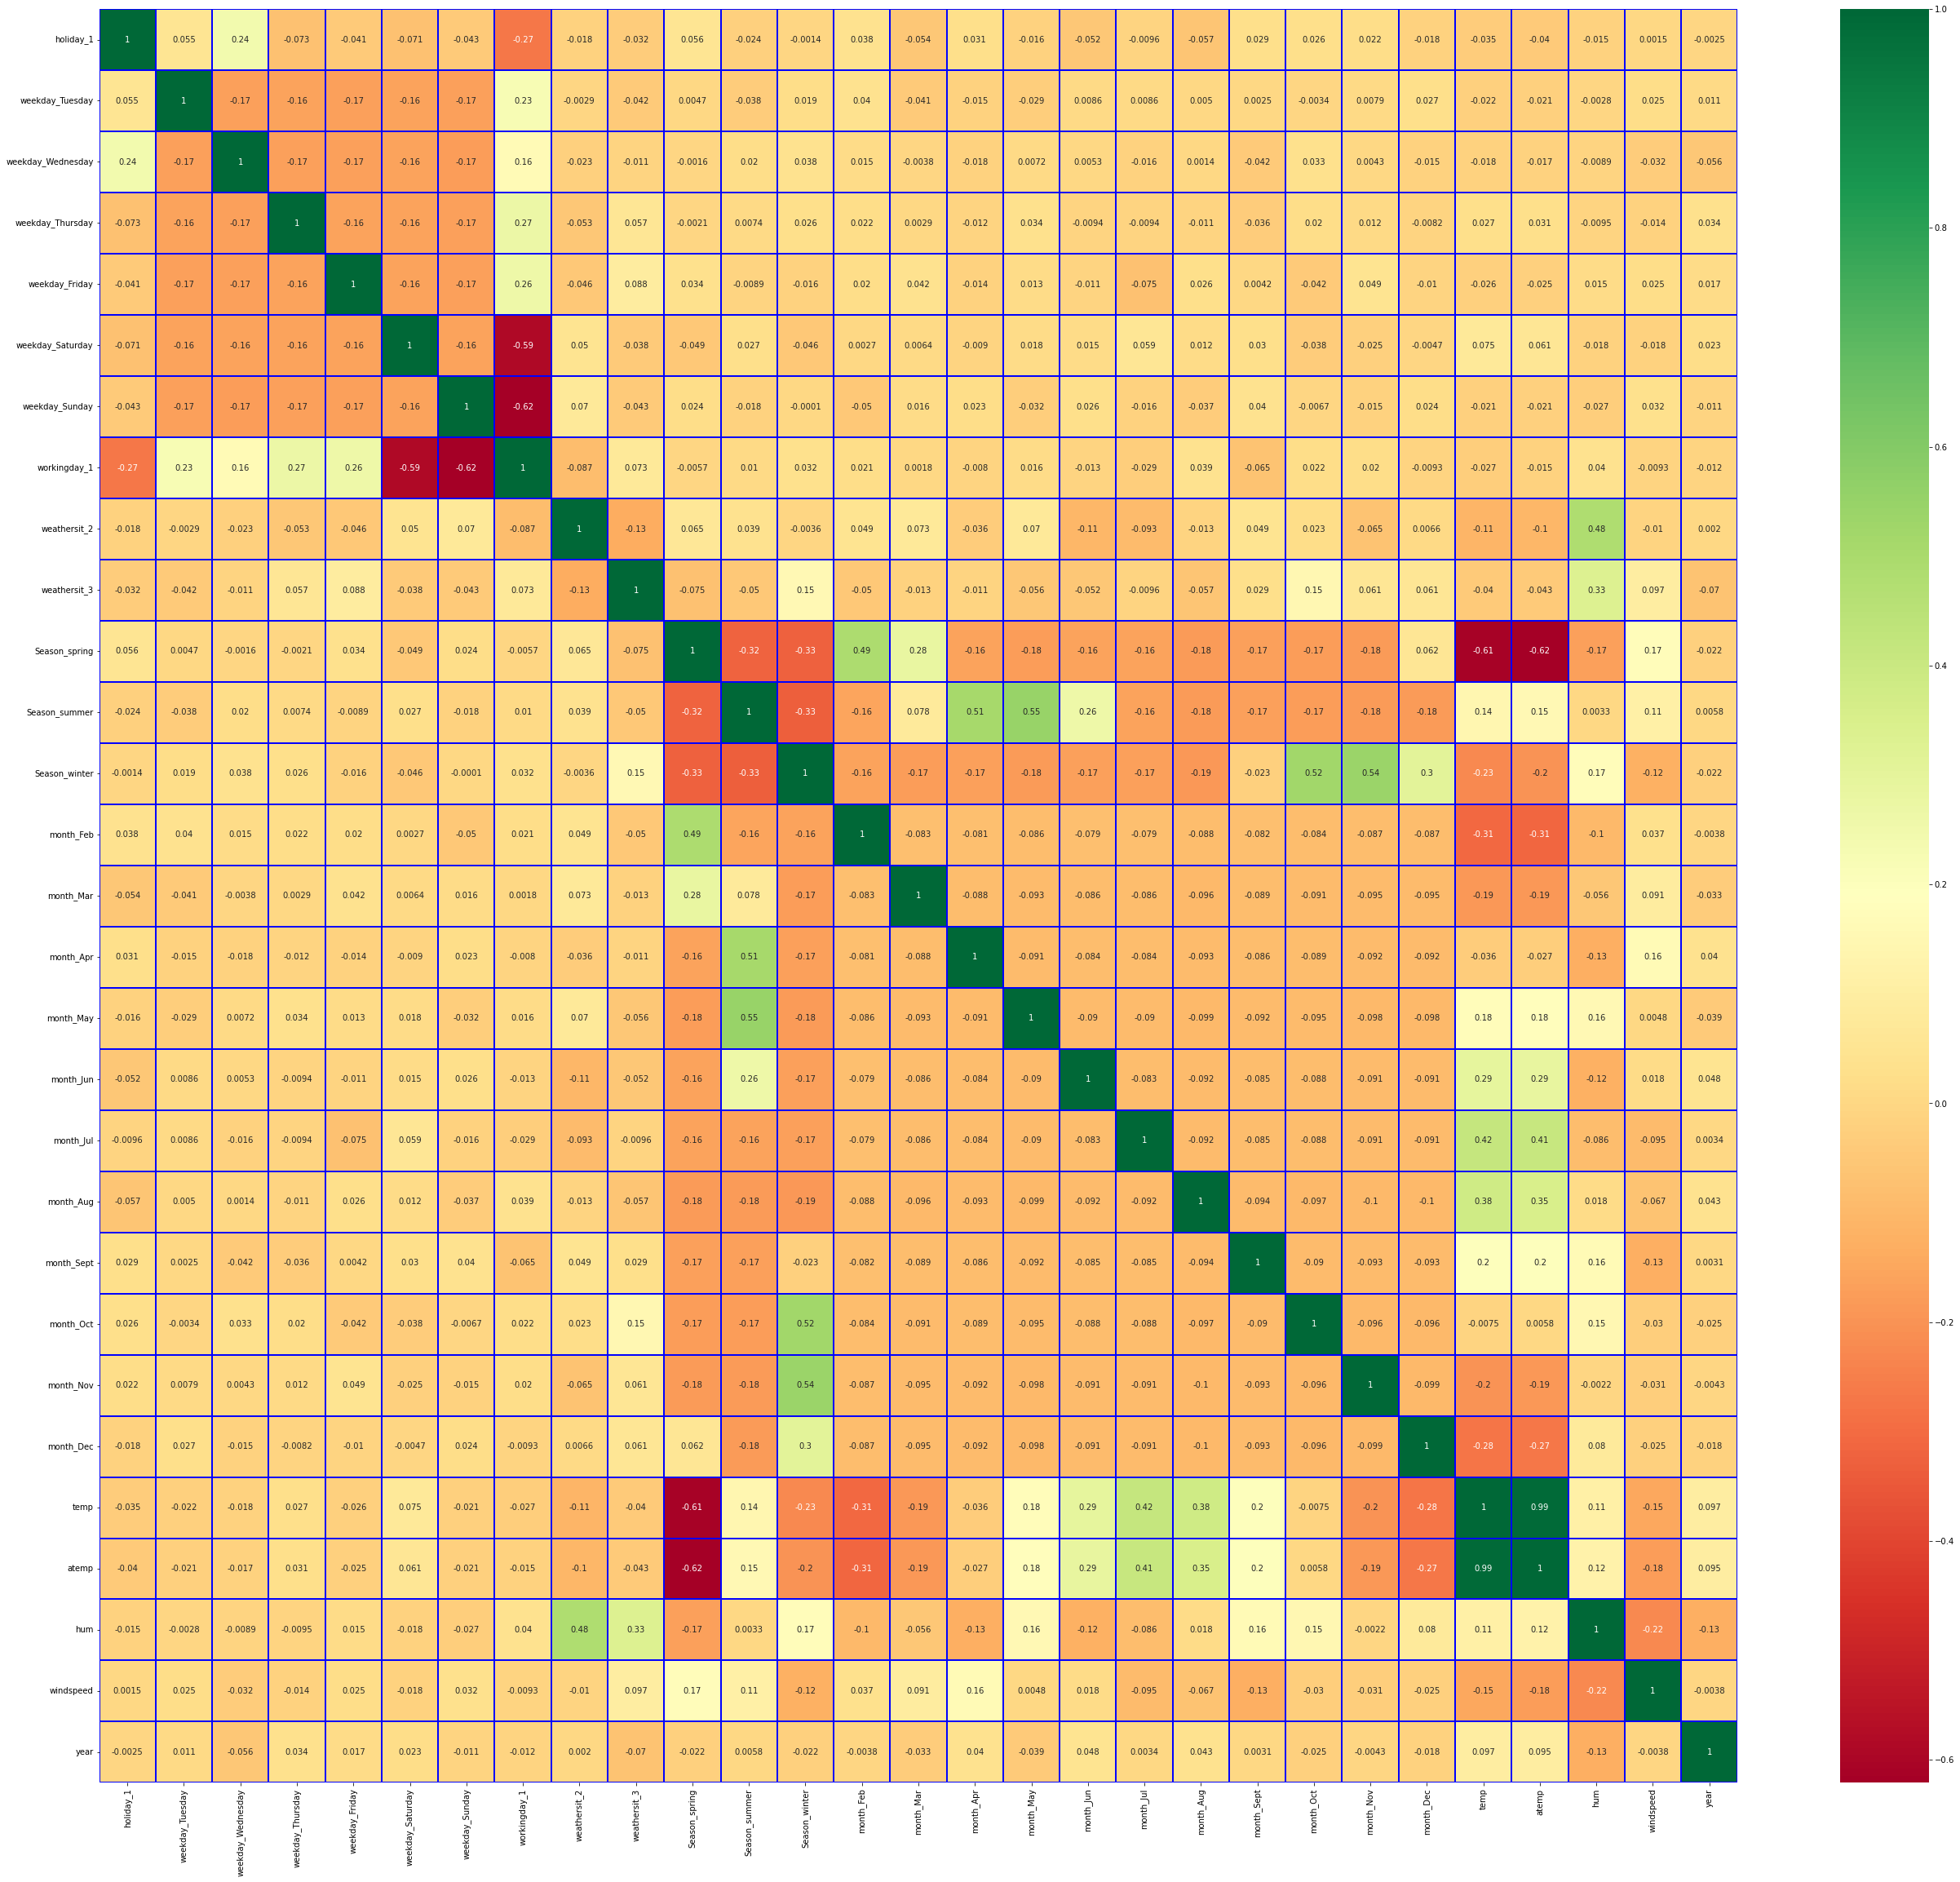

In [150]:
plt.figure(figsize=(45,40))
sns.heatmap(X_train_final.corr(), annot=True,linecolor='blue',linewidth=1.5,cmap='RdYlGn')
plt.show()

#### Test Data Preprocessing

In [151]:
X_test.head()

holiday   weekday workingday weathersit       temp     atemp      hum  \
241       0  Thursday          1          1  26.205847  29.73520  54.8333   
496       0    Sunday          0          1  23.130847  27.24085  48.0417   
449       0   Tuesday          1          1  18.279153  21.93750  47.7917   
594       0    Sunday          0          1  27.811653  30.90355  60.3333   
151       0    Friday          1          2  31.330847  36.04835  67.7083   

     windspeed  Season  year month  
241   8.375536    fall     0   Aug  
496   8.249911  summer     1   May  
449  26.000000  summer     1   Mar  
594  11.917089    fall     1   Aug  
151  13.875164  summer     0   Jun

In [152]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 241 to 425
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   holiday     219 non-null    object  
 1   weekday     219 non-null    category
 2   workingday  219 non-null    object  
 3   weathersit  219 non-null    object  
 4   temp        219 non-null    float64 
 5   atemp       219 non-null    float64 
 6   hum         219 non-null    float64 
 7   windspeed   219 non-null    float64 
 8   Season      219 non-null    object  
 9   year        219 non-null    int64   
 10  month       219 non-null    category
dtypes: category(2), float64(4), int64(1), object(4)
memory usage: 18.3+ KB


In [153]:
X_test_num = X_test[['temp','atemp','hum','windspeed','year']]

In [154]:
X_test_already_encoded = X_test[['year']]

In [155]:
X_test_cat = X_test.select_dtypes(include=['object','category'])

In [156]:
X_test_cat

holiday    weekday workingday weathersit  Season month
241       0   Thursday          1          1    fall   Aug
496       0     Sunday          0          1  summer   May
449       0    Tuesday          1          1  summer   Mar
594       0     Sunday          0          1    fall   Aug
151       0     Friday          1          2  summer   Jun
..      ...        ...        ...        ...     ...   ...
418       0   Saturday          0          1  spring   Feb
74        0     Friday          1          2  spring   Mar
583       0  Wednesday          1          2    fall   Aug
570       0   Thursday          1          1    fall   Jul
425       0   Saturday          0          2  spring   Mar

[219 rows x 6 columns]

In [157]:
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns)

In [158]:
X_test_num_scaled_df

temp     atemp       hum  windspeed  year
0    0.722754  0.689995  0.409512   0.239197   0.0
1    0.629300  0.623239  0.314965   0.233774   1.0
2    0.481850  0.481306  0.311485   1.000000   1.0
3    0.771557  0.721264  0.486078   0.392077   1.0
4    0.878510  0.858954  0.588746   0.476602   0.0
..        ...       ...       ...        ...   ...
214  0.492235  0.488928  0.418213   0.429809   1.0
215  0.381399  0.385200  0.727177   0.465106   0.0
216  0.843205  0.827713  0.625870   0.215770   1.0
217  0.828668  0.769414  0.272621   0.354284   1.0
218  0.366591  0.375715  0.560904   0.296741   1.0

[219 rows x 5 columns]

In [159]:
X_test_already_encoded.index

Int64Index([241, 496, 449, 594, 151, 578, 197, 637, 511, 199,
            ...
            237, 406, 292, 274, 129, 418,  74, 583, 570, 425],
           dtype='int64', length=219)

In [160]:
X_test_cat_dummy = pd.get_dummies(X_test_cat, drop_first=True)

In [161]:
X_test_cat_dummy.index

Int64Index([241, 496, 449, 594, 151, 578, 197, 637, 511, 199,
            ...
            237, 406, 292, 274, 129, 418,  74, 583, 570, 425],
           dtype='int64', length=219)

In [162]:
X_test_cat_dummy.index = X_test_num_scaled_df.index

In [163]:
X_test_final = pd.concat([X_test_cat_dummy, X_test_num_scaled_df], axis=1)

In [164]:
X_test_final

holiday_1  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0            0                0                  0                 1   
1            0                0                  0                 0   
2            0                1                  0                 0   
3            0                0                  0                 0   
4            0                0                  0                 0   
..         ...              ...                ...               ...   
214          0                0                  0                 0   
215          0                0                  0                 0   
216          0                0                  1                 0   
217          0                0                  0                 1   
218          0                0                  0                 0   

     weekday_Friday  weekday_Saturday  weekday_Sunday  workingday_1  \
0                 0                 0               0             1   
1                 0                 0               1             0   
2                 0                 0               0             1   
3                 0                 0               1             0   
4                 1                 0               0             1   
..              ...               ...             ...           ...   
214               0                 1               0             0   
215               1                 0               0             1   
216               0                 0               0             1   
217               0                 0               0             1   
218               0                 1               0             0   

     weathersit_2  weathersit_3  ...  month_Aug  month_Sept  month_Oct  \
0               0             0  ...          1           0          0   
1               0             0  ...          0           0          0   
2               0             0  ...          0           0          0   
3               0             0  ...          1           0          0   
4               1             0  ...          0           0          0   
..            ...           ...  ...        ...         ...        ...   
214             0             0  ...          0           0          0   
215             1             0  ...          0           0          0   
216             1             0  ...          1           0          0   
217             0             0  ...          0           0          0   
218             1             0  ...          0           0          0   

     month_Nov  month_Dec      temp     atemp       hum  windspeed  year  
0            0          0  0.722754  0.689995  0.409512   0.239197   0.0  
1            0          0  0.629300  0.623239  0.314965   0.233774   1.0  
2            0          0  0.481850  0.481306  0.311485   1.000000   1.0  
3            0          0  0.771557  0.721264  0.486078   0.392077   1.0  
4            0          0  0.878510  0.858954  0.588746   0.476602   0.0  
..         ...        ...       ...       ...       ...        ...   ...  
214          0          0  0.492235  0.488928  0.418213   0.429809   1.0  
215          0          0  0.381399  0.385200  0.727177   0.465106   0.0  
216          0          0  0.843205  0.827713  0.625870   0.215770   1.0  
217          0          0  0.828668  0.769414  0.272621   0.354284   1.0  
218          0          0  0.366591  0.375715  0.560904   0.296741   1.0  

[219 rows x 29 columns]

In [165]:
X_test_final['year'] = pd.to_numeric(X_test_final['year'], errors='coerce')

## Modelling

In [166]:
import statsmodels.api as sm

In [167]:
X_train_const = sm.add_constant(X_train_final)

In [168]:
# x=X_train_final.drop(['year'], axis=1)

In [169]:
X_train_const.head()

const  holiday_1  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0    1.0          0                0                  0                 0   
1    1.0          0                0                  0                 0   
2    1.0          0                1                  0                 0   
3    1.0          0                0                  0                 0   
4    1.0          0                0                  0                 1   

   weekday_Friday  weekday_Saturday  weekday_Sunday  workingday_1  \
0               0                 0               0             1   
1               0                 1               0             0   
2               0                 0               0             1   
3               0                 0               1             0   
4               0                 0               0             1   

   weathersit_2  ...  month_Aug  month_Sept  month_Oct  month_Nov  month_Dec  \
0             0  ...          0           0          0          0          1   
1             0  ...          0           0          0          0          0   
2             1  ...          0           0          0          0          0   
3             0  ...          0           1          0          0          0   
4             0  ...          0           0          0          0          0   

       temp     atemp       hum  windspeed  year  
0  0.245101  0.204242  0.319025   0.892104   1.0  
1  0.496388  0.499889  0.204176   0.883077   1.0  
2  0.651106  0.632534  0.774941   0.433459   0.0  
3  0.736253  0.711117  0.546404   0.697831   1.0  
4  0.901354  0.858965  0.470417   0.206816   1.0  

[5 rows x 30 columns]

In [170]:
type(X_train_const)

pandas.core.frame.DataFrame

In [171]:
type(y_train)

pandas.core.series.Series

In [172]:
X_train_const.shape

(509, 30)

In [173]:
y_train.shape

(509,)

In [174]:
X_train_const.index

RangeIndex(start=0, stop=509, step=1)

In [175]:
y_train.index

Int64Index([728, 481, 113, 629, 535, 507, 235, 643, 262, 226,
            ...
            318, 230, 657, 282, 528, 580,  54, 352,  81, 522],
           dtype='int64', length=509)

In [176]:
y_train.index = X_train_const.index

In [177]:
y_train.index

RangeIndex(start=0, stop=509, step=1)

In [178]:
y_train

0      1796
1      6233
2      4191
3      8395
4      6211
       ... 
504    6824
505    1807
506    3403
507    2121
508    7494
Name: cnt, Length: 509, dtype: int64

In [179]:
X_train_const.dtypes

const                float64
holiday_1              uint8
weekday_Tuesday        uint8
weekday_Wednesday      uint8
weekday_Thursday       uint8
weekday_Friday         uint8
weekday_Saturday       uint8
weekday_Sunday         uint8
workingday_1           uint8
weathersit_2           uint8
weathersit_3           uint8
Season_spring          uint8
Season_summer          uint8
Season_winter          uint8
month_Feb              uint8
month_Mar              uint8
month_Apr              uint8
month_May              uint8
month_Jun              uint8
month_Jul              uint8
month_Aug              uint8
month_Sept             uint8
month_Oct              uint8
month_Nov              uint8
month_Dec              uint8
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
year                 float64
dtype: object

In [180]:
y_train.dtypes

dtype('int64')

#### OLS_1 - 1st Model

In [181]:
ols_1 = sm.OLS(y_train, X_train_const).fit()

In [182]:
print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     97.61
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          9.38e-181
Time:                        22:26:19   Log-Likelihood:                -4085.4
No. Observations:                 509   AIC:                             8231.
Df Residuals:                     479   BIC:                             8358.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2327.1999    870.05

- Observation :
    - R-squared -> 85.5% 
    - Adjusted R-Squared -> 84.7% : The model explains 84.7% of the variability of the dataset
    - there are few predictors whose p-values are greater tan 0.05. We can tell them as insignificant variables and remove from the feature list. After that we can rebuild a model.
    - These featres are: ['atemp', 'holiday_1', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday', 'workingday_1', 'Season_summer', 'month_Feb', 'month_Apr', 'month_May', 'month_Jun', 'month_Jul', 'month_Aug', 'month_Oct', 'month_Nov', 'month_Dec']
    - We can run Residual Feature Elimination (RFE) and then check which all features are being important.
    - We can see that year_2019 is a significant predictor but this predictor won't be available for some other year.

## </h> Manual Elimination
---------------------------------------

In [183]:
X_train_manual = X_train_final.drop(['atemp', 'holiday_1', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday', 'workingday_1', 'Season_summer', 'month_Feb', 'month_Apr', 'month_May', 'month_Jun', 'month_Jul', 'month_Aug', 'month_Oct', 'month_Nov', 'month_Dec']
                                   , axis=1)

In [184]:
X_train_manual

weathersit_2  weathersit_3  Season_spring  Season_winter  month_Mar  \
0               0             0              1              0          0   
1               0             0              0              0          0   
2               1             0              0              0          0   
3               0             0              0              0          0   
4               0             0              0              0          0   
..            ...           ...            ...            ...        ...   
504             0             0              0              0          0   
505             1             0              1              0          0   
506             0             0              0              1          0   
507             1             0              0              0          1   
508             0             0              0              0          0   

     month_Sept      temp       hum  windspeed  year  
0             0  0.245101  0.319025   0.892104   1.0  
1             0  0.496388  0.204176   0.883077   1.0  
2             0  0.651106  0.774941   0.433459   0.0  
3             1  0.736253  0.546404   0.697831   1.0  
4             0  0.901354  0.470417   0.206816   1.0  
..          ...       ...       ...        ...   ...  
504           0  0.914852  0.499999   0.622272   1.0  
505           0  0.294718  0.617017   0.602136   0.0  
506           0  0.271061  0.533642   0.377700   0.0  
507           0  0.358646  0.814940   0.555181   0.0  
508           0  0.677065  0.435614   0.332737   1.0  

[509 rows x 10 columns]

- Now we have only 10 columns which came out to be significant
- Let's build a new model and check its performance

In [185]:
X_train_manual_const = sm.add_constant(X_train_manual)

In [186]:
X_train_manual_const.head()

const  weathersit_2  weathersit_3  Season_spring  Season_winter  month_Mar  \
0    1.0             0             0              1              0          0   
1    1.0             0             0              0              0          0   
2    1.0             1             0              0              0          0   
3    1.0             0             0              0              0          0   
4    1.0             0             0              0              0          0   

   month_Sept      temp       hum  windspeed  year  
0           0  0.245101  0.319025   0.892104   1.0  
1           0  0.496388  0.204176   0.883077   1.0  
2           0  0.651106  0.774941   0.433459   0.0  
3           1  0.736253  0.546404   0.697831   1.0  
4           0  0.901354  0.470417   0.206816   1.0

#### OLS_2 - 2nd Model

In [187]:
ols_2 = sm.OLS(y_train, X_train_manual_const).fit()

In [188]:
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     254.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.86e-188
Time:                        22:26:19   Log-Likelihood:                -4116.8
No. Observations:                 509   AIC:                             8256.
Df Residuals:                     498   BIC:                             8302.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2618.0754    227.916     11.487

- Observation:
--------------------
    - Here we can see that, all the leftout variables are significant, though AIC has been increased little(8256) than previous model(8231).
    - R-squared and adjusted R-squared metrics have been reduced a little than that of previous model.
    - Adjusted R-squared value:- 83.3% i.e, the model is able to explain 83.3% variability of the whole data.

### </h> VIF for these features :
------------------------------------------------
### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [190]:
vif_1 = pd.DataFrame()
vif_1['Features'] = X_train_manual.columns
vif_1['VIF'] = [variance_inflation_factor(X_train_manual.values, i) for i in range(X_train_manual.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

Features    VIF
7            hum  13.35
6           temp   9.45
8      windspeed   4.18
0   weathersit_2   2.57
2  Season_spring   2.22
9           year   2.07
3  Season_winter   1.82
1   weathersit_3   1.40
4      month_Mar   1.20
5     month_Sept   1.17

In [191]:
#X_train_manual.shape

In [192]:
#range(X_train_manual.shape[1])

In [193]:
#print(variance_inflation_factor(X_train_manual.values,0))
#print(variance_inflation_factor(X_train_manual.values,1))
#print(variance_inflation_factor(X_train_manual.values,2))

- Observation:
    - We can see that humidity (hum) has high VIF which means that it is showing multi-collinearity wit other predictor variables.
    - Temparature comes as the second rank in VIF table. We can say that , in any day if there is high temparature then there might be a humid weather .
    - Also in Winter season and Spring Season as well as in September month the weather can be umid. 
    - Moreover if we check the weather situation 3 , then we can notice the weather situation as below:
    
        Weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
        
     - In that case, we can say that, temparature, season_winter, season_spring and humidity are correlated among themselves. Let's look into thir correlation matrix in order to get clarity.
    

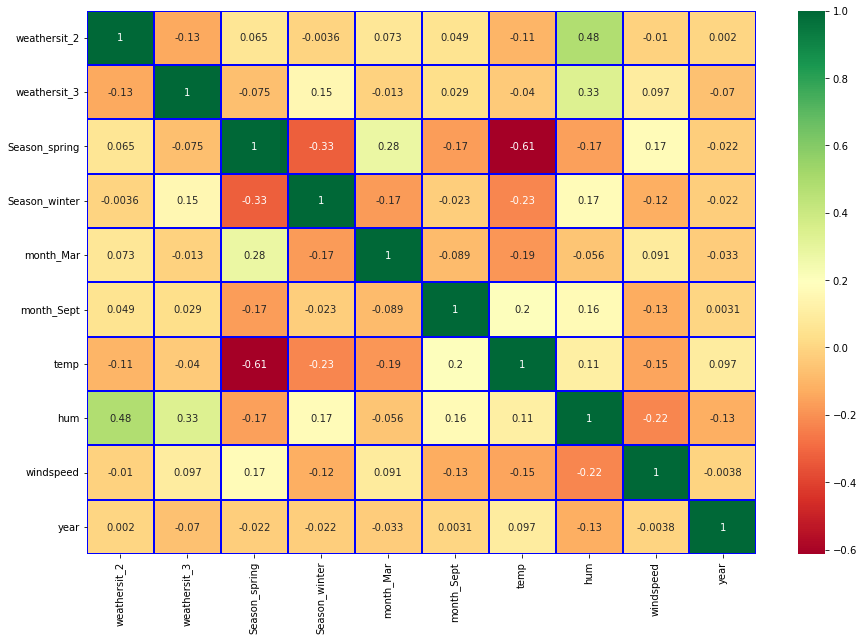

In [194]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_manual.corr(), annot=True, linecolor='blue',linewidth=1.5,cmap='RdYlGn')
plt.show()

In [195]:
## Checking correlation for Humidity with other predictors

X_train_manual.corr()['hum'].sort_values(ascending=False)

hum              1.000000
weathersit_2     0.481731
weathersit_3     0.334815
Season_winter    0.172086
month_Sept       0.162484
temp             0.108310
month_Mar       -0.055737
year            -0.127141
Season_spring   -0.165673
windspeed       -0.223491
Name: hum, dtype: float64

In [196]:
## Checking correlation for temparature with other predictors

X_train_manual.corr()['temp'].sort_values(ascending=False)

temp             1.000000
month_Sept       0.200602
hum              0.108310
year             0.096985
weathersit_3    -0.039508
weathersit_2    -0.108310
windspeed       -0.149249
month_Mar       -0.187846
Season_winter   -0.225816
Season_spring   -0.613818
Name: temp, dtype: float64

- Observation:
    - As it was expected, hum is highly correlated with few other independent variables whereas temp doesn't have very high positive correlation but it has some sort of negative correlation but the association is not too high except season_spring
    - So, as of now, dropping the 'hum' variable to check if the VIF of other independent variables change themselves and if any significant cange is noticed in the performance of the model

In [197]:
X_train_manual_const_2 = X_train_manual_const.drop(['hum'], axis = 1)

In [198]:
X_train_manual_const_2.columns

Index(['const', 'weathersit_2', 'weathersit_3', 'Season_spring',
       'Season_winter', 'month_Mar', 'month_Sept', 'temp', 'windspeed',
       'year'],
      dtype='object')

#### OLS_3 - 3rd Model

In [199]:
ols_3 = sm.OLS(y_train, X_train_manual_const_2).fit()

In [200]:
print(ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          3.50e-186
Time:                        22:26:19   Log-Likelihood:                -4125.1
No. Observations:                 509   AIC:                             8270.
Df Residuals:                     499   BIC:                             8313.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2201.4804    206.599     10.656

- Observation:
    - The model can explain 82.8% of the variablity of the data. All the predictor variables are significant.

In [201]:
X_train_manual_less_humid = X_train_manual.drop('hum', axis=1)
X_train_manual_less_humid

weathersit_2  weathersit_3  Season_spring  Season_winter  month_Mar  \
0               0             0              1              0          0   
1               0             0              0              0          0   
2               1             0              0              0          0   
3               0             0              0              0          0   
4               0             0              0              0          0   
..            ...           ...            ...            ...        ...   
504             0             0              0              0          0   
505             1             0              1              0          0   
506             0             0              0              1          0   
507             1             0              0              0          1   
508             0             0              0              0          0   

     month_Sept      temp  windspeed  year  
0             0  0.245101   0.892104   1.0  
1             0  0.496388   0.883077   1.0  
2             0  0.651106   0.433459   0.0  
3             1  0.736253   0.697831   1.0  
4             0  0.901354   0.206816   1.0  
..          ...       ...        ...   ...  
504           0  0.914852   0.622272   1.0  
505           0  0.294718   0.602136   0.0  
506           0  0.271061   0.377700   0.0  
507           0  0.358646   0.555181   0.0  
508           0  0.677065   0.332737   1.0  

[509 rows x 9 columns]

In [202]:
vif_2 = pd.DataFrame()
vif_2['Features'] = X_train_manual_less_humid.columns
vif_2['VIF'] = [variance_inflation_factor(X_train_manual_less_humid.values, i) for i in range(X_train_manual_less_humid.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF", ascending = False)
vif_2

Features   VIF
7      windspeed  4.16
6           temp  3.92
8           year  2.05
2  Season_spring  1.76
0   weathersit_2  1.56
3  Season_winter  1.37
4      month_Mar  1.20
5     month_Sept  1.16
1   weathersit_3  1.10

In [203]:
X_train_manual_less_humid.corr()['windspeed'].sort_values(ascending=False)

windspeed        1.000000
Season_spring    0.172601
weathersit_3     0.096834
month_Mar        0.091395
year            -0.003810
weathersit_2    -0.010399
Season_winter   -0.122903
month_Sept      -0.128892
temp            -0.149249
Name: windspeed, dtype: float64

In [204]:
X_train_manual_less_humid.corr()['Season_spring'].sort_values(ascending=False)

Season_spring    1.000000
month_Mar        0.281065
windspeed        0.172601
weathersit_2     0.064824
year            -0.021533
weathersit_3    -0.075392
month_Sept      -0.167081
Season_winter   -0.328899
temp            -0.613818
Name: Season_spring, dtype: float64

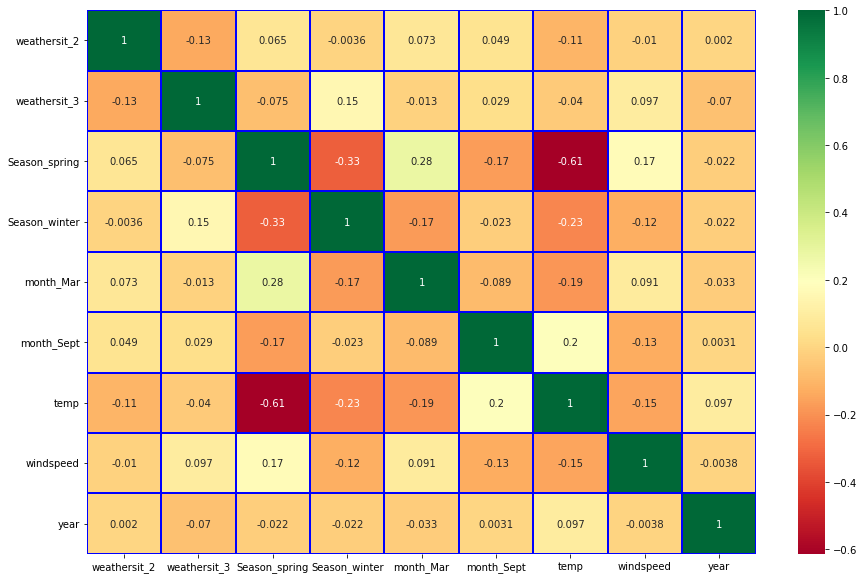

In [205]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_manual_less_humid.corr(), annot=True, linecolor='blue',linewidth=1.5,cmap='RdYlGn')
plt.show()

- We can observe very moderate correlation between 'windspeed' and other predictor variables.
- Also, for windspeed, the VIF value is less than 5. (Assumption: Threshold value of VIF : 5)
- So, we are dropping both the variables gradually to check if there is any change in the performance

In [206]:
X_train_manual_const_3 = X_train_manual_const_2.drop(['windspeed'], axis = 1)

In [207]:
X_train_manual_const_3.columns

Index(['const', 'weathersit_2', 'weathersit_3', 'Season_spring',
       'Season_winter', 'month_Mar', 'month_Sept', 'temp', 'year'],
      dtype='object')

#### OLS_4 - Fourth Model

In [208]:
ols_4 = sm.OLS(y_train, X_train_manual_const_3).fit()

In [209]:
print(ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     294.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.10e-183
Time:                        22:26:20   Log-Likelihood:                -4133.9
No. Observations:                 509   AIC:                             8286.
Df Residuals:                     500   BIC:                             8324.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1826.3286    189.309      9.647

- Observation:
    - This model shows 82.2% variability which is almost very closer to that of the last model(82.8%).
    - It can be turned out to be one of our accepted model

In [210]:
X_train_manual_less_humid_windspeed = X_train_manual_less_humid.drop(['windspeed'], axis=1)

In [211]:
X_train_manual_less_humid_windspeed.columns

Index(['weathersit_2', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_Sept', 'temp', 'year'],
      dtype='object')

In [212]:
vif_3 = pd.DataFrame()
vif_3['Features'] = X_train_manual_less_humid_windspeed.columns
vif_3['VIF'] = [variance_inflation_factor(X_train_manual_less_humid_windspeed.values, i) for i in range(X_train_manual_less_humid_windspeed.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by = "VIF", ascending = False)
vif_3

Features   VIF
6           temp  2.37
7           year  2.04
0   weathersit_2  1.55
2  Season_spring  1.37
3  Season_winter  1.31
4      month_Mar  1.19
5     month_Sept  1.15
1   weathersit_3  1.08

In [213]:
round(ols_4.params,2).sort_values(ascending=False)

temp             3781.10
year             2002.60
const            1826.33
month_Sept        698.81
Season_winter     445.81
month_Mar         439.71
weathersit_2     -666.30
Season_spring   -1154.56
weathersit_3    -2621.11
dtype: float64

- Observation:
    - This model's predictor variables are very much significant and VIF scores are also quite lower than the threshold value.
    - Also, the model variability is 82.2%.
    - So , we can take this model as our final model.
    
- The Model Equation will be: 


    cnt = 3781.10 * temp + (-666.30) * weathersit_2 + (-2621.11) * weathersit_3 + (-1154.56) * Season_spring + 445.81 * Season_winter + 2002.60 * year_2019 + 439.71 * month_Mar + 698.81 * month_Sept + 1826.33

#### Let's remove the year variable from the features and ceck for its impact on the rebuilt model.

### Predicting Train and Test set

In [214]:
y_train

0      1796
1      6233
2      4191
3      8395
4      6211
       ... 
504    6824
505    1807
506    3403
507    2121
508    7494
Name: cnt, Length: 509, dtype: int64

- Predicting Train Set

In [215]:
y_train_hat = ols_4.predict(X_train_manual_const_3)

In [216]:
round(y_train_hat,2)

0      3601.12
1      5705.82
2      3621.92
3      7311.58
4      7237.04
        ...   
504    7288.08
505    1119.82
506    3297.05
507    2955.82
508    6388.98
Length: 509, dtype: float64

In [217]:
type(y_train_hat)

pandas.core.series.Series

In [218]:
## Error Terms

error = y_train - y_train_hat

In [219]:
concat_train_pred_df = pd.DataFrame({
    'Actual Value': y_train,
    'Predicted Value': y_train_hat,
    'Error': error})

- Train set and its prediction and its error

In [220]:
concat_train_pred_df

Actual Value  Predicted Value        Error
0            1796      3601.120363 -1805.120363
1            6233      5705.822073   527.177927
2            4191      3621.923267   569.076733
3            8395      7311.581779  1083.418221
4            6211      7237.036917 -1026.036917
..            ...              ...          ...
504          6824      7288.075842  -464.075842
505          1807      1119.821836   687.178164
506          3403      3297.048338   105.951662
507          2121      2955.818161  -834.818161
508          7494      6388.979465  1105.020535

[509 rows x 3 columns]

- Predicting Test Set

In [221]:
y_test

241    5204
496    7429
449    5558
594    7865
151    3974
       ... 
418    5062
74     2192
583    7273
570    8173
425    3194
Name: cnt, Length: 219, dtype: int64

In [222]:
X_test_final

holiday_1  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0            0                0                  0                 1   
1            0                0                  0                 0   
2            0                1                  0                 0   
3            0                0                  0                 0   
4            0                0                  0                 0   
..         ...              ...                ...               ...   
214          0                0                  0                 0   
215          0                0                  0                 0   
216          0                0                  1                 0   
217          0                0                  0                 1   
218          0                0                  0                 0   

     weekday_Friday  weekday_Saturday  weekday_Sunday  workingday_1  \
0                 0                 0               0             1   
1                 0                 0               1             0   
2                 0                 0               0             1   
3                 0                 0               1             0   
4                 1                 0               0             1   
..              ...               ...             ...           ...   
214               0                 1               0             0   
215               1                 0               0             1   
216               0                 0               0             1   
217               0                 0               0             1   
218               0                 1               0             0   

     weathersit_2  weathersit_3  ...  month_Aug  month_Sept  month_Oct  \
0               0             0  ...          1           0          0   
1               0             0  ...          0           0          0   
2               0             0  ...          0           0          0   
3               0             0  ...          1           0          0   
4               1             0  ...          0           0          0   
..            ...           ...  ...        ...         ...        ...   
214             0             0  ...          0           0          0   
215             1             0  ...          0           0          0   
216             1             0  ...          1           0          0   
217             0             0  ...          0           0          0   
218             1             0  ...          0           0          0   

     month_Nov  month_Dec      temp     atemp       hum  windspeed  year  
0            0          0  0.722754  0.689995  0.409512   0.239197   0.0  
1            0          0  0.629300  0.623239  0.314965   0.233774   1.0  
2            0          0  0.481850  0.481306  0.311485   1.000000   1.0  
3            0          0  0.771557  0.721264  0.486078   0.392077   1.0  
4            0          0  0.878510  0.858954  0.588746   0.476602   0.0  
..         ...        ...       ...       ...       ...        ...   ...  
214          0          0  0.492235  0.488928  0.418213   0.429809   1.0  
215          0          0  0.381399  0.385200  0.727177   0.465106   0.0  
216          0          0  0.843205  0.827713  0.625870   0.215770   1.0  
217          0          0  0.828668  0.769414  0.272621   0.354284   1.0  
218          0          0  0.366591  0.375715  0.560904   0.296741   1.0  

[219 rows x 29 columns]

In [223]:
X_train_manual_less_humid_windspeed.columns

Index(['weathersit_2', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_Sept', 'temp', 'year'],
      dtype='object')

In [224]:
common_columns = X_train_manual_less_humid_windspeed.columns.intersection(X_test_final.columns)

In [225]:
common_columns

Index(['weathersit_2', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_Sept', 'temp', 'year'],
      dtype='object')

In [226]:
X_test_lm = X_test_final[common_columns]

In [227]:
X_test_lm

weathersit_2  weathersit_3  Season_spring  Season_winter  month_Mar  \
0               0             0              0              0          0   
1               0             0              0              0          0   
2               0             0              0              0          1   
3               0             0              0              0          0   
4               1             0              0              0          0   
..            ...           ...            ...            ...        ...   
214             0             0              1              0          0   
215             1             0              1              0          1   
216             1             0              0              0          0   
217             0             0              0              0          0   
218             1             0              1              0          1   

     month_Sept      temp  year  
0             0  0.722754   0.0  
1             0  0.629300   1.0  
2             0  0.481850   1.0  
3             0  0.771557   1.0  
4             0  0.878510   0.0  
..          ...       ...   ...  
214           0  0.492235   1.0  
215           0  0.381399   0.0  
216           0  0.843205   1.0  
217           0  0.828668   1.0  
218           0  0.366591   1.0  

[219 rows x 8 columns]

In [228]:
X_test_const = sm.add_constant(X_test_lm)

In [229]:
X_test_const.head()

const  weathersit_2  weathersit_3  Season_spring  Season_winter  month_Mar  \
0    1.0             0             0              0              0          0   
1    1.0             0             0              0              0          0   
2    1.0             0             0              0              0          1   
3    1.0             0             0              0              0          0   
4    1.0             1             0              0              0          0   

   month_Sept      temp  year  
0           0  0.722754   0.0  
1           0  0.629300   1.0  
2           0  0.481850   1.0  
3           0  0.771557   1.0  
4           0  0.878510   0.0

In [230]:
X_test_const.shape

(219, 9)

In [231]:
y_test_hat = ols_4.predict(X_test_const)

In [232]:
round(y_test_hat,2)

0      4559.13
1      6208.38
2      6090.57
3      6746.26
4      4481.76
        ...   
214    4535.56
215    1887.29
216    6350.87
217    6962.21
218    3833.90
Length: 219, dtype: float64

In [233]:
y_test

241    5204
496    7429
449    5558
594    7865
151    3974
       ... 
418    5062
74     2192
583    7273
570    8173
425    3194
Name: cnt, Length: 219, dtype: int64

In [234]:
y_test_hat.index = y_test.index

In [235]:
error_test  = y_test - y_test_hat

In [236]:
concat_test_pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_test_hat,
    'Error': error_test})

- Test set and its prediction and its error

In [237]:
concat_test_pred_df

Actual Value  Predicted Value        Error
241          5204      4559.130589   644.869411
496          7429      6208.376208  1220.623792
449          5558      6090.568512  -532.568512
594          7865      6746.261358  1118.738642
151          3974      4481.759296  -507.759296
..            ...              ...          ...
418          5062      4535.557179   526.442821
74           2192      1887.287181   304.712819
583          7273      6350.868520   922.131480
570          8173      6962.205054  1210.794946
425          3194      3833.899434  -639.899434

[219 rows x 3 columns]

### Residual Analysis for Train and Test Set for OLS_4 model

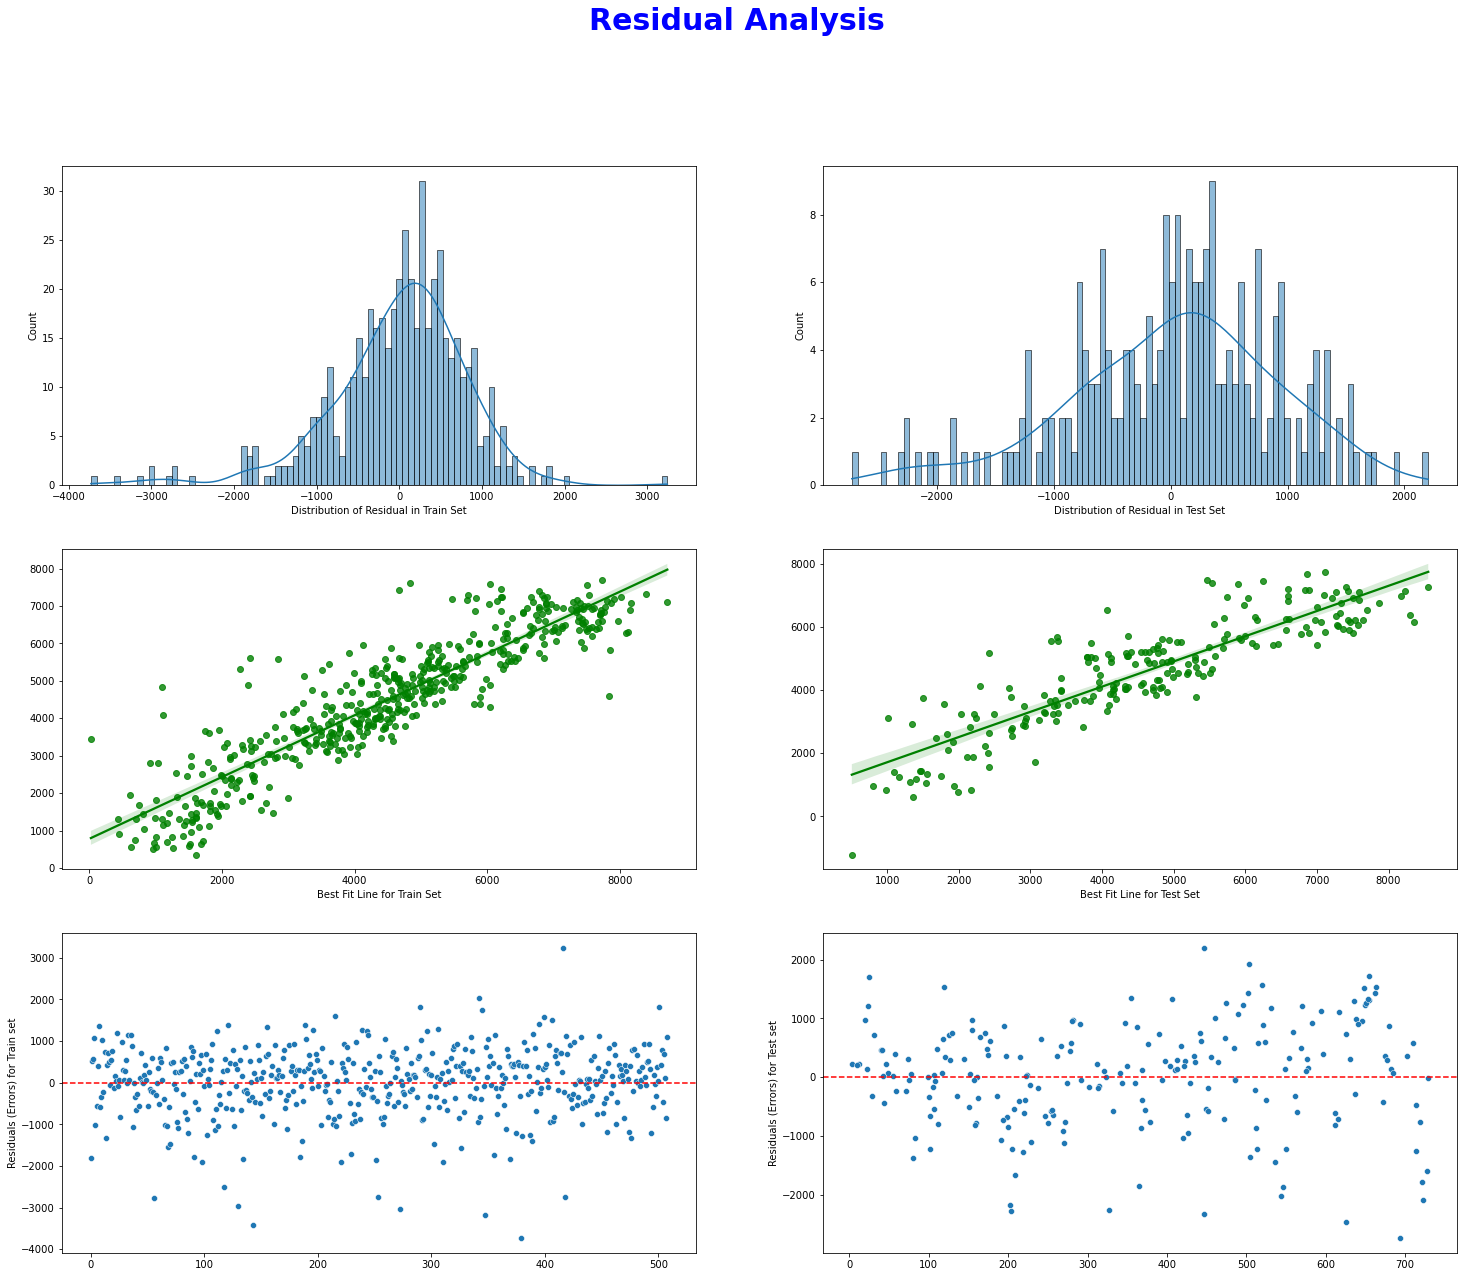

In [238]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))

sns.histplot(x='Error', data=concat_train_pred_df, kde=True, bins=100, ax=axes[0,0])
axes[0,0].set_xlabel('Distribution of Residual in Train Set')

sns.histplot(x='Error', data=concat_test_pred_df, kde=True, bins=100, ax=axes[0,1])
axes[0,1].set_xlabel('Distribution of Residual in Test Set')

sns.regplot(y_train, y_train_hat, color='green', ax=axes[1,0])
axes[1,0].set_xlabel('Best Fit Line for Train Set')

sns.regplot(y_test, y_test_hat, color='green', ax=axes[1,1])
axes[1,1].set_xlabel('Best Fit Line for Test Set')

sns.scatterplot(concat_train_pred_df.index, concat_train_pred_df['Error'], data=concat_train_pred_df, ax=axes[2,0])
axes[2,0].axhline(y=0, color='r', linestyle='--')
axes[2,0].set_ylabel("Residuals (Errors) for Train set")


sns.scatterplot(concat_test_pred_df.index, concat_test_pred_df['Error'], data=concat_test_pred_df, ax=axes[2,1])
axes[2,1].axhline(y=0, color='r', linestyle='--')
axes[2,1].set_ylabel("Residuals (Errors) for Test set")

fig.suptitle("Residual Analysis", fontsize=30, fontweight='bold', color='blue',ha='center',va='center')
plt.show()

- Assumption of Linear Regression after model building:
    - The error term is normally dfistributed
    - The best-fit line for both the train and test set is looking fine
    - The error term is homoscedastic

#### Checking RMSE error 

In [239]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [240]:
print("The train set R2 score: ", round(r2_score(y_train, y_train_hat)*100,2))

The train set R2 score:  82.48


In [241]:
print("The test set R2 score: ", round(r2_score(y_test, y_test_hat)*100,2))

The test set R2 score:  77.54


In [242]:
print("The train set RMSE is: ", np.sqrt(mean_squared_error(y_train, y_train_hat)))

The train set RMSE is:  814.6483766675003


In [243]:
print("The test set RMSE is: ", np.sqrt(mean_squared_error(y_test, y_test_hat)))

The test set RMSE is:  893.1510563243512


- 'Year' column came out to be significant in OLS_4 model. if we keep year there may be a chance in future for the model to be biased , So removing the feature to rerun the model

In [244]:
X_train_manual_const_4 = X_train_manual_const_3.drop(['year'], axis = 1)

In [245]:
X_train_manual_const_3.columns

Index(['const', 'weathersit_2', 'weathersit_3', 'Season_spring',
       'Season_winter', 'month_Mar', 'month_Sept', 'temp', 'year'],
      dtype='object')

#### OLS_5 - Fifth Model

In [246]:
ols_5 = sm.OLS(y_train, X_train_manual_const_4).fit()

In [247]:
print(ols_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     92.95
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.07e-86
Time:                        22:26:21   Log-Likelihood:                -4365.5
No. Observations:                 509   AIC:                             8747.
Df Residuals:                     501   BIC:                             8781.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2383.5408    296.290      8.045

- month_mar came out to be insignificant as its p-value is > 0.05
- The model's overall variability reduced to 55.9%.

### Checking VIF for the columns of ols_5 model

In [248]:
X_train_manual_const_4.columns

Index(['const', 'weathersit_2', 'weathersit_3', 'Season_spring',
       'Season_winter', 'month_Mar', 'month_Sept', 'temp'],
      dtype='object')

In [249]:
X_train_manual_less_humid.columns

Index(['weathersit_2', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_Sept', 'temp', 'windspeed', 'year'],
      dtype='object')

In [250]:
X_train_manual_less_humid_windspeed_year = X_train_manual_less_humid.drop(['windspeed','year'], axis=1)

In [251]:
X_train_manual_less_humid_windspeed_year.columns

Index(['weathersit_2', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_Sept', 'temp'],
      dtype='object')

In [252]:
vif_4 = pd.DataFrame()
vif_4['Features'] = X_train_manual_less_humid_windspeed_year.columns
vif_4['VIF'] = [variance_inflation_factor(X_train_manual_less_humid_windspeed_year.values, i) for i in range(X_train_manual_less_humid_windspeed_year.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by = "VIF", ascending = False)
vif_4

Features   VIF
6           temp  1.67
0   weathersit_2  1.55
2  Season_spring  1.30
3  Season_winter  1.28
4      month_Mar  1.19
5     month_Sept  1.15
1   weathersit_3  1.08

- All the VIF value are below 5 as well as below 2 , so we can think of accepting this model too.

In [253]:
ols_5.params.sort_values(ascending=False)

temp             4506.967431
const            2383.540764
month_Sept        650.598798
Season_winter     566.317298
month_Mar         359.672579
weathersit_2     -650.739913
Season_spring    -932.231967
weathersit_3    -2984.604939
dtype: float64

### Train , test prediction and Residual Analysis of OLS_5 

#### Predicting Train Set

In [254]:
y_train

0      1796
1      6233
2      4191
3      8395
4      6211
       ... 
504    6824
505    1807
506    3403
507    2121
508    7494
Name: cnt, Length: 509, dtype: int64

In [255]:
y_train_pred_ols_5 = ols_5.predict(X_train_manual_const_4)

In [256]:
y_train_pred_ols_5

0      2555.971453
1      4620.745662
2      4667.315535
3      6352.405724
4      6445.914028
          ...     
504    6506.751102
505    2128.851168
506    4171.522433
507    3708.879600
508    5435.051549
Length: 509, dtype: float64

In [257]:
concat_pred_train_ols_5 = pd.DataFrame({'Actual Value': y_train,
                                    'Predicted Value': y_train_pred_ols_5,
                                    'Error': y_train - y_train_pred_ols_5})

#### Predicting Test Set

In [258]:
X_test_final_ols_5 = X_train_manual_less_humid_windspeed_year.columns.intersection(X_test_final.columns)

In [259]:
X_test_final_ols_5_df = X_test_final[X_test_final_ols_5]

In [260]:
X_test_final_ols_5_const = sm.add_constant(X_test_final_ols_5_df)

In [261]:
y_test_pred_ols_5 = ols_5.predict(X_test_final_ols_5_const)

In [262]:
y_test_pred_ols_5

0      5640.969852
1      5219.777152
2      4914.897505
3      5860.922295
4      5692.217772
          ...     
214    3669.795892
215    2879.194016
216    5533.096786
217    6118.321578
218    2812.454629
Length: 219, dtype: float64

In [263]:
y_test

241    5204
496    7429
449    5558
594    7865
151    3974
       ... 
418    5062
74     2192
583    7273
570    8173
425    3194
Name: cnt, Length: 219, dtype: int64

In [264]:
y_test.index = y_test_pred_ols_5.index

In [265]:
concat_pred_test_ols_5 = pd.DataFrame({'Actual Value': y_test,
                                    'Predicted Value': y_test_pred_ols_5,
                                    'Error': y_test - y_test_pred_ols_5})

In [266]:
concat_pred_test_ols_5

Actual Value  Predicted Value        Error
0            5204      5640.969852  -436.969852
1            7429      5219.777152  2209.222848
2            5558      4914.897505   643.102495
3            7865      5860.922295  2004.077705
4            3974      5692.217772 -1718.217772
..            ...              ...          ...
214          5062      3669.795892  1392.204108
215          2192      2879.194016  -687.194016
216          7273      5533.096786  1739.903214
217          8173      6118.321578  2054.678422
218          3194      2812.454629   381.545371

[219 rows x 3 columns]

In [267]:
print("The R2 score for train set: ",round(r2_score(y_train,y_train_pred_ols_5)*100,2))
print("The R2 score for test set: ",round(r2_score(y_test, y_test_pred_ols_5)*100,2))
print('\n')
print("The RMSE for train set: ", np.sqrt(mean_squared_error(y_train, y_train_pred_ols_5)))
print("The RMSE for test set: ", np.sqrt(mean_squared_error(y_test, y_test_pred_ols_5)))

The R2 score for train set:  56.5
The R2 score for test set:  43.45


The RMSE for train set:  1283.8101701436515
The RMSE for test set:  1417.2175333561897


### Residual Analysis for OLS_5 model

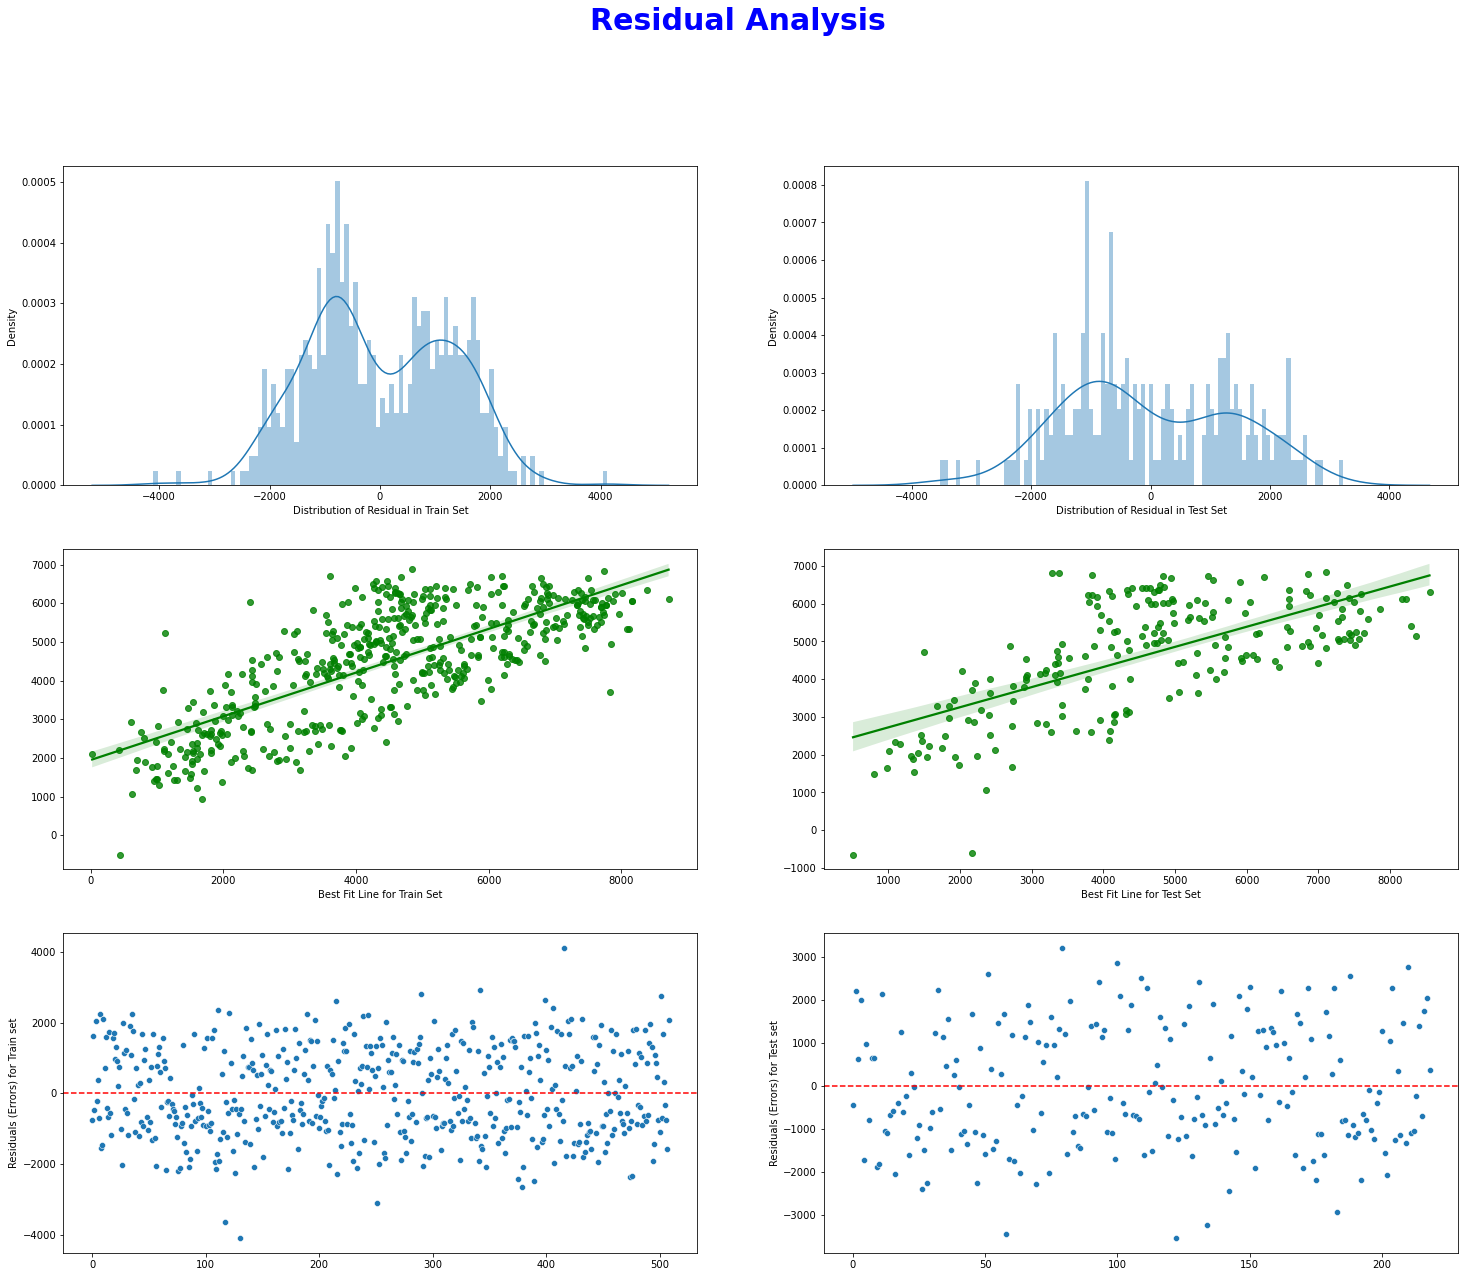

In [268]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))

sns.distplot(concat_pred_train_ols_5['Error'], kde=True, bins=100, ax=axes[0,0])
axes[0,0].set_xlabel('Distribution of Residual in Train Set')

sns.distplot(concat_pred_test_ols_5['Error'], kde=True, bins=100, ax=axes[0,1])
axes[0,1].set_xlabel('Distribution of Residual in Test Set')

sns.regplot(y_train, y_train_pred_ols_5, color='green', ax=axes[1,0])
axes[1,0].set_xlabel('Best Fit Line for Train Set')

sns.regplot(y_test, y_test_pred_ols_5, color='green', ax=axes[1,1])
axes[1,1].set_xlabel('Best Fit Line for Test Set')

sns.scatterplot(concat_pred_train_ols_5.index, concat_pred_train_ols_5['Error'], data=concat_pred_train_ols_5, ax=axes[2,0])
axes[2,0].axhline(y=0, color='r', linestyle='--')
axes[2,0].set_ylabel("Residuals (Errors) for Train set")


sns.scatterplot(concat_pred_test_ols_5.index, concat_pred_test_ols_5['Error'], data=concat_pred_test_ols_5, ax=axes[2,1])
axes[2,1].axhline(y=0, color='r', linestyle='--')
axes[2,1].set_ylabel("Residuals (Errors) for Test set")

fig.suptitle("Residual Analysis", fontsize=30, fontweight='bold', color='blue',ha='center',va='center')
plt.show()

#### As Month March came out to be insignificant , so dropping off that variable from the OLS_5 model's predictors

In [269]:
X_train_manual_less_humid_windspeed_year_mar = X_train_manual_less_humid.drop(['windspeed','year','month_Mar'], axis=1)

In [270]:
X_train_manual_const_5 = X_train_manual_const_4.drop(['month_Mar'], axis=1)

In [271]:
X_train_manual_less_humid_windspeed_year_mar.columns

Index(['weathersit_2', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Sept', 'temp'],
      dtype='object')

In [272]:
X_train_manual_const_5.columns

Index(['const', 'weathersit_2', 'weathersit_3', 'Season_spring',
       'Season_winter', 'month_Sept', 'temp'],
      dtype='object')

In [273]:
X_train_manual_less_humid_windspeed_year_mar.head()

weathersit_2  weathersit_3  Season_spring  Season_winter  month_Sept  \
0             0             0              1              0           0   
1             0             0              0              0           0   
2             1             0              0              0           0   
3             0             0              0              0           1   
4             0             0              0              0           0   

       temp  
0  0.245101  
1  0.496388  
2  0.651106  
3  0.736253  
4  0.901354

### OLS_6 - Sixth Model (Except year and March and previously eliminated variables)

In [274]:
ols_6 = sm.OLS(y_train, X_train_manual_const_5).fit()

In [275]:
print(ols_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     107.6
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           7.20e-87
Time:                        22:26:22   Log-Likelihood:                -4366.8
No. Observations:                 509   AIC:                             8748.
Df Residuals:                     502   BIC:                             8777.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2437.5443    294.942      8.264

- Observation:
    - The Adjusted R-sq is 55.7% which is not too less than that of last model
    - All p-values are < 0.05. So all predictors are significant

In [276]:
vif_5 = pd.DataFrame()
vif_5['Features'] = X_train_manual_less_humid_windspeed_year_mar.columns
vif_5['VIF'] = [variance_inflation_factor(X_train_manual_less_humid_windspeed_year_mar.values, i) 
                for i in range(X_train_manual_less_humid_windspeed_year_mar.shape[1])]
vif_5['VIF'] = round(vif_4['VIF'], 2)
vif_5 = vif_5.sort_values(by = "VIF", ascending = False)
vif_5

Features   VIF
0   weathersit_2  1.55
2  Season_spring  1.30
3  Season_winter  1.28
4     month_Sept  1.19
5           temp  1.15
1   weathersit_3  1.08

In [277]:
round(ols_6.params.sort_values(ascending=False),2)

temp             4456.87
const            2437.54
month_Sept        633.17
Season_winter     530.74
weathersit_2     -639.15
Season_spring    -897.62
weathersit_3    -2969.45
dtype: float64

- Inference: After all these iterations , we can take ols_4 model as our ultimate_model as it can explain the 82.2% variability, all the predictors of this model are significant and all the VIF scores are also under the threshold value.
- But , here we end our manual process. For Automated process, we can first eliminate few features using RFE and after that build up model and thereby check VIF to ensure a good performance from all perspective.
- But before that we can predict train and test set and check the RMSE and R2 score for them.
- Residual Analysis has to be done in order to check if the assumptions of OLS is validated or not.

### Train - Test Prediction and Residual Analysis for OLS_6 model

In [278]:
X_train_manual_less_humid_windspeed_year_mar.columns

Index(['weathersit_2', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Sept', 'temp'],
      dtype='object')

In [279]:
X_train_manual_const_5.columns

Index(['const', 'weathersit_2', 'weathersit_3', 'Season_spring',
       'Season_winter', 'month_Sept', 'temp'],
      dtype='object')

#### Prediction of Train Set

In [280]:
y_train_pred_ols_6 = ols_6.predict(X_train_manual_const_5)

In [281]:
y_train_pred_ols_6

0      2632.307240
1      4649.879145
2      4700.287667
3      6352.091504
4      6454.757870
          ...     
504    6514.918644
505    2214.291422
506    4176.371691
507    3396.832019
508    5455.132730
Length: 509, dtype: float64

In [282]:
y_train

0      1796
1      6233
2      4191
3      8395
4      6211
       ... 
504    6824
505    1807
506    3403
507    2121
508    7494
Name: cnt, Length: 509, dtype: int64

In [283]:
common_columns_for_test_ols_6 = X_train_manual_const_5.columns.intersection(X_test_final.columns)

In [284]:
common_columns_for_test_ols_6

Index(['weathersit_2', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Sept', 'temp'],
      dtype='object')

#### Prediction of Test Set

In [285]:
X_test_final_ols_6 = X_test_final[common_columns_for_test_ols_6]

In [286]:
X_test_final_ols_6_add_const = sm.add_constant(X_test_final_ols_6)

In [287]:
y_test_pred_ols_6 = ols_6.predict(X_test_final_ols_6_add_const)

In [288]:
y_test_pred_ols_6

0      5658.761925
1      5242.251450
2      4585.086776
3      5876.269248
4      5713.796490
          ...     
214    3733.749754
215    2600.618771
216    5556.444386
217    6130.807130
218    2534.621298
Length: 219, dtype: float64

In [289]:
y_test

0      5204
1      7429
2      5558
3      7865
4      3974
       ... 
214    5062
215    2192
216    7273
217    8173
218    3194
Name: cnt, Length: 219, dtype: int64

In [290]:
y_test.index = y_test_pred_ols_6.index

In [291]:
concat_train_pred_df_ols6 = pd.DataFrame({
    'Actual Value': y_train,
    'Predicted Value': y_train_pred_ols_6,
    'Error': y_train - y_train_pred_ols_6})

In [292]:
concat_test_pred_df_ols6 = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_test_pred_ols_6,
    'Error': y_test - y_test_pred_ols_6})

#### R2 score and RMSE

In [293]:
print("The R2 score for train set: ", round(r2_score(y_train,y_train_pred_ols_6)*100,2))
print("The R2 score for test set: ", round(r2_score(y_test,y_test_pred_ols_6)*100,2))
print('\n')
print("The RMSE for train set: ", np.sqrt(mean_squared_error(y_train, y_train_pred_ols_6)))
print("The RMSE for test set: ", np.sqrt(mean_squared_error(y_test, y_test_pred_ols_6)))

The R2 score for train set:  56.26
The R2 score for test set:  43.08


The RMSE for train set:  1287.2425998449214
The RMSE for test set:  1421.8737905440055


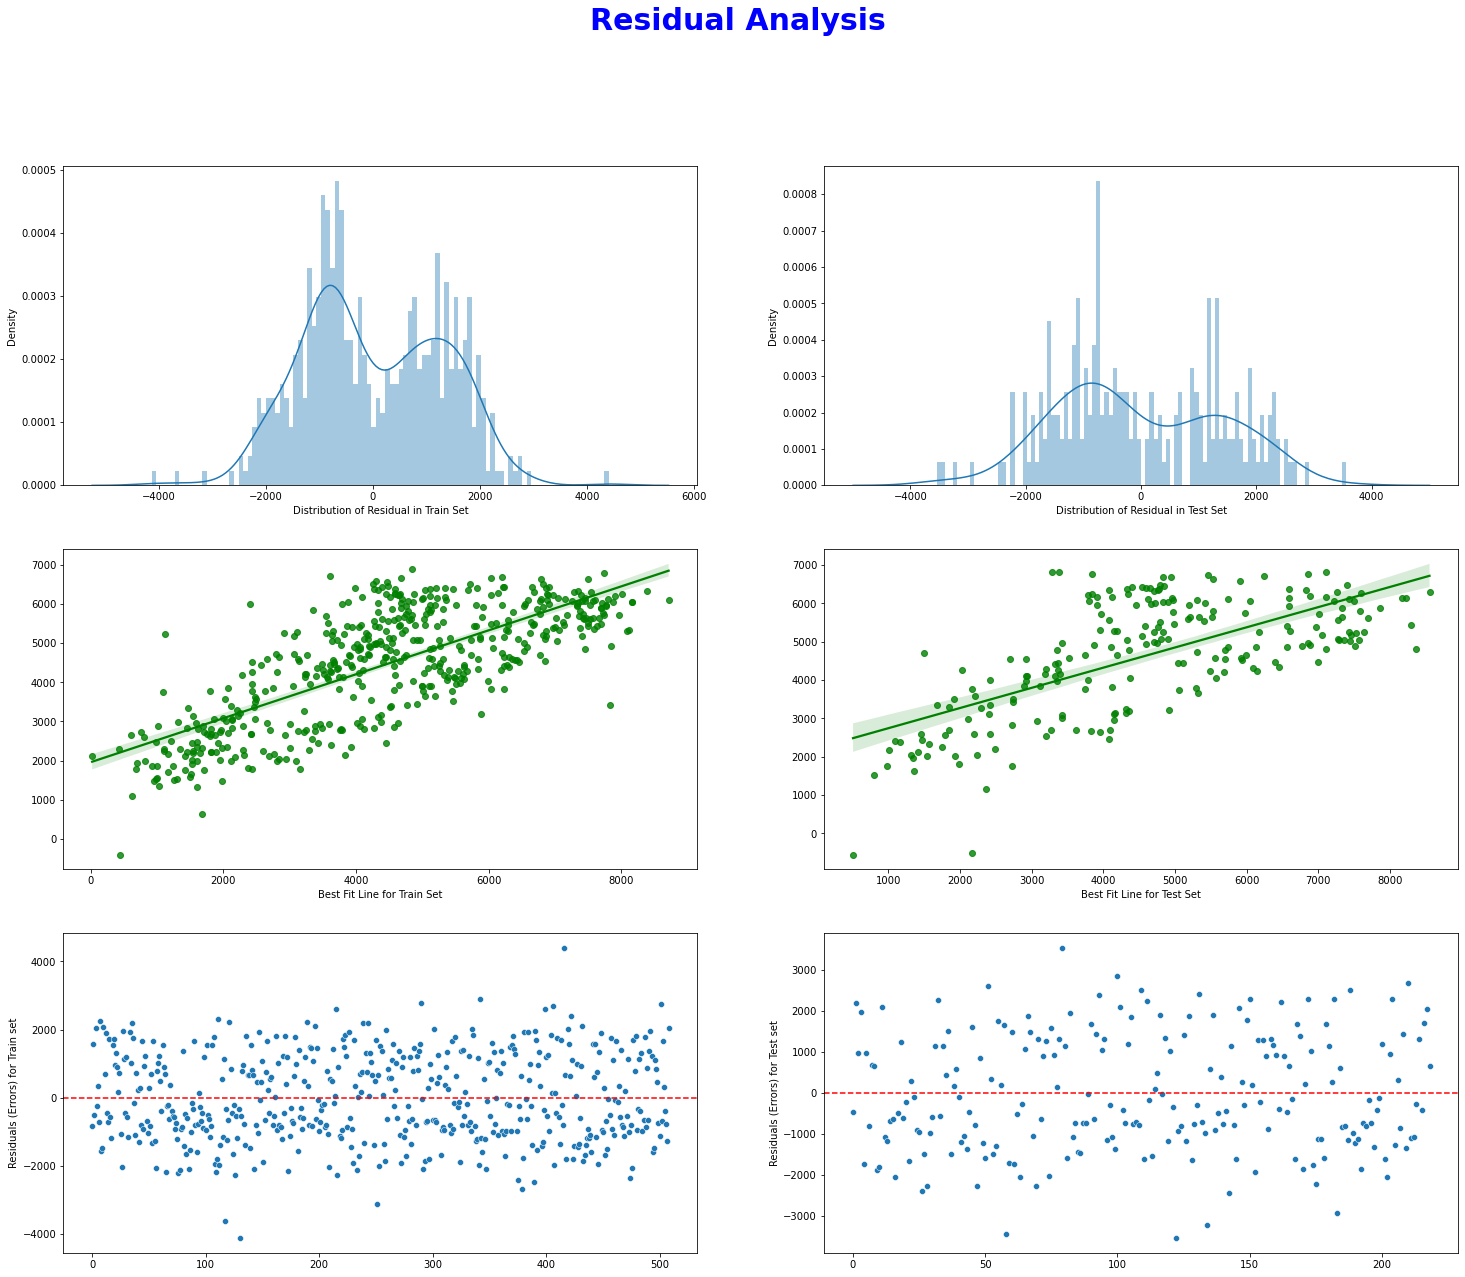

In [294]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))

sns.distplot(concat_train_pred_df_ols6['Error'], kde=True, bins=100, ax=axes[0,0])
axes[0,0].set_xlabel('Distribution of Residual in Train Set')

sns.distplot(concat_test_pred_df_ols6['Error'], kde=True, bins=100, ax=axes[0,1])
axes[0,1].set_xlabel('Distribution of Residual in Test Set')

sns.regplot(y_train, y_train_pred_ols_6, color='green', ax=axes[1,0])
axes[1,0].set_xlabel('Best Fit Line for Train Set')

sns.regplot(y_test, y_test_pred_ols_6, color='green', ax=axes[1,1])
axes[1,1].set_xlabel('Best Fit Line for Test Set')

sns.scatterplot(concat_train_pred_df_ols6.index, concat_train_pred_df_ols6['Error'], data=concat_train_pred_df, ax=axes[2,0])
axes[2,0].axhline(y=0, color='r', linestyle='--')
axes[2,0].set_ylabel("Residuals (Errors) for Train set")


sns.scatterplot(concat_test_pred_df_ols6.index, concat_test_pred_df_ols6['Error'], data=concat_test_pred_df, ax=axes[2,1])
axes[2,1].axhline(y=0, color='r', linestyle='--')
axes[2,1].set_ylabel("Residuals (Errors) for Test set")

fig.suptitle("Residual Analysis", fontsize=30, fontweight='bold', color='blue',ha='center',va='center')
plt.show()

- For this Model, af ter residual analysis we can see that error term distribution is not absolutely normal
- But the model's best fit line and residual's homoscedasticity is maintained properly

- Observation:
    - After all manual feature selection process ols_4,ols_5, ols_6 can be taken for going forward though some implementation of advanced techniques can create some improvement in the model's output and prediction

### RFE - Automaed Variable Selection

In [295]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [296]:
X_train_final

holiday_1  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0            0                0                  0                 0   
1            0                0                  0                 0   
2            0                1                  0                 0   
3            0                0                  0                 0   
4            0                0                  0                 1   
..         ...              ...                ...               ...   
504          0                0                  0                 0   
505          0                0                  0                 0   
506          0                0                  1                 0   
507          0                0                  0                 0   
508          0                0                  0                 0   

     weekday_Friday  weekday_Saturday  weekday_Sunday  workingday_1  \
0                 0                 0               0             1   
1                 0                 1               0             0   
2                 0                 0               0             1   
3                 0                 0               1             0   
4                 0                 0               0             1   
..              ...               ...             ...           ...   
504               0                 0               1             0   
505               0                 1               0             0   
506               0                 0               0             1   
507               1                 0               0             1   
508               1                 0               0             1   

     weathersit_2  weathersit_3  ...  month_Aug  month_Sept  month_Oct  \
0               0             0  ...          0           0          0   
1               0             0  ...          0           0          0   
2               1             0  ...          0           0          0   
3               0             0  ...          0           1          0   
4               0             0  ...          0           0          0   
..            ...           ...  ...        ...         ...        ...   
504             0             0  ...          1           0          0   
505             1             0  ...          0           0          0   
506             0             0  ...          0           0          0   
507             1             0  ...          0           0          0   
508             0             0  ...          0           0          0   

     month_Nov  month_Dec      temp     atemp       hum  windspeed  year  
0            0          1  0.245101  0.204242  0.319025   0.892104   1.0  
1            0          0  0.496388  0.499889  0.204176   0.883077   1.0  
2            0          0  0.651106  0.632534  0.774941   0.433459   0.0  
3            0          0  0.736253  0.711117  0.546404   0.697831   1.0  
4            0          0  0.901354  0.858965  0.470417   0.206816   1.0  
..         ...        ...       ...       ...       ...        ...   ...  
504          0          0  0.914852  0.899500  0.499999   0.622272   1.0  
505          0          0  0.294718  0.281174  0.617017   0.602136   0.0  
506          0          1  0.271061  0.270123  0.533642   0.377700   0.0  
507          0          0  0.358646  0.346406  0.814940   0.555181   0.0  
508          0          0  0.677065  0.656191  0.435614   0.332737   1.0  

[509 rows x 29 columns]

In [297]:
y_train

0      1796
1      6233
2      4191
3      8395
4      6211
       ... 
504    6824
505    1807
506    3403
507    2121
508    7494
Name: cnt, Length: 509, dtype: int64

In [298]:
lm = LinearRegression()
lm.fit(X_train_final, y_train)

LinearRegression()

In [299]:
# Running RFE with the output number of the variable equal to 12

rfe = RFE(lm,n_features_to_select=12)             # running RFE
rfe = rfe.fit(X_train_final, y_train)

In [300]:
X_train_final.columns

Index(['holiday_1', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday', 'workingday_1',
       'weathersit_2', 'weathersit_3', 'Season_spring', 'Season_summer',
       'Season_winter', 'month_Feb', 'month_Mar', 'month_Apr', 'month_May',
       'month_Jun', 'month_Jul', 'month_Aug', 'month_Sept', 'month_Oct',
       'month_Nov', 'month_Dec', 'temp', 'atemp', 'hum', 'windspeed', 'year'],
      dtype='object')

In [301]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True])

In [302]:
rfe.ranking_

array([ 1, 10, 18,  7,  9, 16, 12,  8,  2,  1,  1, 13,  1, 11,  1,  4,  1,
        3, 14,  5,  1,  6, 15, 17,  1,  1,  1,  1,  1])

In [303]:
rfe_df = pd.DataFrame({'feature':X_train_final.columns,
                      'feature_ranking':rfe.ranking_,
                      'feature support':rfe.support_})

In [304]:
rfe_df

feature  feature_ranking  feature support
0           holiday_1                1             True
1     weekday_Tuesday               10            False
2   weekday_Wednesday               18            False
3    weekday_Thursday                7            False
4      weekday_Friday                9            False
5    weekday_Saturday               16            False
6      weekday_Sunday               12            False
7        workingday_1                8            False
8        weathersit_2                2            False
9        weathersit_3                1             True
10      Season_spring                1             True
11      Season_summer               13            False
12      Season_winter                1             True
13          month_Feb               11            False
14          month_Mar                1             True
15          month_Apr                4            False
16          month_May                1             True
17          month_Jun                3            False
18          month_Jul               14            False
19          month_Aug                5            False
20         month_Sept                1             True
21          month_Oct                6            False
22          month_Nov               15            False
23          month_Dec               17            False
24               temp                1             True
25              atemp                1             True
26                hum                1             True
27          windspeed                1             True
28               year                1             True

In [305]:
rfe_df.loc[ (rfe_df['feature_ranking'] == 1)]

feature  feature_ranking  feature support
0       holiday_1                1             True
9    weathersit_3                1             True
10  Season_spring                1             True
12  Season_winter                1             True
14      month_Mar                1             True
16      month_May                1             True
20     month_Sept                1             True
24           temp                1             True
25          atemp                1             True
26            hum                1             True
27      windspeed                1             True
28           year                1             True

In [306]:
rfe_df.loc[ (rfe_df['feature_ranking'] == 1)].feature

0         holiday_1
9      weathersit_3
10    Season_spring
12    Season_winter
14        month_Mar
16        month_May
20       month_Sept
24             temp
25            atemp
26              hum
27        windspeed
28             year
Name: feature, dtype: object

### Selecting the features:

- As we ave seen temp and atemp are highly correlated . So dropping off atemp feature.

In [307]:
selected_features = X_train_final.columns[rfe.support_]
selected_features

Index(['holiday_1', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_May', 'month_Sept', 'temp', 'atemp', 'hum',
       'windspeed', 'year'],
      dtype='object')

In [308]:
X_train_final_rfe = X_train_final[selected_features]

In [309]:
X_train_final_rfe

holiday_1  weathersit_3  Season_spring  Season_winter  month_Mar  \
0            0             0              1              0          0   
1            0             0              0              0          0   
2            0             0              0              0          0   
3            0             0              0              0          0   
4            0             0              0              0          0   
..         ...           ...            ...            ...        ...   
504          0             0              0              0          0   
505          0             0              1              0          0   
506          0             0              0              1          0   
507          0             0              0              0          1   
508          0             0              0              0          0   

     month_May  month_Sept      temp     atemp       hum  windspeed  year  
0            0           0  0.245101  0.204242  0.319025   0.892104   1.0  
1            0           0  0.496388  0.499889  0.204176   0.883077   1.0  
2            0           0  0.651106  0.632534  0.774941   0.433459   0.0  
3            0           1  0.736253  0.711117  0.546404   0.697831   1.0  
4            0           0  0.901354  0.858965  0.470417   0.206816   1.0  
..         ...         ...       ...       ...       ...        ...   ...  
504          0           0  0.914852  0.899500  0.499999   0.622272   1.0  
505          0           0  0.294718  0.281174  0.617017   0.602136   0.0  
506          0           0  0.271061  0.270123  0.533642   0.377700   0.0  
507          0           0  0.358646  0.346406  0.814940   0.555181   0.0  
508          0           0  0.677065  0.656191  0.435614   0.332737   1.0  

[509 rows x 12 columns]

In [310]:
X_train_final_rfe = X_train_final_rfe.drop(['atemp'], axis=1)

In [311]:
X_train_final_rfe.shape

(509, 11)

### Modelling wit the selected features

In [312]:
X_train_final_rfe_const = sm.add_constant(X_train_final_rfe)

In [313]:
X_train_final_rfe_const

const  holiday_1  weathersit_3  Season_spring  Season_winter  month_Mar  \
0      1.0          0             0              1              0          0   
1      1.0          0             0              0              0          0   
2      1.0          0             0              0              0          0   
3      1.0          0             0              0              0          0   
4      1.0          0             0              0              0          0   
..     ...        ...           ...            ...            ...        ...   
504    1.0          0             0              0              0          0   
505    1.0          0             0              1              0          0   
506    1.0          0             0              0              1          0   
507    1.0          0             0              0              0          1   
508    1.0          0             0              0              0          0   

     month_May  month_Sept      temp       hum  windspeed  year  
0            0           0  0.245101  0.319025   0.892104   1.0  
1            0           0  0.496388  0.204176   0.883077   1.0  
2            0           0  0.651106  0.774941   0.433459   0.0  
3            0           1  0.736253  0.546404   0.697831   1.0  
4            0           0  0.901354  0.470417   0.206816   1.0  
..         ...         ...       ...       ...        ...   ...  
504          0           0  0.914852  0.499999   0.622272   1.0  
505          0           0  0.294718  0.617017   0.602136   0.0  
506          0           0  0.271061  0.533642   0.377700   0.0  
507          0           0  0.358646  0.814940   0.555181   0.0  
508          0           0  0.677065  0.435614   0.332737   1.0  

[509 rows x 12 columns]

In [314]:
X_train_final_rfe_const.index

RangeIndex(start=0, stop=509, step=1)

In [315]:
y_train.index

RangeIndex(start=0, stop=509, step=1)

In [316]:
rfe_lm_1 = sm.OLS(y_train, X_train_final_rfe_const).fit()

- Observation:
    - The model is giving the variability 83.3% (Adjusted R-Sq) and all predictors are significant. 
    - We can go with this model , but before that running VIF to check if there is any multi-collinearity present or not

In [317]:
X_train_final_rfe.columns

Index(['holiday_1', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_May', 'month_Sept', 'temp', 'hum', 'windspeed',
       'year'],
      dtype='object')

In [318]:
vif_rfe_1 = pd.DataFrame()
vif_rfe_1['Features'] = X_train_final_rfe.columns
vif_rfe_1['VIF'] = [variance_inflation_factor(X_train_final_rfe.values, i) for i in range(X_train_final_rfe.shape[1])]
vif_rfe_1['VIF'] = round(vif_rfe_1['VIF'], 2)
vif_rfe_1 = vif_rfe_1.sort_values(by = "VIF", ascending = False)
vif_rfe_1

Features   VIF
8             hum  8.85
7            temp  7.99
9       windspeed  4.17
2   Season_spring  2.31
10           year  2.06
3   Season_winter  1.91
5       month_May  1.33
1    weathersit_3  1.22
4       month_Mar  1.21
6      month_Sept  1.21
0       holiday_1  1.04

- Observation:
    - As expected temp and hum both are correlated in real example as well , hum has high VIF , so dropping that off to check if there is any change coming

In [319]:
X_train_final_rfe_less_hum = X_train_final_rfe.drop(['hum'], axis=1)

In [320]:
X_train_final_rfe_less_hum.columns

Index(['holiday_1', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_May', 'month_Sept', 'temp', 'windspeed', 'year'],
      dtype='object')

In [321]:
X_train_final_rfe_less_hum_const = sm.add_constant(X_train_final_rfe_less_hum)

In [322]:
rfe_lm_2 = sm.OLS(y_train, X_train_final_rfe_less_hum_const).fit()

In [323]:
print(rfe_lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          3.09e-171
Time:                        22:26:24   Log-Likelihood:                -4157.5
No. Observations:                 509   AIC:                             8337.
Df Residuals:                     498   BIC:                             8384.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1774.6353    219.954      8.068

- Observation: 
    - Adjusted R-Sq : 80.4%
    - Mont_May is insignificant as its p-value is 0.13
    - Rest all are significant.
    - But if we think, in real life some times we can see that on holiday, people go for drive on bike. So there may be a chance of getting a higher demand of bike on holiday.
    - If we typically go by the model output we can omit 'holiday_1' variable and rebuild model but on business perspective we can keep this variable too.
    - Checking the VIF among all these predictors

- Model Equation:
    cnt = -529.91 * holiday_1 + (-2256.2370) * weathersit_3 + (-1044.1260) * Season_spring + 452.5941 * Season_winter + 378.3521 * month_Mar +219.1240 * month_May + 593.0096 * month_Sept  + 3923.0850 * temp + (-685.2926) * windspeed + 2008.4832 * year

In [324]:
vif_rfe_2 = pd.DataFrame()
vif_rfe_2['Features'] = X_train_final_rfe_less_hum.columns
vif_rfe_2['VIF'] = [variance_inflation_factor(X_train_final_rfe_less_hum.values, i) for i in range(X_train_final_rfe_less_hum.shape[1])]
vif_rfe_2['VIF'] = round(vif_rfe_2['VIF'], 2)
vif_rfe_2 = vif_rfe_2.sort_values(by = "VIF", ascending = False)
vif_rfe_2

Features   VIF
8      windspeed  4.17
7           temp  4.01
9           year  2.05
2  Season_spring  1.76
3  Season_winter  1.38
5      month_May  1.21
4      month_Mar  1.20
6     month_Sept  1.17
1   weathersit_3  1.08
0      holiday_1  1.04

<AxesSubplot:>

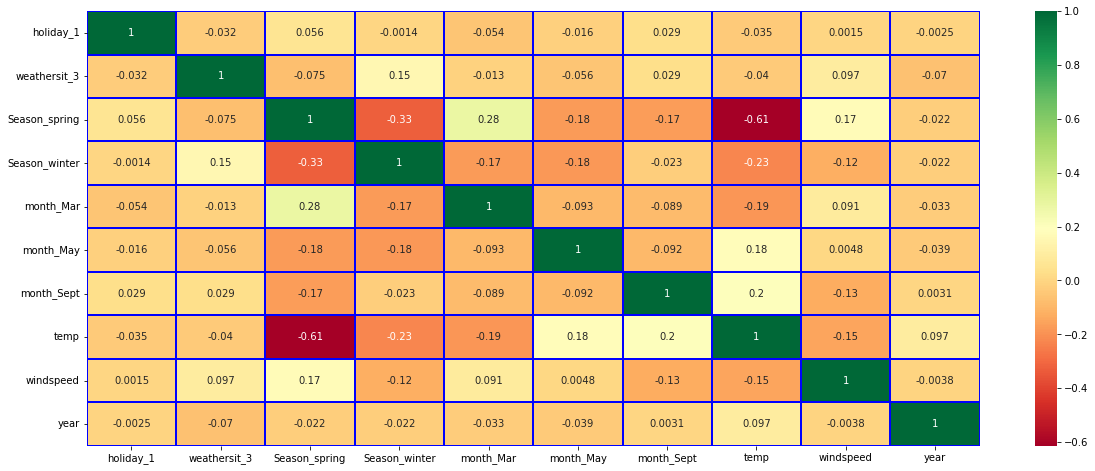

In [325]:
plt.figure(figsize=(20,8))
sns.heatmap(X_train_final_rfe_less_hum.corr(), annot=True, linecolor='blue',linewidth=1.5,cmap='RdYlGn')

- Inference:
    - holiday_1 is very less multi-colinear with other predictors. So as of now I am not dropping off this.
    - But here we can see windspeed is multicolinear. In real life, we can see sometimes when the windspeed is high then people don't use to go on bike. 
    - Also the regression coefficint of windspeed is negative and the VIF is < 5 (as per our assumption, 5 was our threshold value of VIF)
    - We can keep this or not keep this as it's highly dependent on business experts.

- As of now, I am dropping off windspeed and checking if the model performs better or not

In [326]:
X_train_final_rfe_less_hum_less_wind_less_may = X_train_final_rfe_less_hum.drop(['windspeed','month_May'], axis = 1)

In [327]:
X_train_final_rfe_less_hum_less_wind_less_may_const = sm.add_constant(X_train_final_rfe_less_hum_less_wind_less_may)

In [328]:
rfe_lm_3 = sm.OLS(y_train, X_train_final_rfe_less_hum_less_wind_less_may_const).fit()

In [329]:
print(rfe_lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     251.9
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          5.34e-170
Time:                        22:26:24   Log-Likelihood:                -4166.1
No. Observations:                 509   AIC:                             8350.
Df Residuals:                     500   BIC:                             8388.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1474.3423    196.600      7.499

- Observation:
    - This model explains 79.8% variability of the dataset.
    - All predictors are significant.
    - We can think of this model as the final model. As well a go with the previous model also.
    - Checking the VIF to understand the multicolinearity.

- Model Equation:
    cnt = -534.0728 * holiday_1 + (-2376.1119) * weathersit_3 + (-1096.1374) * Season_spring + 466.2944 * Season_winter + 345.6618 * month_Mar + 617.3147 * month_Sept  + 4003.3032 * temp + 1997.0252 * year

In [330]:
vif_rfe_3 = pd.DataFrame()
vif_rfe_3['Features'] = X_train_final_rfe_less_hum_less_wind_less_may.columns
vif_rfe_3['VIF'] = [variance_inflation_factor(X_train_final_rfe_less_hum_less_wind_less_may.values, i) 
                    for i in range(X_train_final_rfe_less_hum_less_wind_less_may.shape[1])]
vif_rfe_3['VIF'] = round(vif_rfe_3['VIF'], 2)
vif_rfe_3 = vif_rfe_3.sort_values(by = "VIF", ascending = False)
vif_rfe_3

Features   VIF
6           temp  2.19
7           year  2.04
2  Season_spring  1.32
3  Season_winter  1.27
4      month_Mar  1.19
5     month_Sept  1.14
1   weathersit_3  1.06
0      holiday_1  1.04

- Observation:
   - There is no multicollinearity found in this model
   -  Adjusted R-Squared is a bit low than the last model.

- Predicting the Train set and Test Set by both "rfe_lm_2" and "rfe_lm_3" to ceck their performance on Test Set

### Train and Test Prediction using rfe_lm_2 :-

In [331]:
y_train

0      1796
1      6233
2      4191
3      8395
4      6211
       ... 
504    6824
505    1807
506    3403
507    2121
508    7494
Name: cnt, Length: 509, dtype: int64

In [332]:
y_train_pred_rfe_2 = rfe_lm_2.predict(X_train_final_rfe_less_hum_const)

In [333]:
train_predicted_df_rfe_2 = pd.DataFrame({'Actual':y_train,
                                        'Predicted':y_train_pred_rfe_2,
                                        'Error':y_train - y_train_pred_rfe_2})

In [334]:
train_predicted_df_rfe_2

Actual    Predicted        Error
0      1796  3089.192780 -1293.192780
1      6233  5125.324863  1107.675137
2      4191  4031.934334   159.065666
3      8395  6786.291207  1608.708793
4      6211  7177.477489  -966.477489
..      ...          ...          ...
504    6824  6945.724514  -121.724514
505    1807  1474.071919   332.928081
506    3403  3031.790966   371.209034
507    2121  3179.525207 -1058.525207
508    7494  6211.280340  1282.719660

[509 rows x 3 columns]

In [335]:
X_train_final_rfe_less_hum_const.columns

Index(['const', 'holiday_1', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_May', 'month_Sept', 'temp', 'windspeed', 'year'],
      dtype='object')

- Selecting the columns of X_test_final as per the column names showing above

In [336]:
X_test_final.columns

Index(['holiday_1', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday', 'workingday_1',
       'weathersit_2', 'weathersit_3', 'Season_spring', 'Season_summer',
       'Season_winter', 'month_Feb', 'month_Mar', 'month_Apr', 'month_May',
       'month_Jun', 'month_Jul', 'month_Aug', 'month_Sept', 'month_Oct',
       'month_Nov', 'month_Dec', 'temp', 'atemp', 'hum', 'windspeed', 'year'],
      dtype='object')

In [337]:
X_train_final_rfe_less_hum_const.columns.intersection(X_test_final.columns)

Index(['holiday_1', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_May', 'month_Sept', 'temp', 'windspeed', 'year'],
      dtype='object')

In [338]:
X_test_rfe_2 = sm.add_constant(  X_test_final[X_train_final_rfe_less_hum_const.columns.intersection(X_test_final.columns)]  )

In [339]:
X_test_rfe_2.columns

Index(['const', 'holiday_1', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_May', 'month_Sept', 'temp', 'windspeed', 'year'],
      dtype='object')

In [340]:
y_test_pred_rfe_2 = rfe_lm_2.predict(X_test_rfe_2)

In [341]:
y_test

0      5204
1      7429
2      5558
3      7865
4      3974
       ... 
214    5062
215    2192
216    7273
217    8173
218    3194
Name: cnt, Length: 219, dtype: int64

In [342]:
y_test_pred_rfe_2

0      4446.140842
1      6310.837588
2      5366.518197
3      6541.314077
4      4894.493681
          ...     
214    4375.527360
215    2286.388457
216    6943.216236
217    6791.266002
218    4352.157472
Length: 219, dtype: float64

In [343]:
y_test.index = y_test_pred_rfe_2.index

In [344]:
test_predicted_df_rfe_2 = pd.DataFrame({'Actual':y_test,
                                        'Predicted':y_test_pred_rfe_2,
                                        'Error':y_test - y_test_pred_rfe_2})

In [345]:
test_predicted_df_rfe_2

Actual    Predicted        Error
0      5204  4446.140842   757.859158
1      7429  6310.837588  1118.162412
2      5558  5366.518197   191.481803
3      7865  6541.314077  1323.685923
4      3974  4894.493681  -920.493681
..      ...          ...          ...
214    5062  4375.527360   686.472640
215    2192  2286.388457   -94.388457
216    7273  6943.216236   329.783764
217    8173  6791.266002  1381.733998
218    3194  4352.157472 -1158.157472

[219 rows x 3 columns]

#### Model evaluation:-

In [346]:
print("The train score is :", round(r2_score(y_train, y_train_pred_rfe_2)*100,2))
print("The test score is :", round(r2_score(y_test, y_test_pred_rfe_2)*100,2))

The train score is : 80.78
The test score is : 77.35


In [347]:
print("The train RMSE is :", np.sqrt(mean_squared_error(y_train, y_train_pred_rfe_2)))
print("The test RMSE is :", np.sqrt(mean_squared_error(y_test, y_test_pred_rfe_2)))

The train RMSE is : 853.2610671360943
The test RMSE is : 896.8478000599388


#### Residual Analysis for RFE_2 Model:

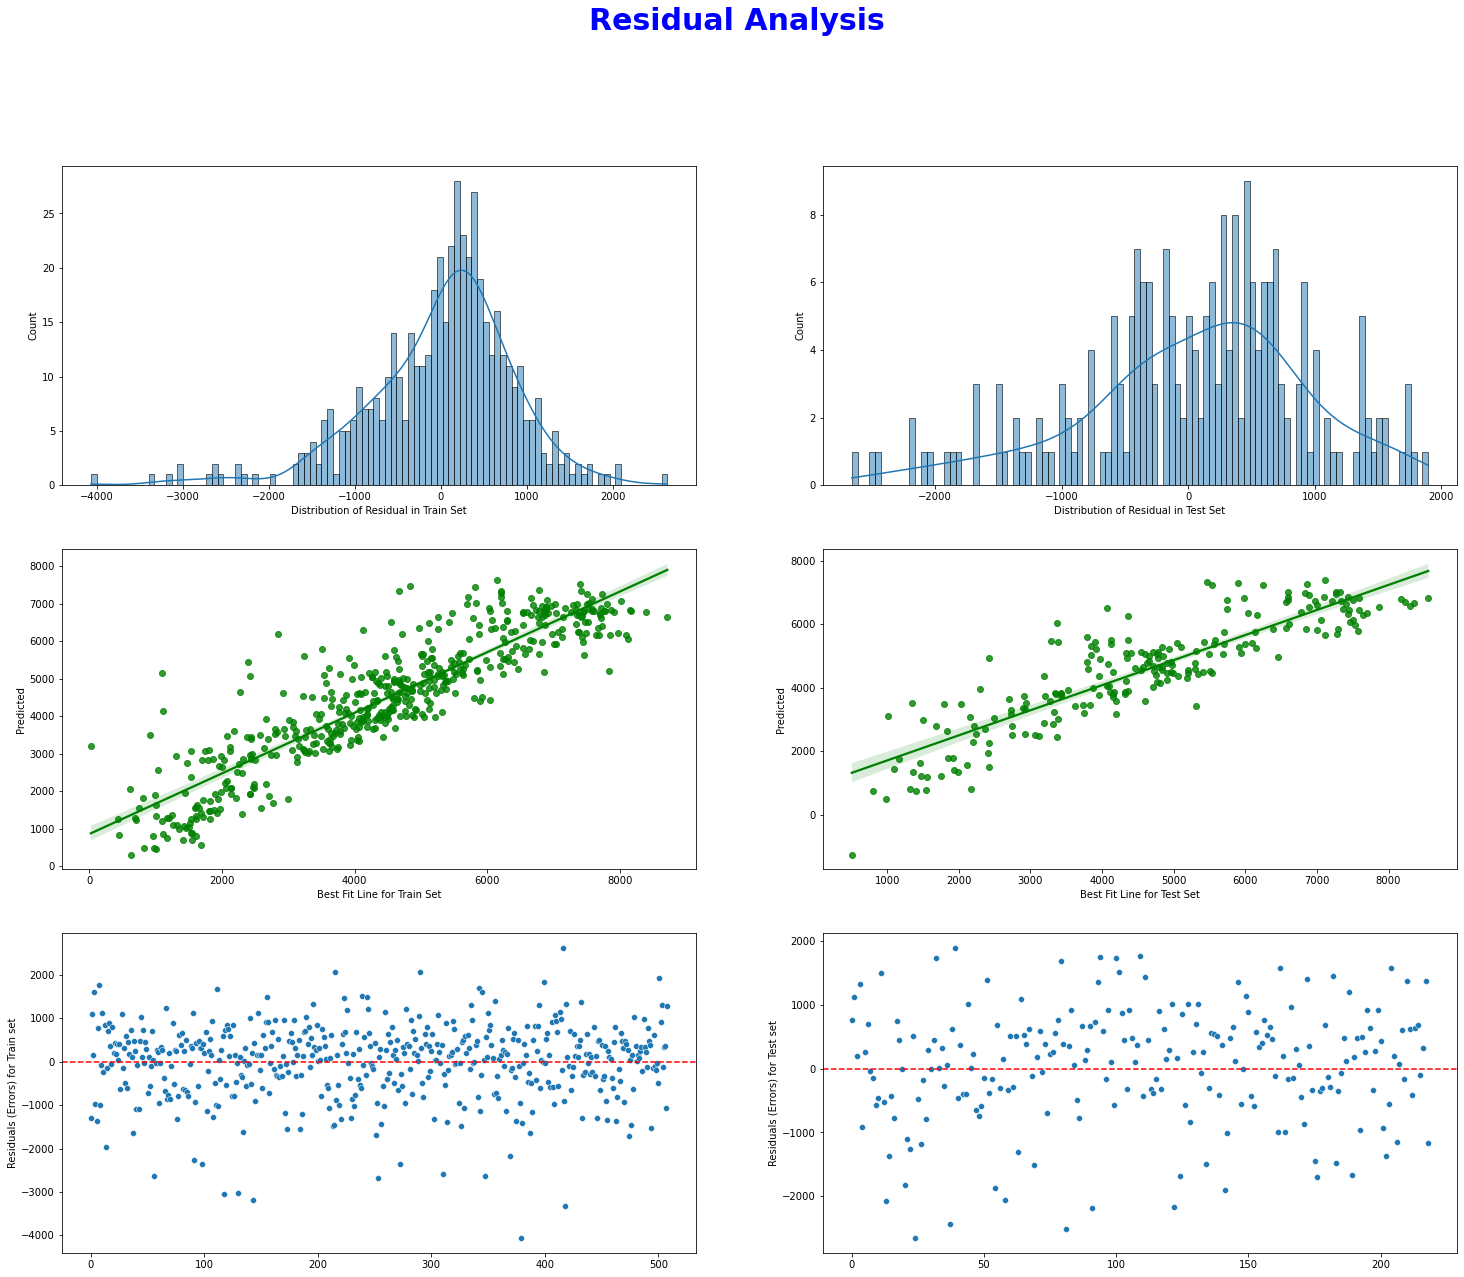

In [348]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))

sns.histplot(x='Error', data=train_predicted_df_rfe_2, kde=True, bins=100, ax=axes[0,0])
axes[0,0].set_xlabel('Distribution of Residual in Train Set')

sns.histplot(x='Error', data=test_predicted_df_rfe_2, kde=True, bins=100, ax=axes[0,1])
axes[0,1].set_xlabel('Distribution of Residual in Test Set')

sns.regplot('Actual', 'Predicted', data = train_predicted_df_rfe_2, color='green', ax=axes[1,0])
axes[1,0].set_xlabel('Best Fit Line for Train Set')

sns.regplot('Actual', 'Predicted', data = test_predicted_df_rfe_2, color='green', ax=axes[1,1])
axes[1,1].set_xlabel('Best Fit Line for Test Set')

sns.scatterplot(train_predicted_df_rfe_2.index, train_predicted_df_rfe_2['Error'], data=train_predicted_df_rfe_2, ax=axes[2,0])
axes[2,0].axhline(y=0, color='r', linestyle='--')
axes[2,0].set_ylabel("Residuals (Errors) for Train set")

sns.scatterplot(test_predicted_df_rfe_2.index, test_predicted_df_rfe_2['Error'], data=test_predicted_df_rfe_2, ax=axes[2,1])
axes[2,1].axhline(y=0, color='r', linestyle='--')
axes[2,1].set_ylabel("Residuals (Errors) for Test set")


fig.suptitle("Residual Analysis", fontsize=30, fontweight='bold', color='blue',ha='center',va='center')
plt.show()

### Train and Test Prediction using rfe_lm_3 :-

In [349]:
y_train

0      1796
1      6233
2      4191
3      8395
4      6211
       ... 
504    6824
505    1807
506    3403
507    2121
508    7494
Name: cnt, Length: 509, dtype: int64

In [350]:
y_pred_train_rfe_lm_3 = rfe_lm_3.predict(X_train_final_rfe_less_hum_less_wind_less_may_const)

In [351]:
train_pred_df_rfe_3 = pd.DataFrame({'Actual': y_train,
                                   'Predicted': y_pred_train_rfe_lm_3,
                                   'Error': y_train - y_pred_train_rfe_lm_3})

In [352]:
train_pred_df_rfe_3

Actual    Predicted        Error
0      1796  3356.444000 -1560.444000
1      6233  5458.559398   774.440602
2      4191  4080.918005   110.081995
3      8395  7036.124236  1358.875764
4      6211  7079.760879  -868.760879
..      ...          ...          ...
504    6824  7133.799265  -309.799265
505    1807  1558.048446   248.951554
506    3403  3025.777175   377.222825
507    2121  3255.773007 -1134.773007
508    7494  6181.864674  1312.135326

[509 rows x 3 columns]

In [353]:
y_test

0      5204
1      7429
2      5558
3      7865
4      3974
       ... 
214    5062
215    2192
216    7273
217    8173
218    3194
Name: cnt, Length: 219, dtype: int64

In [354]:
X_test_rfe_3 = sm.add_constant(  X_test_final[X_train_final_rfe_less_hum_less_wind_less_may_const.columns.
                                              intersection(X_test_final.columns)]  )

In [355]:
X_test_rfe_3

const  holiday_1  weathersit_3  Season_spring  Season_winter  month_Mar  \
0      1.0          0             0              0              0          0   
1      1.0          0             0              0              0          0   
2      1.0          0             0              0              0          1   
3      1.0          0             0              0              0          0   
4      1.0          0             0              0              0          0   
..     ...        ...           ...            ...            ...        ...   
214    1.0          0             0              1              0          0   
215    1.0          0             0              1              0          1   
216    1.0          0             0              0              0          0   
217    1.0          0             0              0              0          0   
218    1.0          0             0              1              0          1   

     month_Sept      temp  year  
0             0  0.722754   0.0  
1             0  0.629300   1.0  
2             0  0.481850   1.0  
3             0  0.771557   1.0  
4             0  0.878510   0.0  
..          ...       ...   ...  
214           0  0.492235   1.0  
215           0  0.381399   0.0  
216           0  0.843205   1.0  
217           0  0.828668   1.0  
218           0  0.366591   1.0  

[219 rows x 9 columns]

In [356]:
X_train_final_rfe_less_hum_less_wind_less_may_const.columns

Index(['const', 'holiday_1', 'weathersit_3', 'Season_spring', 'Season_winter',
       'month_Mar', 'month_Sept', 'temp', 'year'],
      dtype='object')

In [357]:
y_pred_test_rfe_3 = rfe_lm_3.predict(X_test_rfe_3)

In [358]:
y_pred_test_rfe_3

0      4367.745960
1      5990.647700
2      5746.022528
3      6560.143357
4      4991.284991
          ...     
214    4345.795922
215    2250.722158
216    6846.971311
217    6788.777660
218    4188.466214
Length: 219, dtype: float64

In [359]:
y_test

0      5204
1      7429
2      5558
3      7865
4      3974
       ... 
214    5062
215    2192
216    7273
217    8173
218    3194
Name: cnt, Length: 219, dtype: int64

In [360]:
y_test.index = y_pred_test_rfe_3.index

In [361]:
test_pred_df_rfe_3 = pd.DataFrame({'Actual': y_test,
                                   'Predicted': y_pred_test_rfe_3,
                                   'Error': y_test - y_pred_test_rfe_3})

In [362]:
#### Model evaluation:-

print("The train score is :", round(r2_score(y_train, y_pred_train_rfe_lm_3)*100,2))
print("The test score is :", round(r2_score(y_test, y_pred_test_rfe_3)*100,2))

print("The train RMSE is :", np.sqrt(mean_squared_error(y_train, y_pred_train_rfe_lm_3)))
print("The test RMSE is :", np.sqrt(mean_squared_error(y_test, y_pred_test_rfe_3)))

The train score is : 80.12
The test score is : 76.48
The train RMSE is : 867.7971840719019
The test RMSE is : 913.8935505191015


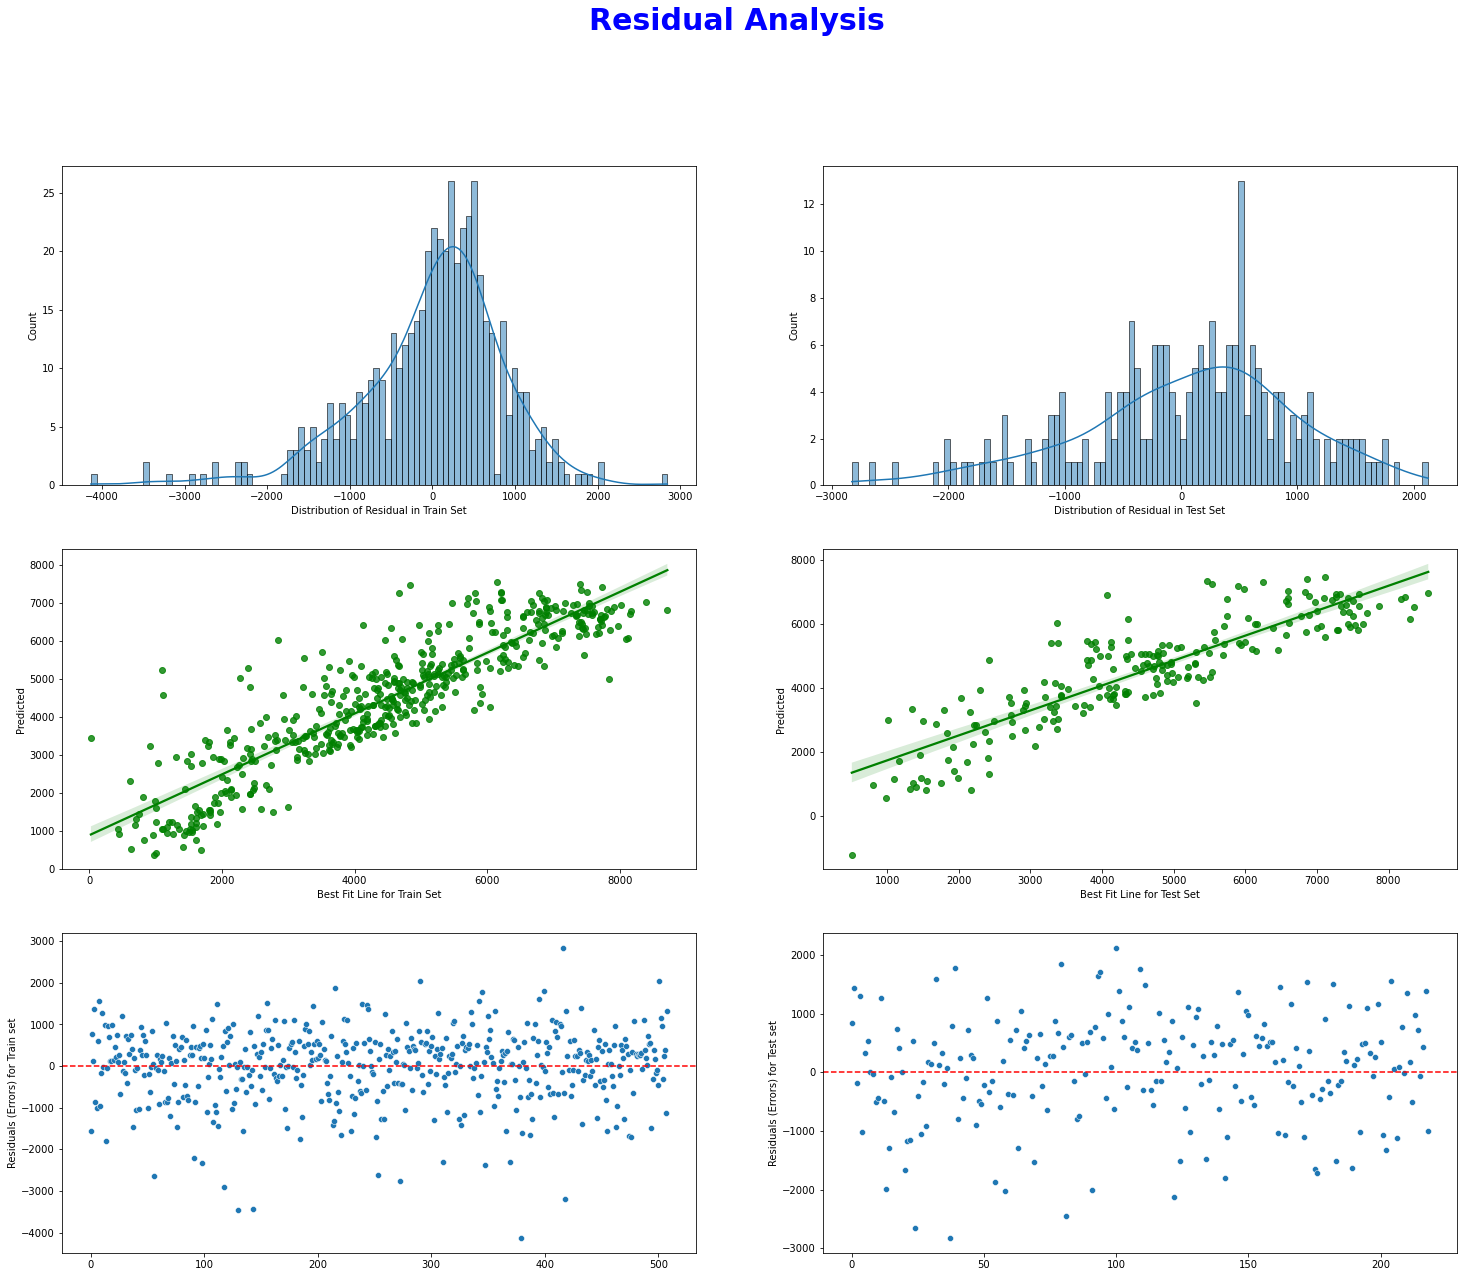

In [363]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))

sns.histplot(x='Error', data=train_pred_df_rfe_3, kde=True, bins=100, ax=axes[0,0])
axes[0,0].set_xlabel('Distribution of Residual in Train Set')

sns.histplot(x='Error', data=test_pred_df_rfe_3, kde=True, bins=100, ax=axes[0,1])
axes[0,1].set_xlabel('Distribution of Residual in Test Set')

sns.regplot('Actual', 'Predicted', data = train_pred_df_rfe_3, color='green', ax=axes[1,0])
axes[1,0].set_xlabel('Best Fit Line for Train Set')

sns.regplot('Actual', 'Predicted', data = test_pred_df_rfe_3, color='green', ax=axes[1,1])
axes[1,1].set_xlabel('Best Fit Line for Test Set')

sns.scatterplot(train_pred_df_rfe_3.index, train_pred_df_rfe_3['Error'], ax=axes[2,0])
axes[2,0].axhline(y=0, color='r', linestyle='--')
axes[2,0].set_ylabel("Residuals (Errors) for Train set")

sns.scatterplot(test_pred_df_rfe_3.index, test_pred_df_rfe_3['Error'],  ax=axes[2,1])
axes[2,1].axhline(y=0, color='r', linestyle='--')
axes[2,1].set_ylabel("Residuals (Errors) for Test set")


fig.suptitle("Residual Analysis", fontsize=30, fontweight='bold', color='blue',ha='center',va='center')
plt.show()

-Final Observation:
    
  - We can propose three models as of now: OLS_4, RFE_lm_2 , RFE_lm_3
  - But , we can see that year has been considered as an important predictor here. But if we consider 2018 & 2019 then this model will perform good. But in case of any other year (covid year) it might show some kind of bias in the model as at that time due to presence of multiple years in the 'year' variable, we have to deal that variable as a categorical variable and manage it in dummy encoding and for every unique presence of year the model will be very much specific on that year only. So we can think of dropping year variable and rerun the model to ceck if there is any change in performance being noticed.

In [364]:
X_train_final_rfe_less_hum_less_wind_less_may_less_year = X_train_final_rfe_less_hum_less_wind_less_may.drop(['year'], axis=1)

In [365]:
X_train_final_rfe_less_hum_less_wind_less_may_less_year

holiday_1  weathersit_3  Season_spring  Season_winter  month_Mar  \
0            0             0              1              0          0   
1            0             0              0              0          0   
2            0             0              0              0          0   
3            0             0              0              0          0   
4            0             0              0              0          0   
..         ...           ...            ...            ...        ...   
504          0             0              0              0          0   
505          0             0              1              0          0   
506          0             0              0              1          0   
507          0             0              0              0          1   
508          0             0              0              0          0   

     month_Sept      temp  
0             0  0.245101  
1             0  0.496388  
2             0  0.651106  
3             1  0.736253  
4             0  0.901354  
..          ...       ...  
504           0  0.914852  
505           0  0.294718  
506           0  0.271061  
507           0  0.358646  
508           0  0.677065  

[509 rows x 7 columns]

In [366]:
X_train_final_rfe_less_hum_less_wind_less_may_less_year_const = sm.add_constant(X_train_final_rfe_less_hum_less_wind_less_may_less_year)

In [367]:
rfe_lm_3_less_year = sm.OLS(y_train, X_train_final_rfe_less_hum_less_wind_less_may_less_year_const).fit()

In [368]:
print(rfe_lm_3_less_year.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     84.97
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           4.77e-81
Time:                        22:26:27   Log-Likelihood:                -4378.1
No. Observations:                 509   AIC:                             8772.
Df Residuals:                     501   BIC:                             8806.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2039.1742    295.971      6.890

- We can see that holiday_1 and month_Mar have become insigificant and also the model variability reduced drastically.
- Let's remove these variables and check ow the final model works.

In [369]:
X_train_final_rfe_less_hum_less_wind_less_may_less_year_final = X_train_final_rfe_less_hum_less_wind_less_may_less_year.drop(['holiday_1','month_Mar'], axis=1)

In [370]:
X_train_final_rfe_less_hum_less_wind_less_may_less_year_final_const = sm.add_constant(X_train_final_rfe_less_hum_less_wind_less_may_less_year_final)

In [371]:
rfe_lm_3_less_year_final = sm.OLS(y_train, X_train_final_rfe_less_hum_less_wind_less_may_less_year_final_const).fit()

In [372]:
print(rfe_lm_3_less_year_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           3.62e-82
Time:                        22:26:27   Log-Likelihood:                -4380.3
No. Observations:                 509   AIC:                             8773.
Df Residuals:                     503   BIC:                             8798.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2075.3120    294.146      7.055

In [373]:
y_train_pred_rfe_3_less_year = rfe_lm_3_less_year_final.predict(X_train_final_rfe_less_hum_less_wind_less_may_less_year_final_const)

In [374]:
y_train

0      1796
1      6233
2      4191
3      8395
4      6211
       ... 
504    6824
505    1807
506    3403
507    2121
508    7494
Name: cnt, Length: 509, dtype: int64

In [375]:
y_train_pred_rfe_3_less_year

0      2355.063257
1      4397.341504
2      5121.090086
3      6064.648506
4      6291.711901
          ...     
504    6354.855638
505    2587.161518
506    3895.778808
507    3753.004930
508    5242.522143
Length: 509, dtype: float64

In [376]:
train_pred_df = pd.DataFrame({'Actual':y_train,
                             'Predicted':y_train_pred_rfe_3_less_year,
                             'Error': y_train - y_train_pred_rfe_3_less_year})

In [377]:
train_pred_df

Actual    Predicted        Error
0      1796  2355.063257  -559.063257
1      6233  4397.341504  1835.658496
2      4191  5121.090086  -930.090086
3      8395  6064.648506  2330.351494
4      6211  6291.711901   -80.711901
..      ...          ...          ...
504    6824  6354.855638   469.144362
505    1807  2587.161518  -780.161518
506    3403  3895.778808  -492.778808
507    2121  3753.004930 -1632.004930
508    7494  5242.522143  2251.477857

[509 rows x 3 columns]

In [378]:
X_test_rfe_3_less_year = sm.add_constant(  X_test_final[X_train_final_rfe_less_hum_less_wind_less_may_less_year_final_const.columns.
                                              intersection(X_test_final.columns)]  )

In [379]:
X_train_final_rfe_less_hum_less_wind_less_may_less_year_final_const

const  weathersit_3  Season_spring  Season_winter  month_Sept      temp
0      1.0             0              1              0           0  0.245101
1      1.0             0              0              0           0  0.496388
2      1.0             0              0              0           0  0.651106
3      1.0             0              0              0           1  0.736253
4      1.0             0              0              0           0  0.901354
..     ...           ...            ...            ...         ...       ...
504    1.0             0              0              0           0  0.914852
505    1.0             0              1              0           0  0.294718
506    1.0             0              0              1           0  0.271061
507    1.0             0              0              0           0  0.358646
508    1.0             0              0              0           0  0.677065

[509 rows x 6 columns]

In [380]:
X_test_rfe_3_less_year

const  weathersit_3  Season_spring  Season_winter  month_Sept      temp
0      1.0             0              0              0           0  0.722754
1      1.0             0              0              0           0  0.629300
2      1.0             0              0              0           0  0.481850
3      1.0             0              0              0           0  0.771557
4      1.0             0              0              0           0  0.878510
..     ...           ...            ...            ...         ...       ...
214    1.0             0              1              0           0  0.492235
215    1.0             0              1              0           0  0.381399
216    1.0             0              0              0           0  0.843205
217    1.0             0              0              0           0  0.828668
218    1.0             0              1              0           0  0.366591

[219 rows x 6 columns]

In [381]:
y_test_pred_rfe_3_less_year = rfe_lm_3_less_year_final.predict(X_test_rfe_3_less_year)

In [382]:
y_test_pred_rfe_3_less_year

0      5456.247925
1      5019.085526
2      4329.336522
3      5684.539959
4      6184.851924
          ...     
214    3511.118820
215    2992.644215
216    6019.697799
217    5951.698645
218    2923.374376
Length: 219, dtype: float64

In [383]:
y_test

0      5204
1      7429
2      5558
3      7865
4      3974
       ... 
214    5062
215    2192
216    7273
217    8173
218    3194
Name: cnt, Length: 219, dtype: int64

In [384]:
test_pred_df = pd.DataFrame({'Actual':y_test,
                             'Predicted':y_test_pred_rfe_3_less_year,
                             'Error': y_test - y_test_pred_rfe_3_less_year})

In [385]:
test_pred_df

Actual    Predicted        Error
0      5204  5456.247925  -252.247925
1      7429  5019.085526  2409.914474
2      5558  4329.336522  1228.663478
3      7865  5684.539959  2180.460041
4      3974  6184.851924 -2210.851924
..      ...          ...          ...
214    5062  3511.118820  1550.881180
215    2192  2992.644215  -800.644215
216    7273  6019.697799  1253.302201
217    8173  5951.698645  2221.301355
218    3194  2923.374376   270.625624

[219 rows x 3 columns]

In [386]:
#### Model evaluation:-

print("The train score is :", round(r2_score(y_train, y_train_pred_rfe_3_less_year)*100,2))
print("The test score is :", round(r2_score(y_test, y_test_pred_rfe_3_less_year)*100,2))

print("The train RMSE is :", np.sqrt(mean_squared_error(y_train, y_train_pred_rfe_3_less_year)))
print("The test RMSE is :", np.sqrt(mean_squared_error(y_test, y_test_pred_rfe_3_less_year)))

The train score is : 53.88
The test score is : 40.6
The train RMSE is : 1321.9255489806753
The test RMSE is : 1452.4584266405084


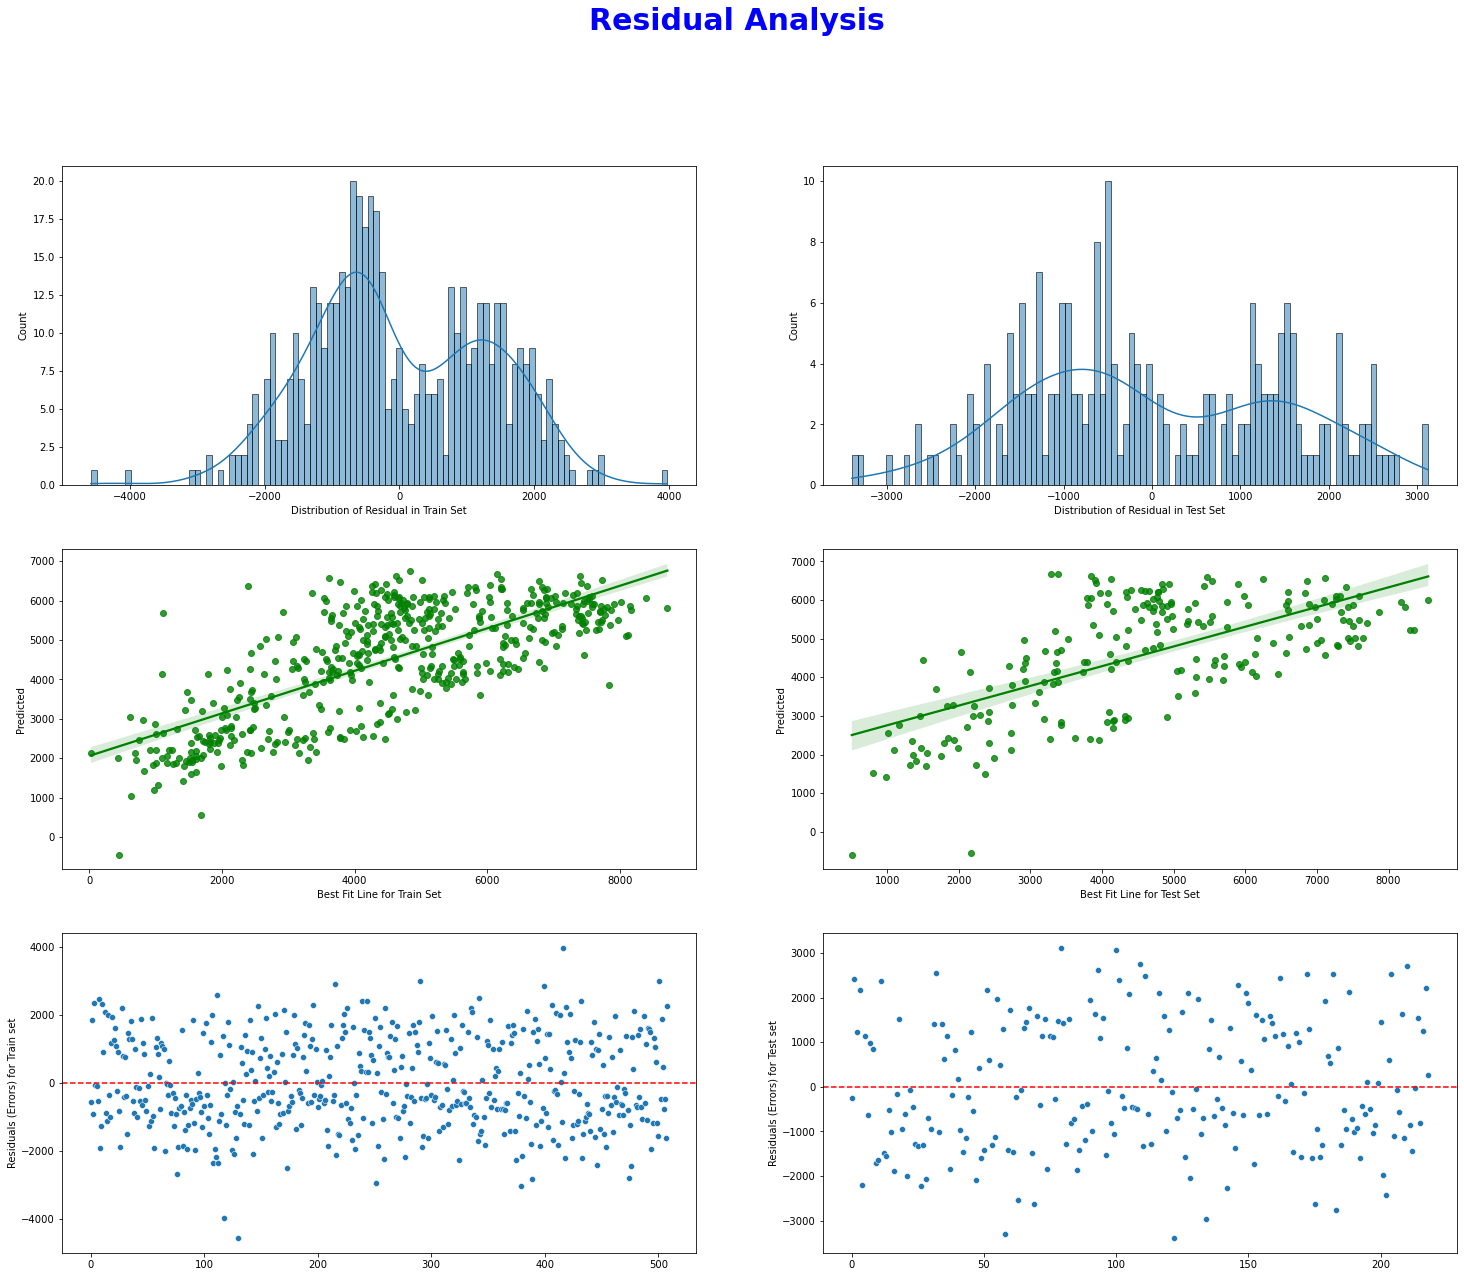

In [387]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))

sns.histplot(x='Error', data=train_pred_df, kde=True, bins=100, ax=axes[0,0])
axes[0,0].set_xlabel('Distribution of Residual in Train Set')

sns.histplot(x='Error', data=test_pred_df, kde=True, bins=100, ax=axes[0,1])
axes[0,1].set_xlabel('Distribution of Residual in Test Set')
#y_train_pred_rfe_3_less_year
sns.regplot('Actual', 'Predicted', data = train_pred_df, color='green', ax=axes[1,0])
axes[1,0].set_xlabel('Best Fit Line for Train Set')

sns.regplot('Actual', 'Predicted', data = test_pred_df, color='green', ax=axes[1,1])
axes[1,1].set_xlabel('Best Fit Line for Test Set')

sns.scatterplot(train_pred_df.index, train_pred_df['Error'], ax=axes[2,0])
axes[2,0].axhline(y=0, color='r', linestyle='--')
axes[2,0].set_ylabel("Residuals (Errors) for Train set")

sns.scatterplot(test_pred_df.index, test_pred_df['Error'],  ax=axes[2,1])
axes[2,1].axhline(y=0, color='r', linestyle='--')
axes[2,1].set_ylabel("Residuals (Errors) for Test set")


fig.suptitle("Residual Analysis", fontsize=30, fontweight='bold', color='blue',ha='center',va='center')
plt.show()

- Observation:
    
    - Now all the variables are significant and the Adjusted R2- score is also almost same as that of the last model. 

    - The Equation of this model will be: 
        temp = (-2719.4893) * weathersit_3 + (-866.7952) * Season_spring + (552.4825) * Season_winter + (545.2568) * month_Sept + (4677.8510) * temp + 2075.3120

- The Score is very low and RMSE is quite high.
- we can use some advanced tecnique(Model regularization) or some other non - linear model for better score
- For this model we can add some more features based on rela life scenario and accordingly check its performance.
- We can do K-Fold Cross validation where it will run on several test sets and will provide the average score. Bsed on this we can take decision of going with this model or not.

#### Score Data Matrix

In [388]:
Score_Matrix = pd.DataFrame({
    'Model_Name': ['ols_4', 'ols_6', 'rfe_lm_2', 'rfe_lm_3', 'rfe_lm_3_less_year_final'],
    'Train_R2_Score': [82.48, 56.26, 80.78, 80.12, 53.88],
    'Test_R2_Score': [77.54, 43.08, 77.35, 76.48, 40.60],

})

In [389]:
Score_Matrix

Model_Name  Train_R2_Score  Test_R2_Score
0                     ols_4           82.48          77.54
1                     ols_6           56.26          43.08
2                  rfe_lm_2           80.78          77.35
3                  rfe_lm_3           80.12          76.48
4  rfe_lm_3_less_year_final           53.88          40.60

- Future Step:

    - The ols_4, rfe_lm_2 and rfe_lm_3 can be taken along for further optimization because the difference between train and test R2 score is minimum for this model
    - But the last model(rfe_lm_3_less_year_final) and ols_6 also can be fine tuned or can be implemented by some other method called Regularization or any other non linear Algorithm.
    - We can use any other feature selection process like : PCA and 
    for outlier detection instead of capping we can use Box-Cox Transformation(Power Transformation).
    - More over this data is actually collected on a daily frequency. So unstead of all these we can use Time Series Forecasting also to check its prediction